# Statistical Tests

In [1]:
import pandas as pd
import Orange
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.patches as mpatches

Performance metrics of the datasets generated through C-SMOTE with the removal of overlapping tuples.

## Nemenyi test on Balanced Accuracy

In [2]:
# Create a dictionary with Balanced Accuracy metrics
data = {'Algorithm': ['Hoeffding Tree', 'Leveraging Bagging', 'Adaptive Random Forest', 'StreamingRandomPatches'],
        'ds2910': [0.74, 0.85, 0.83, 0.86],
        'ds3409': [0.76, 0.85, 0.84, 0.84],
        'ds4668': [0.81, 0.84, 0.83, 0.83],
        'ds5505': [0.80, 0.85, 0.86, 0.85],
        'ds6315': [0.84, 0.86, 0.85, 0.86]}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Set the 'Algorithm' column as the index
df.set_index('Algorithm', inplace=True)

# Calculate the rank
ranked_df = df.rank(axis=0, method='average', ascending=False)
ranks = ranked_df.mean(axis=1)  # Mean of each row

# Compute the mean of each column
col_means = df.mean(axis=0).round(2)
# Append the row of column means to the DataFrame
df.loc['Mean'] = col_means

# Print the DataFrames
print("\033[1mBalanced Accuracy\033[0m")
print(df)
print()
print(ranked_df)
print()
print("\033[1mBalanced Accuracy Ranks\033[0m")
print()
print(ranks)

Balanced Accuracy
                        ds2910  ds3409  ds4668  ds5505  ds6315
Algorithm                                                     
Hoeffding Tree            0.74    0.76    0.81    0.80    0.84
Leveraging Bagging        0.85    0.85    0.84    0.85    0.86
Adaptive Random Forest    0.83    0.84    0.83    0.86    0.85
StreamingRandomPatches    0.86    0.84    0.83    0.85    0.86
Mean                      0.82    0.82    0.83    0.84    0.85

                        ds2910  ds3409  ds4668  ds5505  ds6315
Algorithm                                                     
Hoeffding Tree             4.0     4.0     4.0     4.0     4.0
Leveraging Bagging         2.0     1.0     1.0     2.5     1.5
Adaptive Random Forest     3.0     2.5     2.5     1.0     3.0
StreamingRandomPatches     1.0     2.5     2.5     2.5     1.5

Balanced Accuracy Ranks

Algorithm
Hoeffding Tree            4.0
Leveraging Bagging        1.6
Adaptive Random Forest    2.4
StreamingRandomPatches    2.0
dtype:

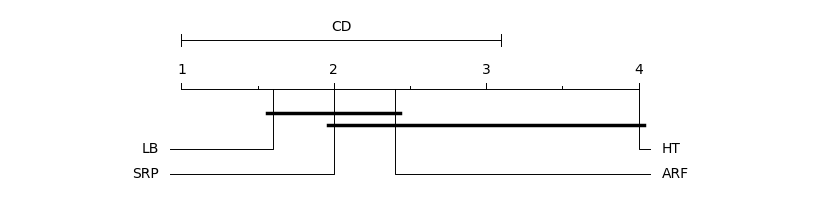

In [3]:
names = ["HT", "LB", "ARF", "SRP" ]
avranks =  [4.0, 1.6, 2.4, 2.0]
cd = Orange.evaluation.compute_CD(avranks, 5, alpha='0.05', test='nemenyi')  # Tested on 5 datasets
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=7, textspace=1.5)

# print("\033[1mBalanced Accuracy\033[0m")
# Get the current figure and adjust the size
fig = plt.gcf()
fig.set_size_inches(8, 2)  # Adjust the size according to your preference
# Save the plot with a tight bounding box
plt.savefig('data/nemenyi_BA.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

## Nemenyi test on Geometric Mean

In [4]:
# Create a dictionary with Geometric Mean metrics
data = {'Algorithm': ['Hoeffding Tree', 'Leveraging Bagging', 'Adaptive Random Forest', 'StreamingRandomPatches'],
        'ds2910': [0.73, 0.85, 0.83, 0.86],
        'ds3409': [0.73, 0.85, 0.84, 0.84],
        'ds4668': [0.80, 0.83, 0.83, 0.83],
        'ds5505': [0.78, 0.85, 0.86, 0.84],
        'ds6315': [0.83, 0.86, 0.84, 0.85]}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Set the 'Algorithm' column as the index
df.set_index('Algorithm', inplace=True)

# Calculate the rank
ranked_df = df.rank(axis=0, method='average', ascending=False)
ranks = ranked_df.mean(axis=1)  # Mean of each row

# Compute the mean of each column
col_means = df.mean(axis=0).round(2)
# Append the row of column means to the DataFrame
df.loc['Mean'] = col_means

# Print the DataFrames
print("\033[1mGeometric Mean\033[0m")
print(df)
print()
print(ranked_df)
print()
print("\033[1mGeometric Mean Ranks\033[0m")
print()
print(ranks)

Geometric Mean
                        ds2910  ds3409  ds4668  ds5505  ds6315
Algorithm                                                     
Hoeffding Tree            0.73    0.73    0.80    0.78    0.83
Leveraging Bagging        0.85    0.85    0.83    0.85    0.86
Adaptive Random Forest    0.83    0.84    0.83    0.86    0.84
StreamingRandomPatches    0.86    0.84    0.83    0.84    0.85
Mean                      0.82    0.82    0.82    0.83    0.84

                        ds2910  ds3409  ds4668  ds5505  ds6315
Algorithm                                                     
Hoeffding Tree             4.0     4.0     4.0     4.0     4.0
Leveraging Bagging         2.0     1.0     2.0     2.0     1.0
Adaptive Random Forest     3.0     2.5     2.0     1.0     3.0
StreamingRandomPatches     1.0     2.5     2.0     3.0     2.0

Geometric Mean Ranks

Algorithm
Hoeffding Tree            4.0
Leveraging Bagging        1.6
Adaptive Random Forest    2.3
StreamingRandomPatches    2.1
dtype: float

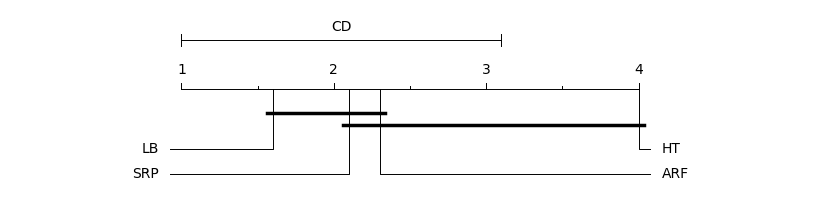

In [5]:
names = ["HT", "LB", "ARF", "SRP" ]
avranks =  [4.0, 1.6, 2.3, 2.1]
cd = Orange.evaluation.compute_CD(avranks, 5, alpha='0.05', test='nemenyi')  # Tested on 5 datasets
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=7, textspace=1.5)

# print("\033[1mGeometric Mean\033[0m")
# Get the current figure and adjust the size
fig = plt.gcf()
fig.set_size_inches(8, 2)  # Adjust the size according to your preference
# Save the plot with a tight bounding box
plt.savefig('data/nemenyi_GM.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

## Nemenyi test on Cohen's Kappa

In [6]:
# Create a dictionary with Cohen's Kappa metrics
data = {'Algorithm': ['Hoeffding Tree', 'Leveraging Bagging', 'Adaptive Random Forest', 'StreamingRandomPatches'],
        'ds2910': [0.48, 0.71, 0.66, 0.72],
        'ds3409': [0.54, 0.72, 0.69, 0.69],
        'ds4668': [0.66, 0.68, 0.67, 0.69],
        'ds5505': [0.66, 0.70, 0.75, 0.73],
        'ds6315': [0.71, 0.73, 0.73, 0.74]}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Set the 'Algorithm' column as the index
df.set_index('Algorithm', inplace=True)

# Calculate the rank
ranked_df = df.rank(axis=0, method='average', ascending=False)
ranks = ranked_df.mean(axis=1)  # Mean of each row

# Compute the mean of each column
col_means = df.mean(axis=0).round(2)
# Append the row of column means to the DataFrame
df.loc['Mean'] = col_means

# Print the DataFrames
print("\033[1mCohen's Kappa\033[0m")
print(df)
print()
print(ranked_df)
print()
print("\033[1mCohen's Kappa Ranks\033[0m")
print()
print(ranks)

Cohen's Kappa
                        ds2910  ds3409  ds4668  ds5505  ds6315
Algorithm                                                     
Hoeffding Tree            0.48    0.54    0.66    0.66    0.71
Leveraging Bagging        0.71    0.72    0.68    0.70    0.73
Adaptive Random Forest    0.66    0.69    0.67    0.75    0.73
StreamingRandomPatches    0.72    0.69    0.69    0.73    0.74
Mean                      0.64    0.66    0.68    0.71    0.73

                        ds2910  ds3409  ds4668  ds5505  ds6315
Algorithm                                                     
Hoeffding Tree             4.0     4.0     4.0     4.0     4.0
Leveraging Bagging         2.0     1.0     2.0     3.0     2.5
Adaptive Random Forest     3.0     2.5     3.0     1.0     2.5
StreamingRandomPatches     1.0     2.5     1.0     2.0     1.0

Cohen's Kappa Ranks

Algorithm
Hoeffding Tree            4.0
Leveraging Bagging        2.1
Adaptive Random Forest    2.4
StreamingRandomPatches    1.5
dtype: float64

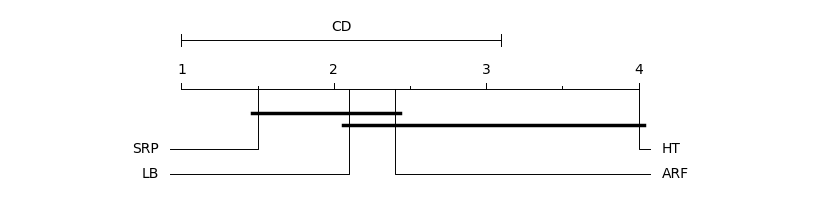

In [7]:
names = ["HT", "LB", "ARF", "SRP" ]
avranks =  [4.0, 2.1, 2.4, 1.5]
cd = Orange.evaluation.compute_CD(avranks, 5, alpha='0.05', test='nemenyi')  # Tested on 5 datasets
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=7, textspace=1.5)

# print("\033[1mCohen's Kappa\033[0m")
# Get the current figure and adjust the size
fig = plt.gcf()
fig.set_size_inches(8, 2)  # Adjust the size according to your preference
# Save the plot with a tight bounding box
plt.savefig('data/nemenyi_CK.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

## Nemenyi test on Precision

In [257]:
# Create a dictionary with Precision metrics
data = {'Algorithm': ['Hoeffding Tree', 'Leveraging Bagging', 'Adaptive Random Forest', 'StreamingRandomPatches'],
        'ds2910': [0.72, 0.85, 0.81, 0.85],
        'ds3409': [0.75, 0.85, 0.84, 0.84],
        'ds4668': [0.87, 0.90, 0.89, 0.89],
        'ds5505': [0.88, 0.93, 0.92, 0.92],
        'ds6315': [0.91, 0.93, 0.92, 0.92]}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Set the 'Algorithm' column as the index
df.set_index('Algorithm', inplace=True)

# Calculate the rank
ranked_df = df.rank(axis=0, method='average', ascending=False)
ranks = ranked_df.mean(axis=1)  # Mean of each row

# Compute the mean of each column
col_means = df.mean(axis=0).round(2)
# Append the row of column means to the DataFrame
df.loc['Mean'] = col_means

# Print the DataFrames
print("\033[1mPrecision\033[0m")
print(df)
print()
print(ranked_df)
print()
print("\033[1mPrecision Ranks\033[0m")
print()
print(ranks)

Precision
                        ds2910  ds3409  ds4668  ds5505  ds6315
Algorithm                                                     
Hoeffding Tree            0.72    0.75    0.87    0.88    0.91
Leveraging Bagging        0.85    0.85    0.90    0.93    0.93
Adaptive Random Forest    0.81    0.84    0.89    0.92    0.92
StreamingRandomPatches    0.85    0.84    0.89    0.92    0.92
Mean                      0.81    0.82    0.89    0.91    0.92

                        ds2910  ds3409  ds4668  ds5505  ds6315
Algorithm                                                     
Hoeffding Tree             4.0     4.0     4.0     4.0     4.0
Leveraging Bagging         1.5     1.0     1.0     1.0     1.0
Adaptive Random Forest     3.0     2.5     2.5     2.5     2.5
StreamingRandomPatches     1.5     2.5     2.5     2.5     2.5

Precision Ranks

Algorithm
Hoeffding Tree            4.0
Leveraging Bagging        1.1
Adaptive Random Forest    2.6
StreamingRandomPatches    2.3
dtype: float64


Precision


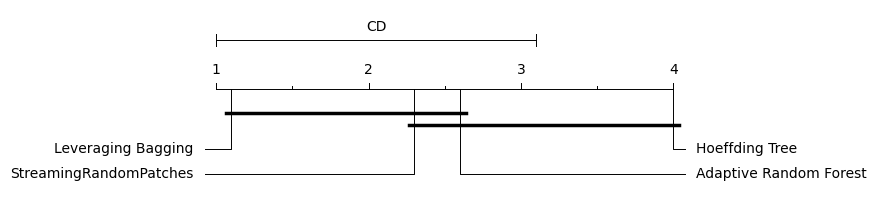

In [283]:
names = ["Hoeffding Tree", "Leveraging Bagging", "Adaptive Random Forest", "StreamingRandomPatches" ]
avranks =  [4.0, 1.1, 2.6, 2.3]
cd = Orange.evaluation.compute_CD(avranks, 5, alpha='0.05', test='nemenyi')  # Tested on 5 datasets
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=7, textspace=1.5)

print("\033[1mPrecision\033[0m")
# Get the current figure and adjust the size
fig = plt.gcf()
fig.set_size_inches(8, 2)  # Adjust the size according to your preference
# Save the plot with a tight bounding box
plt.savefig('data/nemenyi_precision.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

## Nemenyi test on Recall

In [259]:
# Create a dictionary with Recall metrics
data = {'Algorithm': ['Hoeffding Tree', 'Leveraging Bagging', 'Adaptive Random Forest', 'StreamingRandomPatches'],
        'ds2910': [0.80, 0.85, 0.86, 0.87],
        'ds3409': [0.93, 0.93, 0.92, 0.92],
        'ds4668': [0.96, 0.91, 0.92, 0.94],
        'ds5505': [0.98, 0.92, 0.96, 0.96],
        'ds6315': [0.96, 0.93, 0.95, 0.96]}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Set the 'Algorithm' column as the index
df.set_index('Algorithm', inplace=True)

# Calculate the rank
ranked_df = df.rank(axis=0, method='average', ascending=False)
ranks = ranked_df.mean(axis=1)  # Mean of each row

# Compute the mean of each column
col_means = df.mean(axis=0).round(2)
# Append the row of column means to the DataFrame
df.loc['Mean'] = col_means

# Print the DataFrames
print("\033[1mRecall\033[0m")
print(df)
print()
print(ranked_df)
print()
print("\033[1mRecall Ranks\033[0m")
print()
print(ranks)

Recall
                        ds2910  ds3409  ds4668  ds5505  ds6315
Algorithm                                                     
Hoeffding Tree            0.80    0.93    0.96    0.98    0.96
Leveraging Bagging        0.85    0.93    0.91    0.92    0.93
Adaptive Random Forest    0.86    0.92    0.92    0.96    0.95
StreamingRandomPatches    0.87    0.92    0.94    0.96    0.96
Mean                      0.84    0.92    0.93    0.96    0.95

                        ds2910  ds3409  ds4668  ds5505  ds6315
Algorithm                                                     
Hoeffding Tree             4.0     1.5     1.0     1.0     1.5
Leveraging Bagging         3.0     1.5     4.0     4.0     4.0
Adaptive Random Forest     2.0     3.5     3.0     2.5     3.0
StreamingRandomPatches     1.0     3.5     2.0     2.5     1.5

Recall Ranks

Algorithm
Hoeffding Tree            1.8
Leveraging Bagging        3.3
Adaptive Random Forest    2.8
StreamingRandomPatches    2.1
dtype: float64


Recall


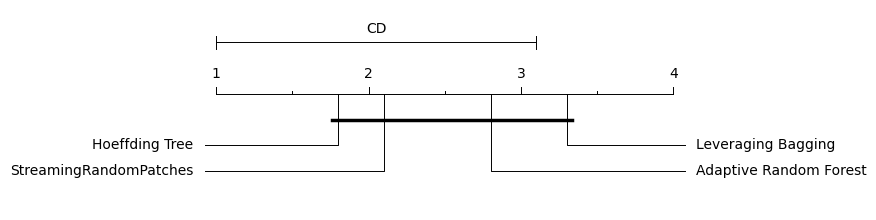

In [284]:
names = ["Hoeffding Tree", "Leveraging Bagging", "Adaptive Random Forest", "StreamingRandomPatches" ]
avranks =  [1.8, 3.3, 2.8, 2.1]
cd = Orange.evaluation.compute_CD(avranks, 5, alpha='0.05', test='nemenyi')  # Tested on 5 datasets
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=7, textspace=1.5)

print("\033[1mRecall\033[0m")
# Get the current figure and adjust the size
fig = plt.gcf()
fig.set_size_inches(8, 2)  # Adjust the size according to your preference
# Save the plot with a tight bounding box
plt.savefig('data/nemenyi_recall.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

## Nemenyi test on F1 Score

In [8]:
# Create a dictionary with F1 Score metrics
data = {'Algorithm': ['Hoeffding Tree', 'Leveraging Bagging', 'Adaptive Random Forest', 'StreamingRandomPatches'],
        'ds2910': [0.75, 0.85, 0.83, 0.86],
        'ds3409': [0.83, 0.89, 0.88, 0.88],
        'ds4668': [0.91, 0.91, 0.91, 0.91],
        'ds5505': [0.93, 0.92, 0.94, 0.94],
        'ds6315': [0.93, 0.93, 0.93, 0.94]}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Set the 'Algorithm' column as the index
df.set_index('Algorithm', inplace=True)

# Calculate the rank
ranked_df = df.rank(axis=0, method='average', ascending=False)
ranks = ranked_df.mean(axis=1)  # Mean of each row

# Compute the mean of each column
col_means = df.mean(axis=0).round(2)
# Append the row of column means to the DataFrame
df.loc['Mean'] = col_means

# Print the DataFrames
print("\033[1mF1 Score\033[0m")
print(df)
print()
print(ranked_df)
print()
print("\033[1mF1 Score Ranks\033[0m")
print()
print(ranks)

F1 Score
                        ds2910  ds3409  ds4668  ds5505  ds6315
Algorithm                                                     
Hoeffding Tree            0.75    0.83    0.91    0.93    0.93
Leveraging Bagging        0.85    0.89    0.91    0.92    0.93
Adaptive Random Forest    0.83    0.88    0.91    0.94    0.93
StreamingRandomPatches    0.86    0.88    0.91    0.94    0.94
Mean                      0.82    0.87    0.91    0.93    0.93

                        ds2910  ds3409  ds4668  ds5505  ds6315
Algorithm                                                     
Hoeffding Tree             4.0     4.0     2.5     3.0     3.0
Leveraging Bagging         2.0     1.0     2.5     4.0     3.0
Adaptive Random Forest     3.0     2.5     2.5     1.5     3.0
StreamingRandomPatches     1.0     2.5     2.5     1.5     1.0

F1 Score Ranks

Algorithm
Hoeffding Tree            3.3
Leveraging Bagging        2.5
Adaptive Random Forest    2.5
StreamingRandomPatches    1.7
dtype: float64


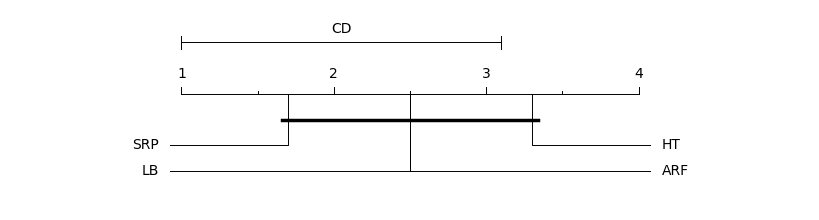

In [9]:
names = ["HT", "LB", "ARF", "SRP" ]
avranks =  [3.3, 2.5, 2.5, 1.7]
cd = Orange.evaluation.compute_CD(avranks, 5, alpha='0.05', test='nemenyi')  # Tested on 5 datasets
Orange.evaluation.graph_ranks(avranks, names, cd=cd, width=7, textspace=1.5)

# print("\033[1mF1 Score\033[0m")
# Get the current figure and adjust the size
fig = plt.gcf()
fig.set_size_inches(8, 2)  # Adjust the size according to your preference
# Save the plot with a tight bounding box
plt.savefig('data/nemenyi_FS.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

Performance metrics of the largest datasets generated through SMOTE and C-SMOTE with the removal of overlapping tuples.

## T-test on Balanced Accuracy

In [139]:
# Create an empty dataframe
color_accuracy_df = pd.DataFrame(columns=['Algorithm_row', 'Algorithm_col', 'Color'])
color = ''

In [140]:
print("\033[1mBalanced Accuracy:\033[0m Decision Tree vs Hoeffding Tree")
print()
a = (0.89, 0.85, 0.83, 0.87, 0.86, 0.84, 0.85, 0.84, 0.86, 0.84)  # DT
b = (0.84, 0.84, 0.83, 0.84, 0.84, 0.76, 0.85, 0.84, 0.83, 0.85)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (DT) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (DT).")
        color = 'red'
    else:
        print("The mean of group a (DT) is not significantly less than the mean of group b (HT). Algorithm a (DT) is better than algorithm b (HT).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Decision Tree vs Hoeffding Tree

Levene's test p-value: 0.9081234928708958
The variances of group a (DT) and group b (HT) are not significantly different.

T-test two-sided p-value: 0.04974716280150119
The means of group a (DT) and group b (HT) are significantly different.

T-test less p-value:  0.9751264185992494
The mean of group a (DT) is not significantly less than the mean of group b (HT). Algorithm a (DT) is better than algorithm b (HT).


In [141]:
print("\033[1mBalanced Accuracy:\033[0m Decision Tree vs Leveraging Bagging")
print()
a = (0.89, 0.85, 0.83, 0.87, 0.86, 0.84, 0.85, 0.84, 0.86, 0.84)  # DT
b = (0.85, 0.84, 0.86, 0.85, 0.86, 0.87, 0.86, 0.85, 0.86, 0.85)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (DT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (DT).")
        color = 'red'
    else:
        print("The mean of group a (DT) is not significantly less than the mean of group b (LB). Algorithm a (DT) is better than algorithm b (LB).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Decision Tree vs Leveraging Bagging

Levene's test p-value: 0.14148005271804753
The variances of group a (DT) and group b (LB) are not significantly different.

T-test two-sided p-value: 0.7507435327226671
The means of group a (DT) and group b (LB) are not significantly different.


In [142]:
print("\033[1mBalanced Accuracy:\033[0m Decision Tree vs Adaptive Random Forest")
print()
a = (0.89, 0.85, 0.83, 0.87, 0.86, 0.84, 0.85, 0.84, 0.86, 0.84)  # DT
b = (0.87, 0.84, 0.85, 0.84, 0.84, 0.83, 0.84, 0.84, 0.82, 0.83)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (DT) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (DT).")
        color = 'red'
    else:
        print("The mean of group a (DT) is not significantly less than the mean of group b (ARF). Algorithm a (DT) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Decision Tree vs Adaptive Random Forest

Levene's test p-value: 0.3220435358073156
The variances of group a (DT) and group b (ARF) are not significantly different.

T-test two-sided p-value: 0.07973129730691636
The means of group a (DT) and group b (ARF) are not significantly different.


In [143]:
print("\033[1mBalanced Accuracy:\033[0m Decision Tree vs StreamingRandomPatches")
print()
a = (0.89, 0.85, 0.83, 0.87, 0.86, 0.84, 0.85, 0.84, 0.86, 0.84)  # DT
b = (0.82, 0.86, 0.84, 0.84, 0.84, 0.83, 0.82, 0.83, 0.85, 0.84)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (DT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (DT).")
        color = 'red'
    else:
        print("The mean of group a (DT) is not significantly less than the mean of group b (SRP). Algorithm a (DT) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Decision Tree vs StreamingRandomPatches

Levene's test p-value: 0.39545050484859867
The variances of group a (DT) and group b (SRP) are not significantly different.

T-test two-sided p-value: 0.031220784150569718
The means of group a (DT) and group b (SRP) are significantly different.

T-test less p-value:  0.9843896079247151
The mean of group a (DT) is not significantly less than the mean of group b (SRP). Algorithm a (DT) is better than algorithm b (SRP).


In [144]:
print("\033[1mBalanced Accuracy:\033[0m Decision Tree vs Bagging")
print()
a = (0.89, 0.85, 0.83, 0.87, 0.86, 0.84, 0.85, 0.84, 0.86, 0.84)  # DT
b = (0.87, 0.85, 0.87, 0.88, 0.86, 0.86, 0.88, 0.86, 0.87, 0.86)  # B

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (B) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (B) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (B) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (DT) is significantly less than the mean of group b (B). Algorithm b (B) is better than algorithm a (DT).")
        color = 'red'
    else:
        print("The mean of group a (DT) is not significantly less than the mean of group b (B). Algorithm a (DT) is better than algorithm b (B).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (B) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Decision Tree vs Bagging

Levene's test p-value: 0.22419418601649463
The variances of group a (DT) and group b (B) are not significantly different.

T-test two-sided p-value: 0.05615476186599203
The means of group a (DT) and group b (B) are not significantly different.


In [145]:
print("\033[1mBalanced Accuracy:\033[0m Decision Tree vs Random Forest")
print()
a = (0.89, 0.85, 0.83, 0.87, 0.86, 0.84, 0.85, 0.84, 0.86, 0.84)  # DT
b = (0.84, 0.84, 0.86, 0.89, 0.89, 0.86, 0.87, 0.85, 0.85, 0.85)  # RF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (RF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (RF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (RF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (DT) is significantly less than the mean of group b (RF). Algorithm b (RF) is better than algorithm a (DT).")
        color = 'red'
    else:
        print("The mean of group a (DT) is not significantly less than the mean of group b (RF). Algorithm a (DT) is better than algorithm b (RF).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (RF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Decision Tree vs Random Forest

Levene's test p-value: 0.8516387102193821
The variances of group a (DT) and group b (RF) are not significantly different.

T-test two-sided p-value: 0.3951021124802728
The means of group a (DT) and group b (RF) are not significantly different.


In [146]:
print("\033[1mBalanced Accuracy:\033[0m Bagging vs Leveraging Bagging")
print()
a = (0.87, 0.85, 0.87, 0.88, 0.86, 0.86, 0.88, 0.86, 0.87, 0.86)  # B
b = (0.85, 0.84, 0.86, 0.85, 0.86, 0.87, 0.86, 0.85, 0.86, 0.85)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (B) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (B).")
        color = 'red'
    else:
        print("The mean of group a (B) is not significantly less than the mean of group b (LB). Algorithm a (B) is better than algorithm b (LB).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Bagging vs Leveraging Bagging

Levene's test p-value: 0.6278365031702056
The variances of group a (B) and group b (LB) are not significantly different.

T-test two-sided p-value: 0.014544214349505591
The means of group a (B) and group b (LB) are significantly different.

T-test less p-value:  0.9927278928252472
The mean of group a (B) is not significantly less than the mean of group b (LB). Algorithm a (B) is better than algorithm b (LB).


In [147]:
print("\033[1mBalanced Accuracy:\033[0m Bagging vs Hoeffding Tree")
print()
a = (0.87, 0.85, 0.87, 0.88, 0.86, 0.86, 0.88, 0.86, 0.87, 0.86)  # B
b = (0.84, 0.84, 0.83, 0.84, 0.84, 0.76, 0.85, 0.84, 0.83, 0.85)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (B) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (B).")
        color = 'red'
    else:
        print("The mean of group a (B) is not significantly less than the mean of group b (HT). Algorithm a (B) is better than algorithm b (HT).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Bagging vs Hoeffding Tree

Levene's test p-value: 0.6173084299467846
The variances of group a (B) and group b (HT) are not significantly different.

T-test two-sided p-value: 0.0011594994978677809
The means of group a (B) and group b (HT) are significantly different.

T-test less p-value:  0.9994202502510662
The mean of group a (B) is not significantly less than the mean of group b (HT). Algorithm a (B) is better than algorithm b (HT).


In [148]:
print("\033[1mBalanced Accuracy:\033[0m Bagging vs Adaptive Random Forest")
print()
a = (0.87, 0.85, 0.87, 0.88, 0.86, 0.86, 0.88, 0.86, 0.87, 0.86)  # B
b = (0.87, 0.84, 0.85, 0.84, 0.84, 0.83, 0.84, 0.84, 0.82, 0.83)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (B) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (B).")
        color = 'red'
    else:
        print("The mean of group a (B) is not significantly less than the mean of group b (ARF). Algorithm a (B) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Bagging vs Adaptive Random Forest

Levene's test p-value: 1.0
The variances of group a (B) and group b (ARF) are not significantly different.

T-test two-sided p-value: 9.416948323171086e-05
The means of group a (B) and group b (ARF) are significantly different.

T-test less p-value:  0.9999529152583841
The mean of group a (B) is not significantly less than the mean of group b (ARF). Algorithm a (B) is better than algorithm b (ARF).


In [149]:
print("\033[1mBalanced Accuracy:\033[0m Bagging vs StreamingRandomPatches")
print()
a = (0.87, 0.85, 0.87, 0.88, 0.86, 0.86, 0.88, 0.86, 0.87, 0.86)  # B
b = (0.82, 0.86, 0.84, 0.84, 0.84, 0.83, 0.82, 0.83, 0.85, 0.84)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (B) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (B).")
        color = 'red'
    else:
        print("The mean of group a (B) is not significantly less than the mean of group b (SRP). Algorithm a (B) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Bagging vs StreamingRandomPatches

Levene's test p-value: 0.7554672956239488
The variances of group a (B) and group b (SRP) are not significantly different.

T-test two-sided p-value: 1.7018627582862508e-05
The means of group a (B) and group b (SRP) are significantly different.

T-test less p-value:  0.9999914906862086
The mean of group a (B) is not significantly less than the mean of group b (SRP). Algorithm a (B) is better than algorithm b (SRP).


In [150]:
print("\033[1mBalanced Accuracy:\033[0m Bagging vs Random Forest")
print()
a = (0.87, 0.85, 0.87, 0.88, 0.86, 0.86, 0.88, 0.86, 0.87, 0.86)  # B
b = (0.84, 0.84, 0.86, 0.89, 0.89, 0.86, 0.87, 0.85, 0.85, 0.85)  # RF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (RF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (RF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (RF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (B) is significantly less than the mean of group b (RF). Algorithm b (RF) is better than algorithm a (B).")
        color = 'red'
    else:
        print("The mean of group a (B) is not significantly less than the mean of group b (RF). Algorithm a (B) is better than algorithm b (RF).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (RF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Bagging vs Random Forest

Levene's test p-value: 0.15890725993722124
The variances of group a (B) and group b (RF) are not significantly different.

T-test two-sided p-value: 0.3704719736077665
The means of group a (B) and group b (RF) are not significantly different.


In [151]:
print("\033[1mBalanced Accuracy:\033[0m Random Forest vs Adaptive Random Forest")
print()
a = (0.84, 0.84, 0.86, 0.89, 0.89, 0.86, 0.87, 0.85, 0.85, 0.85)  # RF
b = (0.87, 0.84, 0.85, 0.84, 0.84, 0.83, 0.84, 0.84, 0.82, 0.83)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (RF) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (RF).")
        color = 'red'
    else:
        print("The mean of group a (RF) is not significantly less than the mean of group b (ARF). Algorithm a (RF) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (RF) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Random Forest vs Adaptive Random Forest

Levene's test p-value: 0.24569579560631105
The variances of group a (RF) and group b (ARF) are not significantly different.

T-test two-sided p-value: 0.011899930001913547
The means of group a (RF) and group b (ARF) are significantly different.

T-test less p-value:  0.9940500349990432
The mean of group a (RF) is not significantly less than the mean of group b (ARF). Algorithm a (RF) is better than algorithm b (ARF).


In [152]:
print("\033[1mBalanced Accuracy:\033[0m Random Forest vs Hoeffding Tree")
print()
a = (0.84, 0.84, 0.86, 0.89, 0.89, 0.86, 0.87, 0.85, 0.85, 0.85)  # RF
b = (0.84, 0.84, 0.83, 0.84, 0.84, 0.76, 0.85, 0.84, 0.83, 0.85)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (RF) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (RF).")
        color = 'red'
    else:
        print("The mean of group a (RF) is not significantly less than the mean of group b (HT). Algorithm a (RF) is better than algorithm b (HT).")
        color = 'limegreen'
else:
    print("The means of group a (RF) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Random Forest vs Hoeffding Tree

Levene's test p-value: 0.8186427218759217
The variances of group a (RF) and group b (HT) are not significantly different.

T-test two-sided p-value: 0.012475718196251737
The means of group a (RF) and group b (HT) are significantly different.

T-test less p-value:  0.9937621409018741
The mean of group a (RF) is not significantly less than the mean of group b (HT). Algorithm a (RF) is better than algorithm b (HT).


In [153]:
print("\033[1mBalanced Accuracy:\033[0m Random Forest vs Leveraging Bagging")
print()
a = (0.84, 0.84, 0.86, 0.89, 0.89, 0.86, 0.87, 0.85, 0.85, 0.85)  # RF
b = (0.85, 0.84, 0.86, 0.85, 0.86, 0.87, 0.86, 0.85, 0.86, 0.85)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (RF) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (RF).")
        color = 'red'
    else:
        print("The mean of group a (RF) is not significantly less than the mean of group b (LB). Algorithm a (RF) is better than algorithm b (LB).")
        color = 'limegreen'
else:
    print("The means of group a (RF) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Random Forest vs Leveraging Bagging

Levene's test p-value: 0.09821992523952311
The variances of group a (RF) and group b (LB) are not significantly different.

T-test two-sided p-value: 0.4425860174313925
The means of group a (RF) and group b (LB) are not significantly different.


In [154]:
print("\033[1mBalanced Accuracy:\033[0m Random Forest vs StreamingRandomPatches")
print()
a = (0.84, 0.84, 0.86, 0.89, 0.89, 0.86, 0.87, 0.85, 0.85, 0.85)  # RF
b = (0.82, 0.86, 0.84, 0.84, 0.84, 0.83, 0.82, 0.83, 0.85, 0.84)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (RF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (RF).")
        color = 'red'
    else:
        print("The mean of group a (RF) is not significantly less than the mean of group b (SRP). Algorithm a (RF) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (RF) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Random Forest vs StreamingRandomPatches

Levene's test p-value: 0.3005125562013054
The variances of group a (RF) and group b (SRP) are not significantly different.

T-test two-sided p-value: 0.004108818040686134
The means of group a (RF) and group b (SRP) are significantly different.

T-test less p-value:  0.997945590979657
The mean of group a (RF) is not significantly less than the mean of group b (SRP). Algorithm a (RF) is better than algorithm b (SRP).


In [155]:
print("\033[1mBalanced Accuracy:\033[0m Hoeffding Tree vs Leveraging Bagging")
print()
a = (0.84, 0.84, 0.83, 0.84, 0.84, 0.76, 0.85, 0.84, 0.83, 0.85)  # HT
b = (0.85, 0.84, 0.86, 0.85, 0.86, 0.87, 0.86, 0.85, 0.86, 0.85)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (HT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (HT).")
        color = 'red'
    else:
        print("The mean of group a (HT) is not significantly less than the mean of group b (LB). Algorithm a (HT) is better than algorithm b (LB).")
        color = 'limegreen'
else:
    print("The means of group a (HT) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Hoeffding Tree vs Leveraging Bagging

Levene's test p-value: 0.5312256745929511
The variances of group a (HT) and group b (LB) are not significantly different.

T-test two-sided p-value: 0.016493688787148627
The means of group a (HT) and group b (LB) are significantly different.

T-test less p-value:  0.008246844393574313
The mean of group a (HT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (HT).


In [156]:
print("\033[1mBalanced Accuracy:\033[0m Hoeffding Tree vs Adaptive Random Forest")
print()
a = (0.84, 0.84, 0.83, 0.84, 0.84, 0.76, 0.85, 0.84, 0.83, 0.85)  # HT
b = (0.87, 0.84, 0.85, 0.84, 0.84, 0.83, 0.84, 0.84, 0.82, 0.83)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (HT) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (HT).")
        color = 'red'
    else:
        print("The mean of group a (HT) is not significantly less than the mean of group b (ARF). Algorithm a (HT) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (HT) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Hoeffding Tree vs Adaptive Random Forest

Levene's test p-value: 0.6388685664213208
The variances of group a (HT) and group b (ARF) are not significantly different.

T-test two-sided p-value: 0.40026735550293835
The means of group a (HT) and group b (ARF) are not significantly different.


In [157]:
print("\033[1mBalanced Accuracy:\033[0m Hoeffding Tree vs StreamingRandomPatches")
print()
a = (0.84, 0.84, 0.83, 0.84, 0.84, 0.76, 0.85, 0.84, 0.83, 0.85)  # HT
b = (0.82, 0.86, 0.84, 0.84, 0.84, 0.83, 0.82, 0.83, 0.85, 0.84)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (HT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (HT).")
        color = 'red'
    else:
        print("The mean of group a (HT) is not significantly less than the mean of group b (SRP). Algorithm a (HT) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (HT) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Hoeffding Tree vs StreamingRandomPatches

Levene's test p-value: 0.7187031062728365
The variances of group a (HT) and group b (SRP) are not significantly different.

T-test two-sided p-value: 0.5923187282455602
The means of group a (HT) and group b (SRP) are not significantly different.


In [158]:
print("\033[1mBalanced Accuracy:\033[0m Leveraging Bagging vs Adaptive Random Forest")
print()
a = (0.85, 0.84, 0.86, 0.85, 0.86, 0.87, 0.86, 0.85, 0.86, 0.85)  # LB
b = (0.87, 0.84, 0.85, 0.84, 0.84, 0.83, 0.84, 0.84, 0.82, 0.83)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (LB) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (LB) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (LB) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (LB) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (LB).")
        color = 'red'
    else:
        print("The mean of group a (LB) is not significantly less than the mean of group b (ARF). Algorithm a (LB) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (LB) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Leveraging Bagging'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Leveraging Bagging vs Adaptive Random Forest

Levene's test p-value: 0.7800486426923361
The variances of group a (LB) and group b (ARF) are not significantly different.

T-test two-sided p-value: 0.007685412140314308
The means of group a (LB) and group b (ARF) are significantly different.

T-test less p-value:  0.9961572939298429
The mean of group a (LB) is not significantly less than the mean of group b (ARF). Algorithm a (LB) is better than algorithm b (ARF).


In [159]:
print("\033[1mBalanced Accuracy:\033[0m Leveraging Bagging vs StreamingRandomPatches")
print()
a = (0.85, 0.84, 0.86, 0.85, 0.86, 0.87, 0.86, 0.85, 0.86, 0.85)  # LB
b = (0.82, 0.86, 0.84, 0.84, 0.84, 0.83, 0.82, 0.83, 0.85, 0.84)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (LB) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (LB) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (LB) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (LB) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (LB).")
        color = 'red'
    else:
        print("The mean of group a (LB) is not significantly less than the mean of group b (SRP). Algorithm a (LB) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (LB) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Leveraging Bagging'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Leveraging Bagging vs StreamingRandomPatches

Levene's test p-value: 0.5234025690458922
The variances of group a (LB) and group b (SRP) are not significantly different.

T-test two-sided p-value: 0.0014261299080621267
The means of group a (LB) and group b (SRP) are significantly different.

T-test less p-value:  0.999286935045969
The mean of group a (LB) is not significantly less than the mean of group b (SRP). Algorithm a (LB) is better than algorithm b (SRP).


In [160]:
print("\033[1mBalanced Accuracy:\033[0m Adaptive Random Forest vs StreamingRandomPatches")
print()
a = (0.87, 0.84, 0.85, 0.84, 0.84, 0.83, 0.84, 0.84, 0.82, 0.83)  # ARF
b = (0.82, 0.86, 0.84, 0.84, 0.84, 0.83, 0.82, 0.83, 0.85, 0.84)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (ARF) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (ARF) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (ARF) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (ARF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (ARF).")
        color = 'red'
    else:
        print("The mean of group a (ARF) is not significantly less than the mean of group b (SRP). Algorithm a (ARF) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (ARF) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Adaptive Random Forest'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Adaptive Random Forest vs StreamingRandomPatches

Levene's test p-value: 0.8179700690614409
The variances of group a (ARF) and group b (SRP) are not significantly different.

T-test two-sided p-value: 0.6102531520664853
The means of group a (ARF) and group b (SRP) are not significantly different.


In [ ]:
# Save the dataframe to a CSV file
color_accuracy_df.to_csv('data/color_accuracy.csv', index=False)

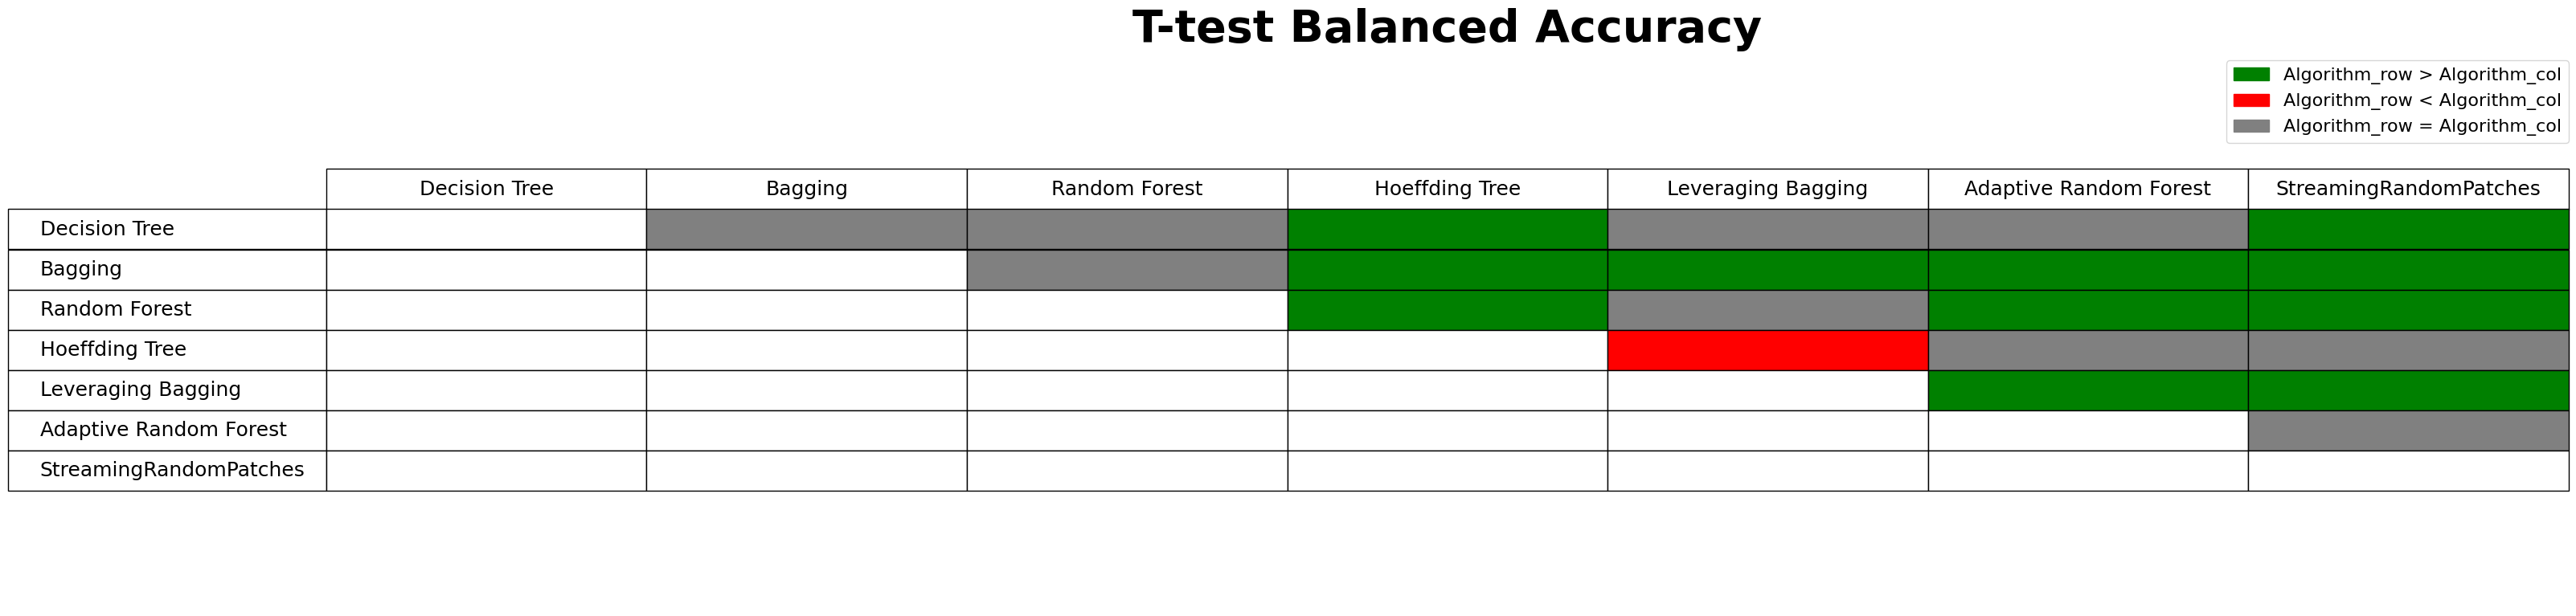

In [6]:
# Create the list of algorithms as 'x' and 'y' labels
algorithms = [
    "Decision Tree",
    "Bagging",
    "Random Forest",
    "Hoeffding Tree",
    "Leveraging Bagging",
    "Adaptive Random Forest",
    "StreamingRandomPatches"
]

# Create an empty dataframe for the table
df_table = pd.DataFrame(index=algorithms, columns=algorithms)

# Load the color data from the CSV file
df_colors = pd.read_csv('data/color_accuracy.csv')

# Iterate over the rows of the color dataframe and fill the table
for _, row in df_colors.iterrows():
    algorithm_row = row['Algorithm_row']
    algorithm_col = row['Algorithm_col']
    color = row['Color']
    df_table.loc[algorithm_row, algorithm_col] = color

# Fill remaining cells with white color
df_table.fillna('white', inplace=True)

# Display the table with only colors
plt.figure(figsize=(12, 9))
plt.axis('off')
table = plt.table(cellText=[[''] * len(df_table.columns)] * len(df_table.index),  # Empty cellText
                  colLabels=df_table.columns,
                  rowLabels=df_table.index,
                  cellColours=df_table.values,
                  loc='center')
table.scale(3, 3)  # Increase cell size

# Increase the font size of the column and index labels
table.set_fontsize(21)

# Set the title of the table
plt.title('T-test Balanced Accuracy', fontsize=40, loc='center', fontweight='bold')

# Define color patches for the legend
legend_patches = [
    mpatches.Patch(color='limegreen', label='Algorithm_row > Algorithm_col'),
    mpatches.Patch(color='red', label='Algorithm_row < Algorithm_col'),
    mpatches.Patch(color='grey', label='Algorithm_row = Algorithm_col')
]

# Create the legend and display it on the top right corner
plt.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1.53, 1), fontsize=16)

# Save the table as an image
plt.savefig('data/color_accuracy.png', bbox_inches='tight', pad_inches=1.0)

plt.show()

## T-test on Geometric Mean

In [25]:
# Create an empty dataframe
color_gmean_df = pd.DataFrame(columns=['Algorithm_row', 'Algorithm_col', 'Color'])
color = ''

In [26]:
print("\033[1mGeometric Mean:\033[0m Decision Tree vs Hoeffding Tree")
print()
a = (0.89, 0.85, 0.83, 0.87, 0.86, 0.84, 0.85, 0.84, 0.86, 0.84)  # DT
b = (0.82, 0.82, 0.82, 0.83, 0.83, 0.73, 0.84, 0.83, 0.81, 0.83)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (DT).")
        color = 'red'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (HT). Algorithm a (DT) is better than algorithm b (HT).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Decision Tree vs Hoeffding Tree

Levene's test p-value: 0.7583307545338542
The variances of group a (DT) and group b (HT) are not significantly different.

T-test two-sided p-value: 0.004425173533981071
The means of group a (DT) and group b (HT) are significantly different.

T-test less p-value:  0.9977874132330095
The mean of group a (DT) is not significantly less than the mean of group b (HT). Algorithm a (DT) is better than algorithm b (HT).


In [27]:
print("\033[1mGeometric Mean:\033[0m Decision Tree vs Leveraging Bagging")
print()
a = (0.89, 0.85, 0.83, 0.87, 0.86, 0.84, 0.85, 0.84, 0.86, 0.84)  # DT
b = (0.84, 0.83, 0.86, 0.85, 0.85, 0.87, 0.85, 0.85, 0.86, 0.84)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (DT).")
        color = 'red'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (LB). Algorithm a (DT) is better than algorithm b (LB).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Decision Tree vs Leveraging Bagging

Levene's test p-value: 0.2743498493531966
The variances of group a (DT) and group b (LB) are not significantly different.

T-test two-sided p-value: 0.6584801560937821
The means of group a (DT) and group b (LB) are not significantly different.


In [28]:
print("\033[1mGeometric Mean:\033[0m Decision Tree vs Adaptive Random Forest")
print()
a = (0.89, 0.85, 0.83, 0.87, 0.86, 0.84, 0.85, 0.84, 0.86, 0.84)  # DT
b = (0.86, 0.83, 0.84, 0.83, 0.83, 0.81, 0.83, 0.83, 0.80, 0.82)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (DT).")
        color = 'red'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (ARF). Algorithm a (DT) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Decision Tree vs Adaptive Random Forest

Levene's test p-value: 0.5843299906653299
The variances of group a (DT) and group b (ARF) are not significantly different.

T-test two-sided p-value: 0.003994543964193162
The means of group a (DT) and group b (ARF) are significantly different.

T-test less p-value:  0.9980027280179034
The mean of group a (DT) is not significantly less than the mean of group b (ARF). Algorithm a (DT) is better than algorithm b (ARF).


In [29]:
print("\033[1mGeometric Mean:\033[0m Decision Tree vs StreamingRandomPatches")
print()
a = (0.89, 0.85, 0.83, 0.87, 0.86, 0.84, 0.85, 0.84, 0.86, 0.84)  # DT
b = (0.81, 0.85, 0.83, 0.83, 0.83, 0.82, 0.80, 0.81, 0.85, 0.83)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (DT).")
        color = 'red'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (SRP). Algorithm a (DT) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Decision Tree vs StreamingRandomPatches

Levene's test p-value: 0.8476766346894019
The variances of group a (DT) and group b (SRP) are not significantly different.

T-test two-sided p-value: 0.0023648106546527454
The means of group a (DT) and group b (SRP) are significantly different.

T-test less p-value:  0.9988175946726736
The mean of group a (DT) is not significantly less than the mean of group b (SRP). Algorithm a (DT) is better than algorithm b (SRP).


In [30]:
print("\033[1mGeometric Mean:\033[0m Decision Tree vs Bagging")
print()
a = (0.89, 0.85, 0.83, 0.87, 0.86, 0.84, 0.85, 0.84, 0.86, 0.84)  # DT
b = (0.87, 0.85, 0.87, 0.88, 0.85, 0.85, 0.88, 0.86, 0.87, 0.85)  # B

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (B) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (B) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (B) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (B). Algorithm b (B) is better than algorithm a (DT).")
        color = 'red'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (B). Algorithm a (DT) is better than algorithm b (B).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (B) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Decision Tree vs Bagging

Levene's test p-value: 0.6243251280950255
The variances of group a (DT) and group b (B) are not significantly different.

T-test two-sided p-value: 0.16142147567483822
The means of group a (DT) and group b (B) are not significantly different.


In [31]:
print("\033[1mGeometric Mean:\033[0m Decision Tree vs Random Forest")
print()
a = (0.89, 0.85, 0.83, 0.87, 0.86, 0.84, 0.85, 0.84, 0.86, 0.84)  # DT
b = (0.84, 0.84, 0.86, 0.89, 0.89, 0.86, 0.86, 0.84, 0.85, 0.84)  # RF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (RF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (RF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (RF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (RF). Algorithm b (RF) is better than algorithm a (DT).")
        color = 'red'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (RF). Algorithm a (DT) is better than algorithm b (RF).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (RF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Decision Tree vs Random Forest

Levene's test p-value: 0.7036616568249987
The variances of group a (DT) and group b (RF) are not significantly different.

T-test two-sided p-value: 0.636202524023348
The means of group a (DT) and group b (RF) are not significantly different.


In [32]:
print("\033[1mGeometric Mean:\033[0m Bagging vs Leveraging Bagging")
print()
a = (0.87, 0.85, 0.87, 0.88, 0.85, 0.85, 0.88, 0.86, 0.87, 0.85)  # B
b = (0.84, 0.83, 0.86, 0.85, 0.85, 0.87, 0.85, 0.85, 0.86, 0.84)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (B).")
        color = 'red'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (LB). Algorithm a (B) is better than algorithm b (LB).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Bagging vs Leveraging Bagging

Levene's test p-value: 0.32764067603212477
The variances of group a (B) and group b (LB) are not significantly different.

T-test two-sided p-value: 0.026647102652304647
The means of group a (B) and group b (LB) are significantly different.

T-test less p-value:  0.9866764486738477
The mean of group a (B) is not significantly less than the mean of group b (LB). Algorithm a (B) is better than algorithm b (LB).


In [33]:
print("\033[1mGeometric Mean:\033[0m Bagging vs Hoeffding Tree")
print()
a = (0.87, 0.85, 0.87, 0.88, 0.85, 0.85, 0.88, 0.86, 0.87, 0.85)  # B
b = (0.82, 0.82, 0.82, 0.83, 0.83, 0.73, 0.84, 0.83, 0.81, 0.83)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (B).")
        color = 'red'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (HT). Algorithm a (B) is better than algorithm b (HT).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Bagging vs Hoeffding Tree

Levene's test p-value: 0.5863709449400952
The variances of group a (B) and group b (HT) are not significantly different.

T-test two-sided p-value: 0.00034234527607885805
The means of group a (B) and group b (HT) are significantly different.

T-test less p-value:  0.9998288273619605
The mean of group a (B) is not significantly less than the mean of group b (HT). Algorithm a (B) is better than algorithm b (HT).


In [34]:
print("\033[1mGeometric Mean:\033[0m Bagging vs Adaptive Random Forest")
print()
a = (0.87, 0.85, 0.87, 0.88, 0.85, 0.85, 0.88, 0.86, 0.87, 0.85)  # B
b = (0.86, 0.83, 0.84, 0.83, 0.83, 0.81, 0.83, 0.83, 0.80, 0.82)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (B).")
        color = 'red'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (ARF). Algorithm a (B) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Bagging vs Adaptive Random Forest

Levene's test p-value: 0.8174265250634427
The variances of group a (B) and group b (ARF) are not significantly different.

T-test two-sided p-value: 3.874473036580564e-05
The means of group a (B) and group b (ARF) are significantly different.

T-test less p-value:  0.9999806276348171
The mean of group a (B) is not significantly less than the mean of group b (ARF). Algorithm a (B) is better than algorithm b (ARF).


In [35]:
print("\033[1mGeometric Mean:\033[0m Bagging vs StreamingRandomPatches")
print()
a = (0.87, 0.85, 0.87, 0.88, 0.85, 0.85, 0.88, 0.86, 0.87, 0.85)  # B
b = (0.81, 0.85, 0.83, 0.83, 0.83, 0.82, 0.80, 0.81, 0.85, 0.83)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (B).")
        color = 'red'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (SRP). Algorithm a (B) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Bagging vs StreamingRandomPatches

Levene's test p-value: 0.8027194746985388
The variances of group a (B) and group b (SRP) are not significantly different.

T-test two-sided p-value: 2.2917866657066547e-05
The means of group a (B) and group b (SRP) are significantly different.

T-test less p-value:  0.9999885410666715
The mean of group a (B) is not significantly less than the mean of group b (SRP). Algorithm a (B) is better than algorithm b (SRP).


In [36]:
print("\033[1mGeometric Mean:\033[0m Bagging vs Random Forest")
print()
a = (0.87, 0.85, 0.87, 0.88, 0.85, 0.85, 0.88, 0.86, 0.87, 0.85)  # B
b = (0.84, 0.84, 0.86, 0.89, 0.89, 0.86, 0.86, 0.84, 0.85, 0.84)  # RF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (RF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (RF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (RF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (RF). Algorithm b (RF) is better than algorithm a (B).")
        color = 'red'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (RF). Algorithm a (B) is better than algorithm b (RF).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (RF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Bagging vs Random Forest

Levene's test p-value: 0.3305649312781838
The variances of group a (B) and group b (RF) are not significantly different.

T-test two-sided p-value: 0.4230102297044458
The means of group a (B) and group b (RF) are not significantly different.


In [37]:
print("\033[1mGeometric Mean:\033[0m Random Forest vs Adaptive Random Forest")
print()
a = (0.84, 0.84, 0.86, 0.89, 0.89, 0.86, 0.86, 0.84, 0.85, 0.84)  # RF
b = (0.86, 0.83, 0.84, 0.83, 0.83, 0.81, 0.83, 0.83, 0.80, 0.82)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (RF) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (RF).")
        color = 'red'
    else:
        print(
            "The mean of group a (RF) is not significantly less than the mean of group b (ARF). Algorithm a (RF) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (RF) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Random Forest vs Adaptive Random Forest

Levene's test p-value: 0.3645453850039372
The variances of group a (RF) and group b (ARF) are not significantly different.

T-test two-sided p-value: 0.001950026844920706
The means of group a (RF) and group b (ARF) are significantly different.

T-test less p-value:  0.9990249865775397
The mean of group a (RF) is not significantly less than the mean of group b (ARF). Algorithm a (RF) is better than algorithm b (ARF).


In [38]:
print("\033[1mGeometric Mean:\033[0m Random Forest vs Hoeffding Tree")
print()
a = (0.84, 0.84, 0.86, 0.89, 0.89, 0.86, 0.86, 0.84, 0.85, 0.84)  # RF
b = (0.82, 0.82, 0.82, 0.83, 0.83, 0.73, 0.84, 0.83, 0.81, 0.83)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (RF) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (RF).")
        color = 'red'
    else:
        print(
            "The mean of group a (RF) is not significantly less than the mean of group b (HT). Algorithm a (RF) is better than algorithm b (HT).")
        color = 'limegreen'
else:
    print("The means of group a (RF) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Random Forest vs Hoeffding Tree

Levene's test p-value: 0.9181673557047465
The variances of group a (RF) and group b (HT) are not significantly different.

T-test two-sided p-value: 0.0024768897525030992
The means of group a (RF) and group b (HT) are significantly different.

T-test less p-value:  0.9987615551237484
The mean of group a (RF) is not significantly less than the mean of group b (HT). Algorithm a (RF) is better than algorithm b (HT).


In [39]:
print("\033[1mGeometric Mean:\033[0m Random Forest vs Leveraging Bagging")
print()
a = (0.84, 0.84, 0.86, 0.89, 0.89, 0.86, 0.86, 0.84, 0.85, 0.84)  # RF
b = (0.84, 0.83, 0.86, 0.85, 0.85, 0.87, 0.85, 0.85, 0.86, 0.84)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (RF) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (RF).")
        color = 'red'
    else:
        print(
            "The mean of group a (RF) is not significantly less than the mean of group b (LB). Algorithm a (RF) is better than algorithm b (LB).")
        color = 'limegreen'
else:
    print("The means of group a (RF) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Random Forest vs Leveraging Bagging

Levene's test p-value: 0.13084798967454603
The variances of group a (RF) and group b (LB) are not significantly different.

T-test two-sided p-value: 0.3410041678655996
The means of group a (RF) and group b (LB) are not significantly different.


In [40]:
print("\033[1mGeometric Mean:\033[0m Random Forest vs StreamingRandomPatches")
print()
a = (0.84, 0.84, 0.86, 0.89, 0.89, 0.86, 0.86, 0.84, 0.85, 0.84)  # RF
b = (0.81, 0.85, 0.83, 0.83, 0.83, 0.82, 0.80, 0.81, 0.85, 0.83)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (RF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (RF).")
        color = 'red'
    else:
        print(
            "The mean of group a (RF) is not significantly less than the mean of group b (SRP). Algorithm a (RF) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (RF) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Random Forest vs StreamingRandomPatches

Levene's test p-value: 0.5652504315766715
The variances of group a (RF) and group b (SRP) are not significantly different.

T-test two-sided p-value: 0.0011860551217721044
The means of group a (RF) and group b (SRP) are significantly different.

T-test less p-value:  0.9994069724391139
The mean of group a (RF) is not significantly less than the mean of group b (SRP). Algorithm a (RF) is better than algorithm b (SRP).


In [41]:
print("\033[1mGeometric Mean:\033[0m Hoeffding Tree vs Leveraging Bagging")
print()
a = (0.82, 0.82, 0.82, 0.83, 0.83, 0.73, 0.84, 0.83, 0.81, 0.83)  # HT
b = (0.84, 0.83, 0.86, 0.85, 0.85, 0.87, 0.85, 0.85, 0.86, 0.84)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (HT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (HT).")
        color = 'red'
    else:
        print(
            "The mean of group a (HT) is not significantly less than the mean of group b (LB). Algorithm a (HT) is better than algorithm b (LB).")
        color = 'limegreen'
else:
    print("The means of group a (HT) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Hoeffding Tree vs Leveraging Bagging

Levene's test p-value: 0.39696787246151943
The variances of group a (HT) and group b (LB) are not significantly different.

T-test two-sided p-value: 0.004758445524426967
The means of group a (HT) and group b (LB) are significantly different.

T-test less p-value:  0.0023792227622134836
The mean of group a (HT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (HT).


In [42]:
print("\033[1mGeometric Mean:\033[0m Hoeffding Tree vs Adaptive Random Forest")
print()
a = (0.82, 0.82, 0.82, 0.83, 0.83, 0.73, 0.84, 0.83, 0.81, 0.83)  # HT
b = (0.86, 0.83, 0.84, 0.83, 0.83, 0.81, 0.83, 0.83, 0.80, 0.82)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (HT) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (HT).")
        color = 'red'
    else:
        print(
            "The mean of group a (HT) is not significantly less than the mean of group b (ARF). Algorithm a (HT) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (HT) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Hoeffding Tree vs Adaptive Random Forest

Levene's test p-value: 0.5444718961206325
The variances of group a (HT) and group b (ARF) are not significantly different.

T-test two-sided p-value: 0.2962666491214161
The means of group a (HT) and group b (ARF) are not significantly different.


In [43]:
print("\033[1mGeometric Mean:\033[0m Hoeffding Tree vs StreamingRandomPatches")
print()
a = (0.82, 0.82, 0.82, 0.83, 0.83, 0.73, 0.84, 0.83, 0.81, 0.83)  # HT
b = (0.81, 0.85, 0.83, 0.83, 0.83, 0.82, 0.80, 0.81, 0.85, 0.83)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (HT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (HT).")
        color = 'red'
    else:
        print(
            "The mean of group a (HT) is not significantly less than the mean of group b (SRP). Algorithm a (HT) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (HT) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Hoeffding Tree vs StreamingRandomPatches

Levene's test p-value: 0.6810447432373598
The variances of group a (HT) and group b (SRP) are not significantly different.

T-test two-sided p-value: 0.38351751389530364
The means of group a (HT) and group b (SRP) are not significantly different.


In [44]:
print("\033[1mGeometric Mean:\033[0m Leveraging Bagging vs Adaptive Random Forest")
print()
a = (0.84, 0.83, 0.86, 0.85, 0.85, 0.87, 0.85, 0.85, 0.86, 0.84)  # LB
b = (0.86, 0.83, 0.84, 0.83, 0.83, 0.81, 0.83, 0.83, 0.80, 0.82)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (LB) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (LB) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (LB) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (LB) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (LB).")
        color = 'red'
    else:
        print(
            "The mean of group a (LB) is not significantly less than the mean of group b (ARF). Algorithm a (LB) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (LB) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Leveraging Bagging'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Leveraging Bagging vs Adaptive Random Forest

Levene's test p-value: 0.6733199381664272
The variances of group a (LB) and group b (ARF) are not significantly different.

T-test two-sided p-value: 0.0025681459934049273
The means of group a (LB) and group b (ARF) are significantly different.

T-test less p-value:  0.9987159270032975
The mean of group a (LB) is not significantly less than the mean of group b (ARF). Algorithm a (LB) is better than algorithm b (ARF).


In [45]:
print("\033[1mGeometric Mean:\033[0m Leveraging Bagging vs StreamingRandomPatches")
print()
a = (0.84, 0.83, 0.86, 0.85, 0.85, 0.87, 0.85, 0.85, 0.86, 0.84)  # LB
b = (0.81, 0.85, 0.83, 0.83, 0.83, 0.82, 0.80, 0.81, 0.85, 0.83)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (LB) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (LB) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (LB) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (LB) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (LB).")
        color = 'red'
    else:
        print(
            "The mean of group a (LB) is not significantly less than the mean of group b (SRP). Algorithm a (LB) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (LB) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Leveraging Bagging'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Leveraging Bagging vs StreamingRandomPatches

Levene's test p-value: 0.3722915005567321
The variances of group a (LB) and group b (SRP) are not significantly different.

T-test two-sided p-value: 0.0013901528242654425
The means of group a (LB) and group b (SRP) are significantly different.

T-test less p-value:  0.9993049235878673
The mean of group a (LB) is not significantly less than the mean of group b (SRP). Algorithm a (LB) is better than algorithm b (SRP).


In [46]:
print("\033[1mGeometric Mean:\033[0m Adaptive Random Forest vs StreamingRandomPatches")
print()
a = (0.86, 0.83, 0.84, 0.83, 0.83, 0.81, 0.83, 0.83, 0.80, 0.82)  # ARF
b = (0.81, 0.85, 0.83, 0.83, 0.83, 0.82, 0.80, 0.81, 0.85, 0.83)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (ARF) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (ARF) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (ARF) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (ARF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (ARF).")
        color = 'red'
    else:
        print(
            "The mean of group a (ARF) is not significantly less than the mean of group b (SRP). Algorithm a (ARF) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (ARF) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Adaptive Random Forest'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Adaptive Random Forest vs StreamingRandomPatches

Levene's test p-value: 0.7120424332709706
The variances of group a (ARF) and group b (SRP) are not significantly different.

T-test two-sided p-value: 0.7873091285004902
The means of group a (ARF) and group b (SRP) are not significantly different.


In [47]:
# Save the dataframe to a CSV file
color_gmean_df.to_csv('data/color_gmean.csv', index=False)

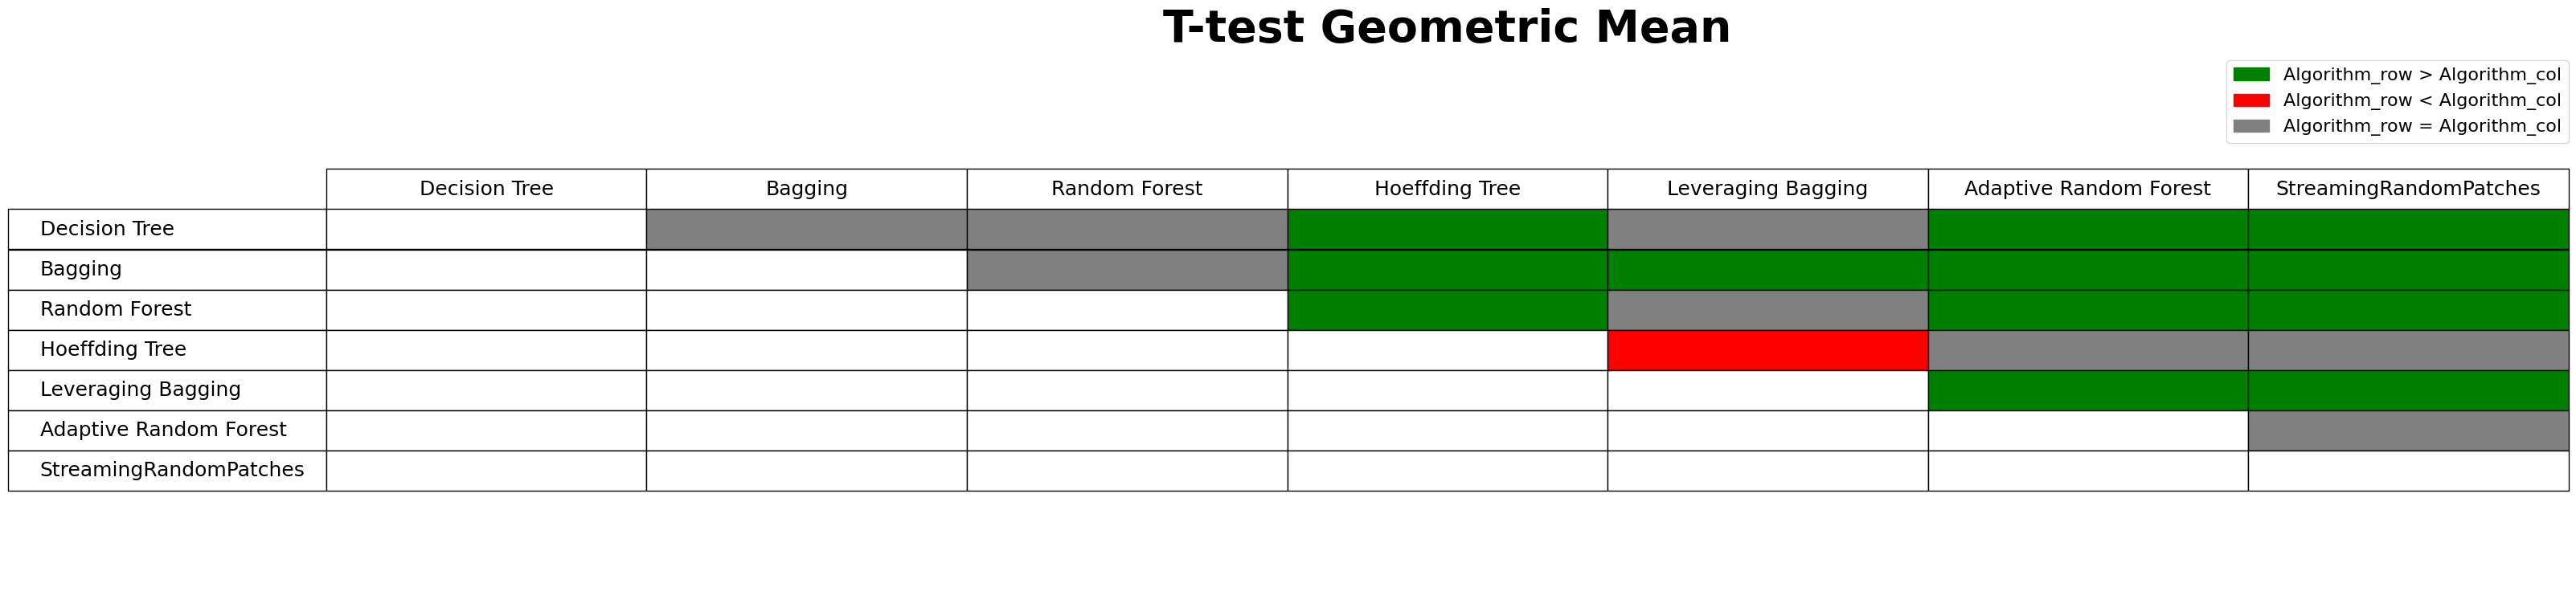

In [48]:
# Create the list of algorithms as 'x' and 'y' labels
algorithms = [
    "Decision Tree",
    "Bagging",
    "Random Forest",
    "Hoeffding Tree",
    "Leveraging Bagging",
    "Adaptive Random Forest",
    "StreamingRandomPatches"
]

# Create an empty dataframe for the table
df_table = pd.DataFrame(index=algorithms, columns=algorithms)

# Load the color data from the CSV file
df_colors = pd.read_csv('data/color_gmean.csv')

# Iterate over the rows of the color dataframe and fill the table
for _, row in df_colors.iterrows():
    algorithm_row = row['Algorithm_row']
    algorithm_col = row['Algorithm_col']
    color = row['Color']
    df_table.loc[algorithm_row, algorithm_col] = color

# Fill remaining cells with white color
df_table.fillna('white', inplace=True)

# Display the table with only colors
plt.figure(figsize=(12, 9))
plt.axis('off')
table = plt.table(cellText=[[''] * len(df_table.columns)] * len(df_table.index),  # Empty cellText
                  colLabels=df_table.columns,
                  rowLabels=df_table.index,
                  cellColours=df_table.values,
                  loc='center')
table.scale(3, 3)  # Increase cell size

# Increase the font size of the column and index labels
table.set_fontsize(21)

# Set the title of the table
plt.title('T-test Geometric Mean', fontsize=40, loc='center', fontweight='bold')

# Define color patches for the legend
legend_patches = [
    mpatches.Patch(color='limegreen', label='Algorithm_row > Algorithm_col'),
    mpatches.Patch(color='red', label='Algorithm_row < Algorithm_col'),
    mpatches.Patch(color='grey', label='Algorithm_row = Algorithm_col')
]

# Create the legend and display it on the top right corner
plt.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1.53, 1), fontsize=16)

# Save the table as an image
plt.savefig('data/color_gmean.png', bbox_inches='tight', pad_inches=1.0)

plt.show()

## T-test on Cohen's Kappa

In [188]:
# Create an empty dataframe
color_cohen_df = pd.DataFrame(columns=['Algorithm_row', 'Algorithm_col', 'Color'])
color = ''

In [189]:
print("\033[1mCohen's Kappa:\033[0m Decision Tree vs Hoeffding Tree")
print()
a = (0.59, 0.56, 0.50, 0.53, 0.53, 0.54, 0.51, 0.51, 0.53, 0.52)  # DT
b = (0.74, 0.74, 0.73, 0.74, 0.75, 0.61, 0.74, 0.74, 0.73, 0.75)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (DT) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (DT).")
        color = 'red'
    else:
        print("The mean of group a (DT) is not significantly less than the mean of group b (HT). Algorithm a (DT) is better than algorithm b (HT).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Decision Tree vs Hoeffding Tree

Levene's test p-value: 0.9437327790392792
The variances of group a (DT) and group b (HT) are not significantly different.

T-test two-sided p-value: 2.6744813747772477e-10
The means of group a (DT) and group b (HT) are significantly different.

T-test less p-value:  1.3372406873886238e-10
The mean of group a (DT) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (DT).


In [190]:
print("\033[1mCohen's Kappa:\033[0m Decision Tree vs Leveraging Bagging")
print()
a = (0.59, 0.56, 0.50, 0.53, 0.53, 0.54, 0.51, 0.51, 0.53, 0.52)  # DT
b = (0.69, 0.69, 0.71, 0.72, 0.70, 0.74, 0.69, 0.70, 0.74, 0.72)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (DT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (DT).")
        color = 'red'
    else:
        print("The mean of group a (DT) is not significantly less than the mean of group b (LB). Algorithm a (DT) is better than algorithm b (LB).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Decision Tree vs Leveraging Bagging

Levene's test p-value: 0.7743456756558184
The variances of group a (DT) and group b (LB) are not significantly different.

T-test two-sided p-value: 1.4223539574075572e-12
The means of group a (DT) and group b (LB) are significantly different.

T-test less p-value:  7.111769787037786e-13
The mean of group a (DT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (DT).


In [191]:
print("\033[1mCohen's Kappa:\033[0m Decision Tree vs Adaptive Random Forest")
print()
a = (0.59, 0.56, 0.50, 0.53, 0.53, 0.54, 0.51, 0.51, 0.53, 0.52)  # DT
b = (0.77, 0.72, 0.73, 0.73, 0.74, 0.73, 0.72, 0.73, 0.71, 0.72)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (DT) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (DT).")
        color = 'red'
    else:
        print("The mean of group a (DT) is not significantly less than the mean of group b (ARF). Algorithm a (DT) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Decision Tree vs Adaptive Random Forest

Levene's test p-value: 0.27582019585117107
The variances of group a (DT) and group b (ARF) are not significantly different.

T-test two-sided p-value: 9.0730245792718e-14
The means of group a (DT) and group b (ARF) are significantly different.

T-test less p-value:  4.5365122896359e-14
The mean of group a (DT) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (DT).


In [192]:
print("\033[1mCohen's Kappa:\033[0m Decision Tree vs StreamingRandomPatches")
print()
a = (0.59, 0.56, 0.50, 0.53, 0.53, 0.54, 0.51, 0.51, 0.53, 0.52)  # DT
b = (0.71, 0.78, 0.73, 0.74, 0.73, 0.71, 0.73, 0.72, 0.72, 0.73)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (DT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (DT).")
        color = 'red'
    else:
        print("The mean of group a (DT) is not significantly less than the mean of group b (SRP). Algorithm a (DT) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Decision Tree vs StreamingRandomPatches

Levene's test p-value: 0.445298085691781
The variances of group a (DT) and group b (SRP) are not significantly different.

T-test two-sided p-value: 2.7406195975513464e-13
The means of group a (DT) and group b (SRP) are significantly different.

T-test less p-value:  1.3703097987756732e-13
The mean of group a (DT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (DT).


In [193]:
print("\033[1mCohen's Kappa:\033[0m Decision Tree vs Bagging")
print()
a = (0.59, 0.56, 0.50, 0.53, 0.53, 0.54, 0.51, 0.51, 0.53, 0.52)  # DT
b = (0.62, 0.57, 0.64, 0.62, 0.60, 0.61, 0.59, 0.59, 0.60, 0.57)  # B

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (B) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (B) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (B) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (DT) is significantly less than the mean of group b (B). Algorithm b (B) is better than algorithm a (DT).")
        color = 'red'
    else:
        print("The mean of group a (DT) is not significantly less than the mean of group b (B). Algorithm a (DT) is better than algorithm b (B).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (B) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Decision Tree vs Bagging

Levene's test p-value: 0.8922706260430101
The variances of group a (DT) and group b (B) are not significantly different.

T-test two-sided p-value: 6.329397220784592e-06
The means of group a (DT) and group b (B) are significantly different.

T-test less p-value:  3.164698610392296e-06
The mean of group a (DT) is significantly less than the mean of group b (B). Algorithm b (B) is better than algorithm a (DT).


In [194]:
print("\033[1mCohen's Kappa:\033[0m Decision Tree vs Random Forest")
print()
a = (0.59, 0.56, 0.50, 0.53, 0.53, 0.54, 0.51, 0.51, 0.53, 0.52)  # DT
b = (0.57, 0.58, 0.57, 0.74, 0.66, 0.62, 0.69, 0.61, 0.62, 0.55)  # RF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (RF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (RF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (RF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (DT) is significantly less than the mean of group b (RF). Algorithm b (RF) is better than algorithm a (DT).")
        color = 'red'
    else:
        print("The mean of group a (DT) is not significantly less than the mean of group b (RF). Algorithm a (DT) is better than algorithm b (RF).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (RF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Decision Tree vs Random Forest

Levene's test p-value: 0.056262902582144454
The variances of group a (DT) and group b (RF) are not significantly different.

T-test two-sided p-value: 0.00044699603020562675
The means of group a (DT) and group b (RF) are significantly different.

T-test less p-value:  0.00022349801510281338
The mean of group a (DT) is significantly less than the mean of group b (RF). Algorithm b (RF) is better than algorithm a (DT).


In [195]:
print("\033[1mCohen's Kappa:\033[0m Bagging vs Leveraging Bagging")
print()
a = (0.62, 0.57, 0.64, 0.62, 0.60, 0.61, 0.59, 0.59, 0.60, 0.57)  # B
b = (0.69, 0.69, 0.71, 0.72, 0.70, 0.74, 0.69, 0.70, 0.74, 0.72)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (B) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (B).")
        color = 'red'
    else:
        print("The mean of group a (B) is not significantly less than the mean of group b (LB). Algorithm a (B) is better than algorithm b (LB).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Bagging vs Leveraging Bagging

Levene's test p-value: 0.857172695335954
The variances of group a (B) and group b (LB) are not significantly different.

T-test two-sided p-value: 8.210323193507307e-10
The means of group a (B) and group b (LB) are significantly different.

T-test less p-value:  4.1051615967536537e-10
The mean of group a (B) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (B).


In [196]:
print("\033[1mCohen's Kappa:\033[0m Bagging vs Hoeffding Tree")
print()
a = (0.62, 0.57, 0.64, 0.62, 0.60, 0.61, 0.59, 0.59, 0.60, 0.57)  # B
b = (0.74, 0.74, 0.73, 0.74, 0.75, 0.61, 0.74, 0.74, 0.73, 0.75)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (B) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (B).")
        color = 'red'
    else:
        print("The mean of group a (B) is not significantly less than the mean of group b (HT). Algorithm a (B) is better than algorithm b (HT).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Bagging vs Hoeffding Tree

Levene's test p-value: 1.0
The variances of group a (B) and group b (HT) are not significantly different.

T-test two-sided p-value: 1.151010029225861e-07
The means of group a (B) and group b (HT) are significantly different.

T-test less p-value:  5.755050146129305e-08
The mean of group a (B) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (B).


In [197]:
print("\033[1mCohen's Kappa:\033[0m Bagging vs Adaptive Random Forest")
print()
a = (0.62, 0.57, 0.64, 0.62, 0.60, 0.61, 0.59, 0.59, 0.60, 0.57)  # B
b = (0.77, 0.72, 0.73, 0.73, 0.74, 0.73, 0.72, 0.73, 0.71, 0.72)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (B) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (B).")
        color = 'red'
    else:
        print("The mean of group a (B) is not significantly less than the mean of group b (ARF). Algorithm a (B) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Bagging vs Adaptive Random Forest

Levene's test p-value: 0.24177304524038734
The variances of group a (B) and group b (ARF) are not significantly different.

T-test two-sided p-value: 1.7196324212801586e-11
The means of group a (B) and group b (ARF) are significantly different.

T-test less p-value:  8.598162106400793e-12
The mean of group a (B) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (B).


In [198]:
print("\033[1mCohen's Kappa:\033[0m Bagging vs StreamingRandomPatches")
print()
a = (0.62, 0.57, 0.64, 0.62, 0.60, 0.61, 0.59, 0.59, 0.60, 0.57)  # B
b = (0.71, 0.78, 0.73, 0.74, 0.73, 0.71, 0.73, 0.72, 0.72, 0.73)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (B) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (B).")
        color = 'red'
    else:
        print("The mean of group a (B) is not significantly less than the mean of group b (SRP). Algorithm a (B) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Bagging vs StreamingRandomPatches

Levene's test p-value: 0.4498206714132875
The variances of group a (B) and group b (SRP) are not significantly different.

T-test two-sided p-value: 6.514013923186139e-11
The means of group a (B) and group b (SRP) are significantly different.

T-test less p-value:  3.2570069615930696e-11
The mean of group a (B) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (B).


In [199]:
print("\033[1mCohen's Kappa:\033[0m Bagging vs Random Forest")
print()
a = (0.62, 0.57, 0.64, 0.62, 0.60, 0.61, 0.59, 0.59, 0.60, 0.57)  # B
b = (0.57, 0.58, 0.57, 0.74, 0.66, 0.62, 0.69, 0.61, 0.62, 0.55)  # RF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (RF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (RF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (RF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (B) is significantly less than the mean of group b (RF). Algorithm b (RF) is better than algorithm a (B).")
        color = 'red'
    else:
        print("The mean of group a (B) is not significantly less than the mean of group b (RF). Algorithm a (B) is better than algorithm b (RF).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (RF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Bagging vs Random Forest

Levene's test p-value: 0.0388459946705716
The variances of group a (B) and group b (RF) are significantly different.

T-test two-sided p-value: 0.3442161651484469
The means of group a (B) and group b (RF) are not significantly different.


In [200]:
print("\033[1mCohen's Kappa:\033[0m Random Forest vs Adaptive Random Forest")
print()
a = (0.57, 0.58, 0.57, 0.74, 0.66, 0.62, 0.69, 0.61, 0.62, 0.55)  # RF
b = (0.77, 0.72, 0.73, 0.73, 0.74, 0.73, 0.72, 0.73, 0.71, 0.72)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (RF) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (RF).")
        color = 'red'
    else:
        print("The mean of group a (RF) is not significantly less than the mean of group b (ARF). Algorithm a (RF) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (RF) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Random Forest vs Adaptive Random Forest

Levene's test p-value: 0.011679387657460264
The variances of group a (RF) and group b (ARF) are significantly different.

T-test two-sided p-value: 0.00022202281803644573
The means of group a (RF) and group b (ARF) are significantly different.

T-test less p-value:  0.00011101140901822287
The mean of group a (RF) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (RF).


In [201]:
print("\033[1mCohen's Kappa:\033[0m Random Forest vs Hoeffding Tree")
print()
a = (0.57, 0.58, 0.57, 0.74, 0.66, 0.62, 0.69, 0.61, 0.62, 0.55)  # RF
b = (0.74, 0.74, 0.73, 0.74, 0.75, 0.61, 0.74, 0.74, 0.73, 0.75)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (RF) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (RF).")
        color = 'red'
    else:
        print("The mean of group a (RF) is not significantly less than the mean of group b (HT). Algorithm a (RF) is better than algorithm b (HT).")
        color = 'limegreen'
else:
    print("The means of group a (RF) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Random Forest vs Hoeffding Tree

Levene's test p-value: 0.12342433362050274
The variances of group a (RF) and group b (HT) are not significantly different.

T-test two-sided p-value: 0.0002296213779728857
The means of group a (RF) and group b (HT) are significantly different.

T-test less p-value:  0.00011481068898644286
The mean of group a (RF) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (RF).


In [202]:
print("\033[1mCohen's Kappa:\033[0m Random Forest vs Leveraging Bagging")
print()
a = (0.57, 0.58, 0.57, 0.74, 0.66, 0.62, 0.69, 0.61, 0.62, 0.55)  # RF
b = (0.69, 0.69, 0.71, 0.72, 0.70, 0.74, 0.69, 0.70, 0.74, 0.72)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (RF) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (RF).")
        color = 'red'
    else:
        print("The mean of group a (RF) is not significantly less than the mean of group b (LB). Algorithm a (RF) is better than algorithm b (LB).")
        color = 'limegreen'
else:
    print("The means of group a (RF) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Random Forest vs Leveraging Bagging

Levene's test p-value: 0.030296912869993656
The variances of group a (RF) and group b (LB) are significantly different.

T-test two-sided p-value: 0.0009977342519593953
The means of group a (RF) and group b (LB) are significantly different.

T-test less p-value:  0.0004988671259796977
The mean of group a (RF) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (RF).


In [203]:
print("\033[1mCohen's Kappa:\033[0m Random Forest vs StreamingRandomPatches")
print()
a = (0.57, 0.58, 0.57, 0.74, 0.66, 0.62, 0.69, 0.61, 0.62, 0.55)  # RF
b = (0.71, 0.78, 0.73, 0.74, 0.73, 0.71, 0.73, 0.72, 0.72, 0.73)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (RF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (RF).")
        color = 'red'
    else:
        print("The mean of group a (RF) is not significantly less than the mean of group b (SRP). Algorithm a (RF) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (RF) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Random Forest vs StreamingRandomPatches

Levene's test p-value: 0.019000209964998186
The variances of group a (RF) and group b (SRP) are significantly different.

T-test two-sided p-value: 0.00020485791833931905
The means of group a (RF) and group b (SRP) are significantly different.

T-test less p-value:  0.00010242895916965953
The mean of group a (RF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (RF).


In [204]:
print("\033[1mCohen's Kappa:\033[0m Hoeffding Tree vs Leveraging Bagging")
print()
a = (0.74, 0.74, 0.73, 0.74, 0.75, 0.61, 0.74, 0.74, 0.73, 0.75)  # HT
b = (0.69, 0.69, 0.71, 0.72, 0.70, 0.74, 0.69, 0.70, 0.74, 0.72)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (HT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (HT).")
        color = 'red'
    else:
        print("The mean of group a (HT) is not significantly less than the mean of group b (LB). Algorithm a (HT) is better than algorithm b (LB).")
        color = 'limegreen'
else:
    print("The means of group a (HT) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Hoeffding Tree vs Leveraging Bagging

Levene's test p-value: 0.9401004884844366
The variances of group a (HT) and group b (LB) are not significantly different.

T-test two-sided p-value: 0.2573727623121411
The means of group a (HT) and group b (LB) are not significantly different.


In [205]:
print("\033[1mCohen's Kappa:\033[0m Hoeffding Tree vs Adaptive Random Forest")
print()
a = (0.74, 0.74, 0.73, 0.74, 0.75, 0.61, 0.74, 0.74, 0.73, 0.75)  # HT
b = (0.77, 0.72, 0.73, 0.73, 0.74, 0.73, 0.72, 0.73, 0.71, 0.72)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (HT) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (HT).")
        color = 'red'
    else:
        print("The mean of group a (HT) is not significantly less than the mean of group b (ARF). Algorithm a (HT) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (HT) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Hoeffding Tree vs Adaptive Random Forest

Levene's test p-value: 0.6038495598100844
The variances of group a (HT) and group b (ARF) are not significantly different.

T-test two-sided p-value: 0.8344328812772319
The means of group a (HT) and group b (ARF) are not significantly different.


In [206]:
print("\033[1mCohen's Kappa:\033[0m Hoeffding Tree vs StreamingRandomPatches")
print()
a = (0.74, 0.74, 0.73, 0.74, 0.75, 0.61, 0.74, 0.74, 0.73, 0.75)  # HT
b = (0.71, 0.78, 0.73, 0.74, 0.73, 0.71, 0.73, 0.72, 0.72, 0.73)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (HT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (HT).")
        color = 'red'
    else:
        print("The mean of group a (HT) is not significantly less than the mean of group b (SRP). Algorithm a (HT) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (HT) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Hoeffding Tree vs StreamingRandomPatches

Levene's test p-value: 0.7168033790806456
The variances of group a (HT) and group b (SRP) are not significantly different.

T-test two-sided p-value: 0.8396088878928665
The means of group a (HT) and group b (SRP) are not significantly different.


In [207]:
print("\033[1mCohen's Kappa:\033[0m Leveraging Bagging vs Adaptive Random Forest")
print()
a = (0.69, 0.69, 0.71, 0.72, 0.70, 0.74, 0.69, 0.70, 0.74, 0.72)  # LB
b = (0.77, 0.72, 0.73, 0.73, 0.74, 0.73, 0.72, 0.73, 0.71, 0.72)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (LB) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (LB) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (LB) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (LB) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (LB).")
        color = 'red'
    else:
        print("The mean of group a (LB) is not significantly less than the mean of group b (ARF). Algorithm a (LB) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (LB) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Leveraging Bagging'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Leveraging Bagging vs Adaptive Random Forest

Levene's test p-value: 0.2689438072810256
The variances of group a (LB) and group b (ARF) are not significantly different.

T-test two-sided p-value: 0.022711858478536406
The means of group a (LB) and group b (ARF) are significantly different.

T-test less p-value:  0.011355929239268203
The mean of group a (LB) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (LB).


In [208]:
print("\033[1mCohen's Kappa:\033[0m Leveraging Bagging vs StreamingRandomPatches")
print()
a = (0.69, 0.69, 0.71, 0.72, 0.70, 0.74, 0.69, 0.70, 0.74, 0.72)  # LB
b = (0.71, 0.78, 0.73, 0.74, 0.73, 0.71, 0.73, 0.72, 0.72, 0.73)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (LB) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (LB) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (LB) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (LB) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (LB).")
        color = 'red'
    else:
        print("The mean of group a (LB) is not significantly less than the mean of group b (SRP). Algorithm a (LB) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (LB) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Leveraging Bagging'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Leveraging Bagging vs StreamingRandomPatches

Levene's test p-value: 0.5140813345379902
The variances of group a (LB) and group b (SRP) are not significantly different.

T-test two-sided p-value: 0.035887998813630854
The means of group a (LB) and group b (SRP) are significantly different.

T-test less p-value:  0.017943999406815427
The mean of group a (LB) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (LB).


In [209]:
print("\033[1mCohen's Kappa:\033[0m Adaptive Random Forest vs StreamingRandomPatches")
print()
a = (0.77, 0.72, 0.73, 0.73, 0.74, 0.73, 0.72, 0.73, 0.71, 0.72)  # ARF
b = (0.71, 0.78, 0.73, 0.74, 0.73, 0.71, 0.73, 0.72, 0.72, 0.73)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (ARF) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (ARF) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (ARF) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (ARF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (ARF).")
        color = 'red'
    else:
        print("The mean of group a (ARF) is not significantly less than the mean of group b (SRP). Algorithm a (ARF) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (ARF) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Adaptive Random Forest'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Adaptive Random Forest vs StreamingRandomPatches

Levene's test p-value: 0.7541451147535596
The variances of group a (ARF) and group b (SRP) are not significantly different.

T-test two-sided p-value: 0.9999999999999893
The means of group a (ARF) and group b (SRP) are not significantly different.


In [ ]:
# Save the dataframe to a CSV file
color_cohen_df.to_csv('data/color_cohen.csv', index=False)

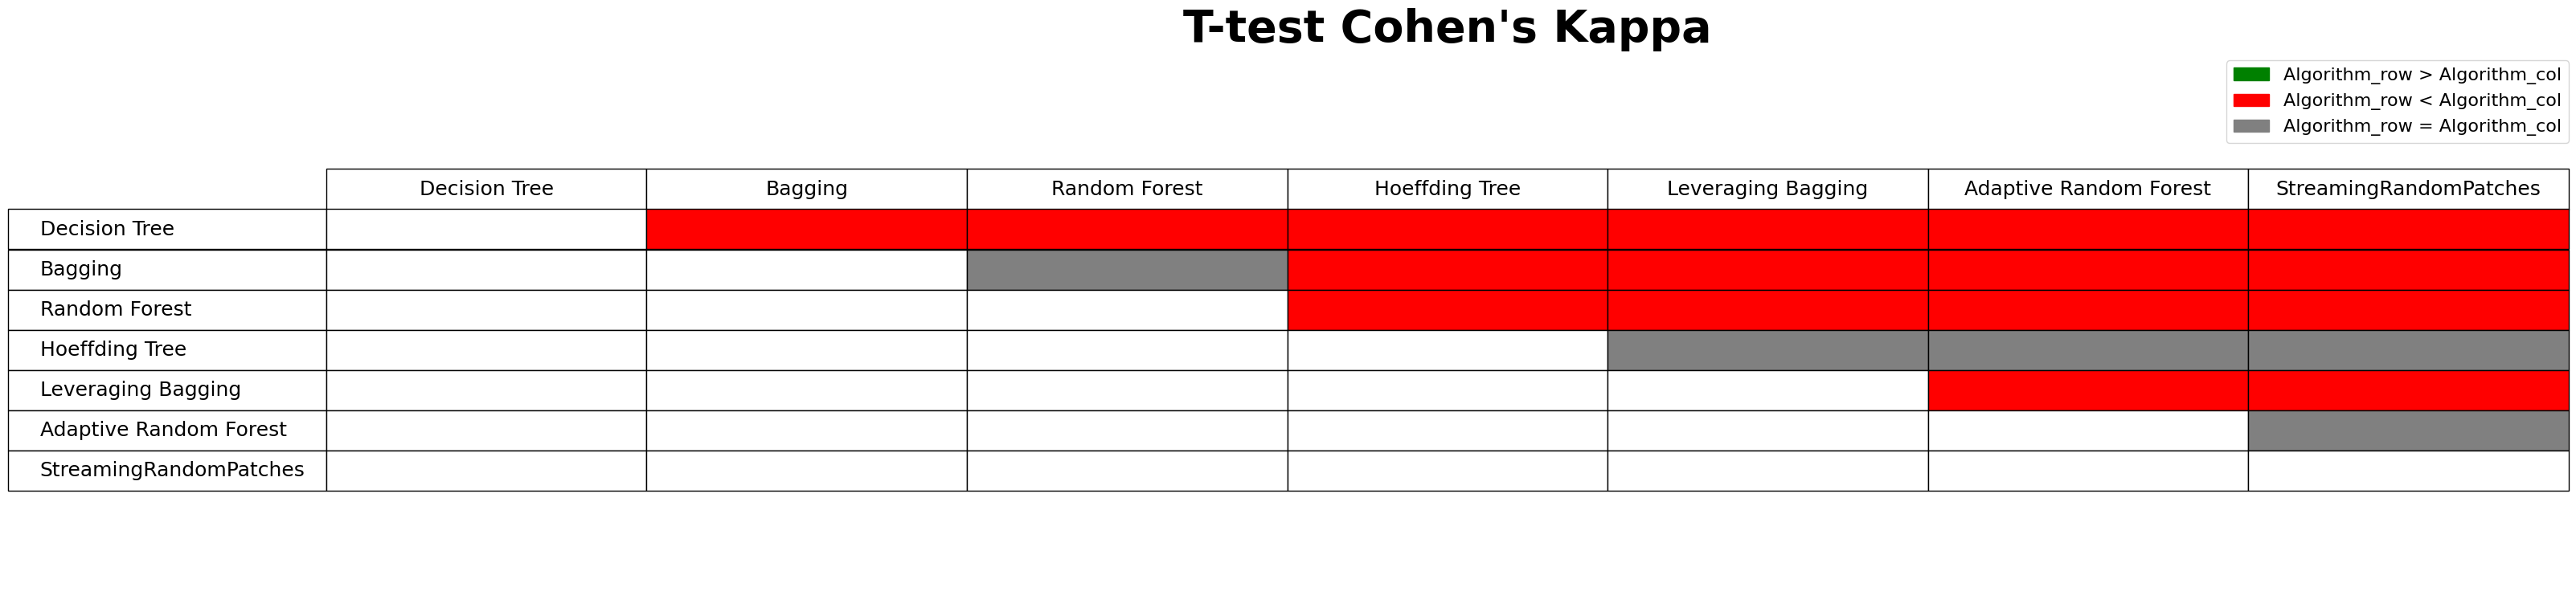

In [20]:
# Create the list of algorithms as 'x' and 'y' labels
algorithms = [
    "Decision Tree",
    "Bagging",
    "Random Forest",
    "Hoeffding Tree",
    "Leveraging Bagging",
    "Adaptive Random Forest",
    "StreamingRandomPatches"
]

# Create an empty dataframe for the table
df_table = pd.DataFrame(index=algorithms, columns=algorithms)

# Load the color data from the CSV file
df_colors = pd.read_csv('data/color_cohen.csv')

# Iterate over the rows of the color dataframe and fill the table
for _, row in df_colors.iterrows():
    algorithm_row = row['Algorithm_row']
    algorithm_col = row['Algorithm_col']
    color = row['Color']
    df_table.loc[algorithm_row, algorithm_col] = color

# Fill remaining cells with white color
df_table.fillna('white', inplace=True)

# Display the table with only colors
plt.figure(figsize=(12, 9))
plt.axis('off')
table = plt.table(cellText=[[''] * len(df_table.columns)] * len(df_table.index),  # Empty cellText
                  colLabels=df_table.columns,
                  rowLabels=df_table.index,
                  cellColours=df_table.values,
                  loc='center')
table.scale(3, 3)  # Increase cell size

# Increase the font size of the column and index labels
table.set_fontsize(21)

# Set the title of the table
plt.title('T-test Cohen\'s Kappa', fontsize=40, loc='center', fontweight='bold')

# Define color patches for the legend
legend_patches = [
    mpatches.Patch(color='limegreen', label='Algorithm_row > Algorithm_col'),
    mpatches.Patch(color='red', label='Algorithm_row < Algorithm_col'),
    mpatches.Patch(color='grey', label='Algorithm_row = Algorithm_col')
]

# Create the legend and display it on the top right corner
plt.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1.53, 1), fontsize=16)

# Save the table as an image
plt.savefig('data/color_cohen.png', bbox_inches='tight', pad_inches=1.0)

plt.show()

## T-test on Precision

In [4]:
# Create an empty dataframe
color_precision_df = pd.DataFrame(columns=['Algorithm_row', 'Algorithm_col', 'Color'])
color = ''

In [5]:
print("\033[1mPrecision:\033[0m Decision Tree vs Hoeffding Tree")
print()
a = (0.99, 0.98, 0.97, 0.98, 0.98, 0.97, 0.98, 0.97, 0.98, 0.97)  # DT
b = (0.94, 0.94, 0.93, 0.94, 0.94, 0.91, 0.94, 0.94, 0.93, 0.94)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (DT) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (DT).")
        color = 'red'
    else:
        print("The mean of group a (DT) is not significantly less than the mean of group b (HT). Algorithm a (DT) is better than algorithm b (HT).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Decision Tree vs Hoeffding Tree

Levene's test p-value: 1.0
The variances of group a (DT) and group b (HT) are not significantly different.

T-test two-sided p-value: 1.4669219400912818e-09
The means of group a (DT) and group b (HT) are significantly different.

T-test less p-value:  0.999999999266539
The mean of group a (DT) is not significantly less than the mean of group b (HT). Algorithm a (DT) is better than algorithm b (HT).


In [6]:
print("\033[1mPrecision:\033[0m Decision Tree vs Leveraging Bagging")
print()
a = (0.99, 0.98, 0.97, 0.98, 0.98, 0.97, 0.98, 0.97, 0.98, 0.97)  # DT
b = (0.95, 0.94, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.94)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (DT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (DT).")
        color = 'red'
    else:
        print("The mean of group a (DT) is not significantly less than the mean of group b (LB). Algorithm a (DT) is better than algorithm b (LB).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Decision Tree vs Leveraging Bagging

Levene's test p-value: 0.17687964807940015
The variances of group a (DT) and group b (LB) are not significantly different.

T-test two-sided p-value: 9.66255119463597e-10
The means of group a (DT) and group b (LB) are significantly different.

T-test less p-value:  0.9999999995168725
The mean of group a (DT) is not significantly less than the mean of group b (LB). Algorithm a (DT) is better than algorithm b (LB).


In [7]:
print("\033[1mPrecision:\033[0m Decision Tree vs Adaptive Random Forest")
print()
a = (0.99, 0.98, 0.97, 0.98, 0.98, 0.97, 0.98, 0.97, 0.98, 0.97)  # DT
b = (0.95, 0.94, 0.94, 0.94, 0.94, 0.93, 0.94, 0.94, 0.93, 0.93)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (DT) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (DT).")
        color = 'red'
    else:
        print("The mean of group a (DT) is not significantly less than the mean of group b (ARF). Algorithm a (DT) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Decision Tree vs Adaptive Random Forest

Levene's test p-value: 0.6733199381664119
The variances of group a (DT) and group b (ARF) are not significantly different.

T-test two-sided p-value: 9.090687246259802e-11
The means of group a (DT) and group b (ARF) are significantly different.

T-test less p-value:  0.9999999999545466
The mean of group a (DT) is not significantly less than the mean of group b (ARF). Algorithm a (DT) is better than algorithm b (ARF).


In [8]:
print("\033[1mPrecision:\033[0m Decision Tree vs StreamingRandomPatches")
print()
a = (0.99, 0.98, 0.97, 0.98, 0.98, 0.97, 0.98, 0.97, 0.98, 0.97)  # DT
b = (0.93, 0.94, 0.94, 0.94, 0.94, 0.93, 0.93, 0.93, 0.95, 0.94)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (DT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (DT).")
        color = 'red'
    else:
        print("The mean of group a (DT) is not significantly less than the mean of group b (SRP). Algorithm a (DT) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Decision Tree vs StreamingRandomPatches

Levene's test p-value: 1.0
The variances of group a (DT) and group b (SRP) are not significantly different.

T-test two-sided p-value: 1.0054740671929011e-10
The means of group a (DT) and group b (SRP) are significantly different.

T-test less p-value:  0.9999999999497263
The mean of group a (DT) is not significantly less than the mean of group b (SRP). Algorithm a (DT) is better than algorithm b (SRP).


In [9]:
print("\033[1mPrecision:\033[0m Decision Tree vs Bagging")
print()
a = (0.99, 0.98, 0.97, 0.98, 0.98, 0.97, 0.98, 0.97, 0.98, 0.97)  # DT
b = (0.98, 0.97, 0.98, 0.98, 0.97, 0.97, 0.98, 0.98, 0.98, 0.98)  # B

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (B) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (B) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (B) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (DT) is significantly less than the mean of group b (B). Algorithm b (B) is better than algorithm a (DT).")
        color = 'red'
    else:
        print("The mean of group a (DT) is not significantly less than the mean of group b (B). Algorithm a (DT) is better than algorithm b (B).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (B) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Decision Tree vs Bagging

Levene's test p-value: 0.3880091071517171
The variances of group a (DT) and group b (B) are not significantly different.

T-test two-sided p-value: 1.0
The means of group a (DT) and group b (B) are not significantly different.


In [10]:
print("\033[1mPrecision:\033[0m Decision Tree vs Random Forest")
print()
a = (0.99, 0.98, 0.97, 0.98, 0.98, 0.97, 0.98, 0.97, 0.98, 0.97)  # DT
b = (0.97, 0.97, 0.98, 0.98, 0.98, 0.97, 0.98, 0.97, 0.97, 0.97)  # RF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (RF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (RF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (RF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (DT) is significantly less than the mean of group b (RF). Algorithm b (RF) is better than algorithm a (DT).")
        color = 'red'
    else:
        print("The mean of group a (DT) is not significantly less than the mean of group b (RF). Algorithm a (DT) is better than algorithm b (RF).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (RF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Decision Tree vs Random Forest

Levene's test p-value: 0.6733199381664239
The variances of group a (DT) and group b (RF) are not significantly different.

T-test two-sided p-value: 0.27896922253983036
The means of group a (DT) and group b (RF) are not significantly different.


In [11]:
print("\033[1mPrecision:\033[0m Bagging vs Leveraging Bagging")
print()
a = (0.98, 0.97, 0.98, 0.98, 0.97, 0.97, 0.98, 0.98, 0.98, 0.98)  # B
b = (0.95, 0.94, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.94)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (B) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (B).")
        color = 'red'
    else:
        print("The mean of group a (B) is not significantly less than the mean of group b (LB). Algorithm a (B) is better than algorithm b (LB).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Bagging vs Leveraging Bagging

Levene's test p-value: 0.6278365031702056
The variances of group a (B) and group b (LB) are not significantly different.

T-test two-sided p-value: 2.850958674982322e-11
The means of group a (B) and group b (LB) are significantly different.

T-test less p-value:  0.9999999999857452
The mean of group a (B) is not significantly less than the mean of group b (LB). Algorithm a (B) is better than algorithm b (LB).


In [12]:
print("\033[1mPrecision:\033[0m Bagging vs Hoeffding Tree")
print()
a = (0.98, 0.97, 0.98, 0.98, 0.97, 0.97, 0.98, 0.98, 0.98, 0.98)  # B
b = (0.94, 0.94, 0.93, 0.94, 0.94, 0.91, 0.94, 0.94, 0.93, 0.94)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (B) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (B).")
        color = 'red'
    else:
        print("The mean of group a (B) is not significantly less than the mean of group b (HT). Algorithm a (B) is better than algorithm b (HT).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Bagging vs Hoeffding Tree

Levene's test p-value: 0.5672768905605632
The variances of group a (B) and group b (HT) are not significantly different.

T-test two-sided p-value: 3.675224740678259e-10
The means of group a (B) and group b (HT) are significantly different.

T-test less p-value:  0.9999999998162388
The mean of group a (B) is not significantly less than the mean of group b (HT). Algorithm a (B) is better than algorithm b (HT).


In [13]:
print("\033[1mPrecision:\033[0m Bagging vs Adaptive Random Forest")
print()
a = (0.98, 0.97, 0.98, 0.98, 0.97, 0.97, 0.98, 0.98, 0.98, 0.98)  # B
b = (0.95, 0.94, 0.94, 0.94, 0.94, 0.93, 0.94, 0.94, 0.93, 0.93)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (B) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (B).")
        color = 'red'
    else:
        print("The mean of group a (B) is not significantly less than the mean of group b (ARF). Algorithm a (B) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Bagging vs Adaptive Random Forest

Levene's test p-value: 0.6600556531895962
The variances of group a (B) and group b (ARF) are not significantly different.

T-test two-sided p-value: 7.461720946077467e-12
The means of group a (B) and group b (ARF) are significantly different.

T-test less p-value:  0.9999999999962692
The mean of group a (B) is not significantly less than the mean of group b (ARF). Algorithm a (B) is better than algorithm b (ARF).


In [14]:
print("\033[1mPrecision:\033[0m Bagging vs StreamingRandomPatches")
print()
a = (0.98, 0.97, 0.98, 0.98, 0.97, 0.97, 0.98, 0.98, 0.98, 0.98)  # B
b = (0.93, 0.94, 0.94, 0.94, 0.94, 0.93, 0.93, 0.93, 0.95, 0.94)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (B) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (B).")
        color = 'red'
    else:
        print("The mean of group a (B) is not significantly less than the mean of group b (SRP). Algorithm a (B) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Bagging vs StreamingRandomPatches

Levene's test p-value: 0.38800910715172565
The variances of group a (B) and group b (SRP) are not significantly different.

T-test two-sided p-value: 9.880408403773665e-12
The means of group a (B) and group b (SRP) are significantly different.

T-test less p-value:  0.9999999999950597
The mean of group a (B) is not significantly less than the mean of group b (SRP). Algorithm a (B) is better than algorithm b (SRP).


In [15]:
print("\033[1mPrecision:\033[0m Bagging vs Random Forest")
print()
a = (0.98, 0.97, 0.98, 0.98, 0.97, 0.97, 0.98, 0.98, 0.98, 0.98)  # B
b = (0.97, 0.97, 0.98, 0.98, 0.98, 0.97, 0.98, 0.97, 0.97, 0.97)  # RF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (RF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (RF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (RF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (B) is significantly less than the mean of group b (RF). Algorithm b (RF) is better than algorithm a (B).")
        color = 'red'
    else:
        print("The mean of group a (B) is not significantly less than the mean of group b (RF). Algorithm a (B) is better than algorithm b (RF).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (RF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Bagging vs Random Forest

Levene's test p-value: 0.6600556531895883
The variances of group a (B) and group b (RF) are not significantly different.

T-test two-sided p-value: 0.19639447228336707
The means of group a (B) and group b (RF) are not significantly different.


In [16]:
print("\033[1mPrecision:\033[0m Random Forest vs Adaptive Random Forest")
print()
a = (0.97, 0.97, 0.98, 0.98, 0.98, 0.97, 0.98, 0.97, 0.97, 0.97)  # RF
b = (0.95, 0.94, 0.94, 0.94, 0.94, 0.93, 0.94, 0.94, 0.93, 0.93)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (RF) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (RF).")
        color = 'red'
    else:
        print("The mean of group a (RF) is not significantly less than the mean of group b (ARF). Algorithm a (RF) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (RF) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Random Forest vs Adaptive Random Forest

Levene's test p-value: 1.0
The variances of group a (RF) and group b (ARF) are not significantly different.

T-test two-sided p-value: 4.350867177221773e-11
The means of group a (RF) and group b (ARF) are significantly different.

T-test less p-value:  0.9999999999782456
The mean of group a (RF) is not significantly less than the mean of group b (ARF). Algorithm a (RF) is better than algorithm b (ARF).


In [17]:
print("\033[1mPrecision:\033[0m Random Forest vs Hoeffding Tree")
print()
a = (0.97, 0.97, 0.98, 0.98, 0.98, 0.97, 0.98, 0.97, 0.97, 0.97)  # RF
b = (0.94, 0.94, 0.93, 0.94, 0.94, 0.91, 0.94, 0.94, 0.93, 0.94)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (RF) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (RF).")
        color = 'red'
    else:
        print("The mean of group a (RF) is not significantly less than the mean of group b (HT). Algorithm a (RF) is better than algorithm b (HT).")
        color = 'limegreen'
else:
    print("The means of group a (RF) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Random Forest vs Hoeffding Tree

Levene's test p-value: 0.7771278487505341
The variances of group a (RF) and group b (HT) are not significantly different.

T-test two-sided p-value: 1.5055958744795754e-09
The means of group a (RF) and group b (HT) are significantly different.

T-test less p-value:  0.9999999992472021
The mean of group a (RF) is not significantly less than the mean of group b (HT). Algorithm a (RF) is better than algorithm b (HT).


In [18]:
print("\033[1mPrecision:\033[0m Random Forest vs Leveraging Bagging")
print()
a = (0.97, 0.97, 0.98, 0.98, 0.98, 0.97, 0.98, 0.97, 0.97, 0.97)  # RF
b = (0.95, 0.94, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.94)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (RF) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (RF).")
        color = 'red'
    else:
        print("The mean of group a (RF) is not significantly less than the mean of group b (LB). Algorithm a (RF) is better than algorithm b (LB).")
        color = 'limegreen'
else:
    print("The means of group a (RF) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Random Forest vs Leveraging Bagging

Levene's test p-value: 0.3553458331278183
The variances of group a (RF) and group b (LB) are not significantly different.

T-test two-sided p-value: 3.2444389113783127e-10
The means of group a (RF) and group b (LB) are significantly different.

T-test less p-value:  0.999999999837778
The mean of group a (RF) is not significantly less than the mean of group b (LB). Algorithm a (RF) is better than algorithm b (LB).


In [19]:
print("\033[1mPrecision:\033[0m Random Forest vs StreamingRandomPatches")
print()
a = (0.97, 0.97, 0.98, 0.98, 0.98, 0.97, 0.98, 0.97, 0.97, 0.97)  # RF
b = (0.93, 0.94, 0.94, 0.94, 0.94, 0.93, 0.93, 0.93, 0.95, 0.94)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (RF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (RF).")
        color = 'red'
    else:
        print("The mean of group a (RF) is not significantly less than the mean of group b (SRP). Algorithm a (RF) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (RF) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Random Forest vs StreamingRandomPatches

Levene's test p-value: 0.6733199381664358
The variances of group a (RF) and group b (SRP) are not significantly different.

T-test two-sided p-value: 5.360545333819208e-11
The means of group a (RF) and group b (SRP) are significantly different.

T-test less p-value:  0.9999999999731972
The mean of group a (RF) is not significantly less than the mean of group b (SRP). Algorithm a (RF) is better than algorithm b (SRP).


In [20]:
print("\033[1mPrecision:\033[0m Hoeffding Tree vs Leveraging Bagging")
print()
a = (0.94, 0.94, 0.93, 0.94, 0.94, 0.91, 0.94, 0.94, 0.93, 0.94)  # HT
b = (0.95, 0.94, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.94)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (HT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (HT).")
        color = 'red'
    else:
        print("The mean of group a (HT) is not significantly less than the mean of group b (LB). Algorithm a (HT) is better than algorithm b (LB).")
        color = 'limegreen'
else:
    print("The means of group a (HT) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Hoeffding Tree vs Leveraging Bagging

Levene's test p-value: 0.3823219363829091
The variances of group a (HT) and group b (LB) are not significantly different.

T-test two-sided p-value: 0.0010956704769788455
The means of group a (HT) and group b (LB) are significantly different.

T-test less p-value:  0.0005478352384894228
The mean of group a (HT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (HT).


In [21]:
print("\033[1mPrecision:\033[0m Hoeffding Tree vs Adaptive Random Forest")
print()
a = (0.94, 0.94, 0.93, 0.94, 0.94, 0.91, 0.94, 0.94, 0.93, 0.94)  # HT
b = (0.95, 0.94, 0.94, 0.94, 0.94, 0.93, 0.94, 0.94, 0.93, 0.93)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (HT) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (HT).")
        color = 'red'
    else:
        print("The mean of group a (HT) is not significantly less than the mean of group b (ARF). Algorithm a (HT) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (HT) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Hoeffding Tree vs Adaptive Random Forest

Levene's test p-value: 0.7771278487505288
The variances of group a (HT) and group b (ARF) are not significantly different.

T-test two-sided p-value: 0.4239527769192676
The means of group a (HT) and group b (ARF) are not significantly different.


In [22]:
print("\033[1mPrecision:\033[0m Hoeffding Tree vs StreamingRandomPatches")
print()
a = (0.94, 0.94, 0.93, 0.94, 0.94, 0.91, 0.94, 0.94, 0.93, 0.94)  # HT
b = (0.93, 0.94, 0.94, 0.94, 0.94, 0.93, 0.93, 0.93, 0.95, 0.94)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (HT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (HT).")
        color = 'red'
    else:
        print("The mean of group a (HT) is not significantly less than the mean of group b (SRP). Algorithm a (HT) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (HT) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Hoeffding Tree vs StreamingRandomPatches

Levene's test p-value: 1.0
The variances of group a (HT) and group b (SRP) are not significantly different.

T-test two-sided p-value: 0.5995210639745356
The means of group a (HT) and group b (SRP) are not significantly different.


In [23]:
print("\033[1mPrecision:\033[0m Leveraging Bagging vs Adaptive Random Forest")
print()
a = (0.95, 0.94, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.94)  # LB
b = (0.95, 0.94, 0.94, 0.94, 0.94, 0.93, 0.94, 0.94, 0.93, 0.93)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (LB) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (LB) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (LB) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (LB) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (LB).")
        color = 'red'
    else:
        print("The mean of group a (LB) is not significantly less than the mean of group b (ARF). Algorithm a (LB) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (LB) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Leveraging Bagging'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Leveraging Bagging vs Adaptive Random Forest

Levene's test p-value: 0.35534583312782286
The variances of group a (LB) and group b (ARF) are not significantly different.

T-test two-sided p-value: 0.0005879215341279321
The means of group a (LB) and group b (ARF) are significantly different.

T-test less p-value:  0.999706039232936
The mean of group a (LB) is not significantly less than the mean of group b (ARF). Algorithm a (LB) is better than algorithm b (ARF).


In [24]:
print("\033[1mPrecision:\033[0m Leveraging Bagging vs StreamingRandomPatches")
print()
a = (0.95, 0.94, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.94)  # LB
b = (0.93, 0.94, 0.94, 0.94, 0.94, 0.93, 0.93, 0.93, 0.95, 0.94)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (LB) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (LB) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (LB) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (LB) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (LB).")
        color = 'red'
    else:
        print("The mean of group a (LB) is not significantly less than the mean of group b (SRP). Algorithm a (LB) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (LB) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Leveraging Bagging'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Leveraging Bagging vs StreamingRandomPatches

Levene's test p-value: 0.17687964807940418
The variances of group a (LB) and group b (SRP) are not significantly different.

T-test two-sided p-value: 0.00036839188793880563
The means of group a (LB) and group b (SRP) are significantly different.

T-test less p-value:  0.9998158040560307
The mean of group a (LB) is not significantly less than the mean of group b (SRP). Algorithm a (LB) is better than algorithm b (SRP).


In [25]:
print("\033[1mPrecision:\033[0m Adaptive Random Forest vs StreamingRandomPatches")
print()
a = (0.95, 0.94, 0.94, 0.94, 0.94, 0.93, 0.94, 0.94, 0.93, 0.93)  # ARF
b = (0.93, 0.94, 0.94, 0.94, 0.94, 0.93, 0.93, 0.93, 0.95, 0.94)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (ARF) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (ARF) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (ARF) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (ARF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (ARF).")
        color = 'red'
    else:
        print("The mean of group a (ARF) is not significantly less than the mean of group b (SRP). Algorithm a (ARF) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (ARF) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Adaptive Random Forest'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Adaptive Random Forest vs StreamingRandomPatches

Levene's test p-value: 0.6733199381664272
The variances of group a (ARF) and group b (SRP) are not significantly different.

T-test two-sided p-value: 0.736399043152183
The means of group a (ARF) and group b (SRP) are not significantly different.


In [ ]:
# Save the dataframe to a CSV file
color_precision_df.to_csv('data/color_precision.csv', index=False)

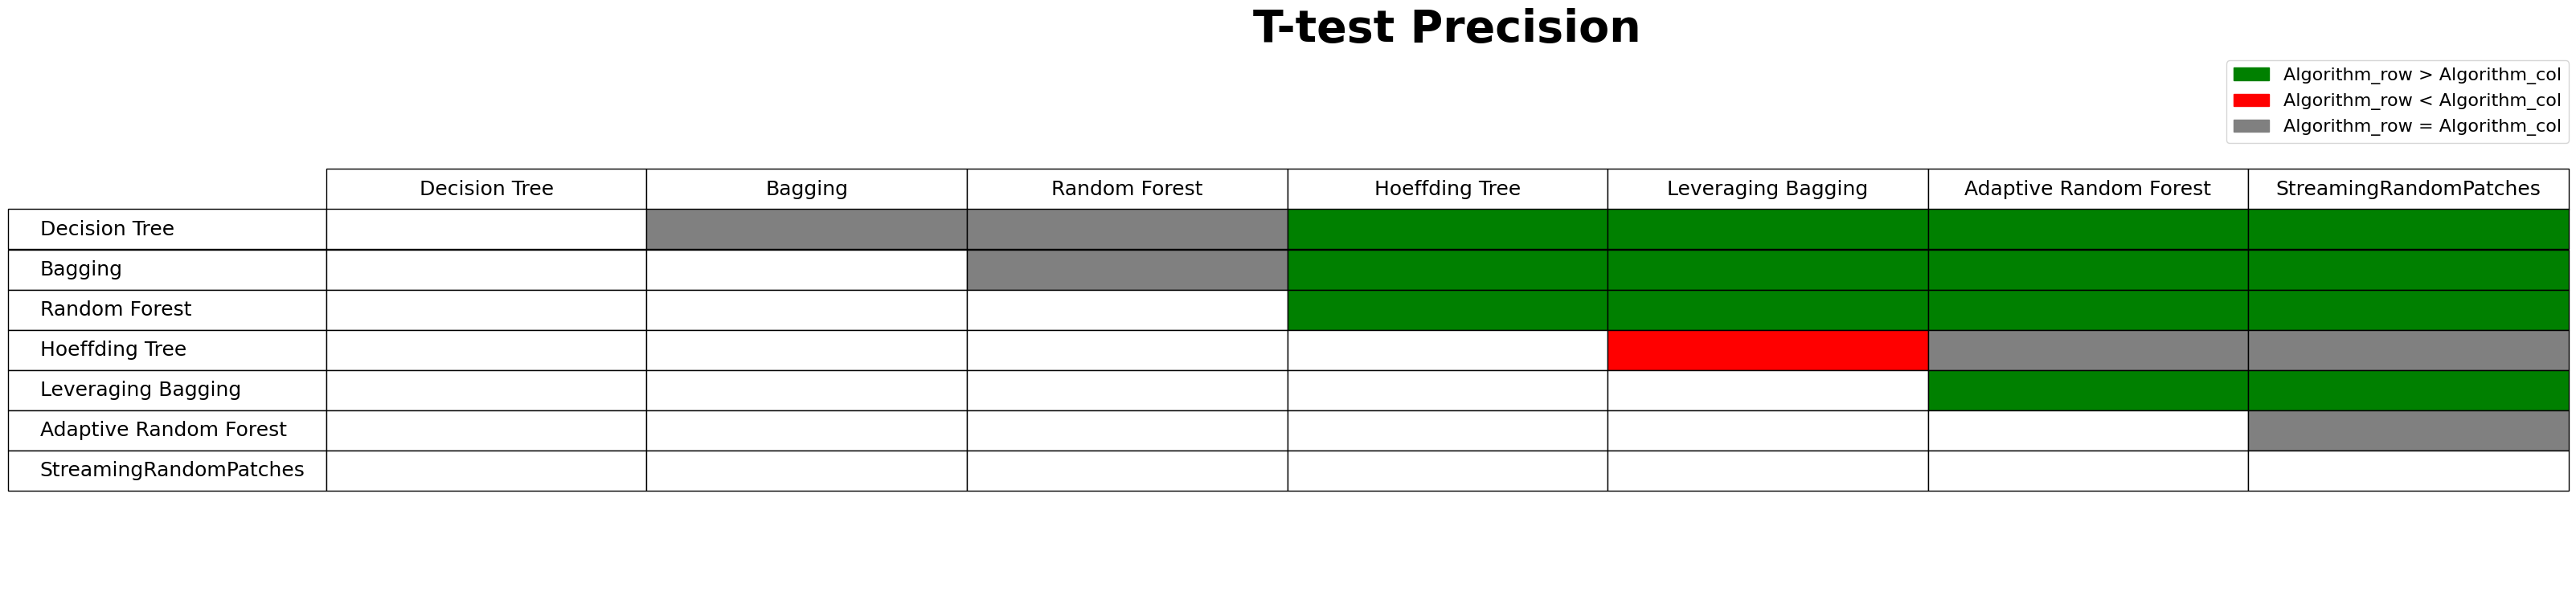

In [21]:
# Create the list of algorithms as 'x' and 'y' labels
algorithms = [
    "Decision Tree",
    "Bagging",
    "Random Forest",
    "Hoeffding Tree",
    "Leveraging Bagging",
    "Adaptive Random Forest",
    "StreamingRandomPatches"
]

# Create an empty dataframe for the table
df_table = pd.DataFrame(index=algorithms, columns=algorithms)

# Load the color data from the CSV file
df_colors = pd.read_csv('data/color_precision.csv')

# Iterate over the rows of the color dataframe and fill the table
for _, row in df_colors.iterrows():
    algorithm_row = row['Algorithm_row']
    algorithm_col = row['Algorithm_col']
    color = row['Color']
    df_table.loc[algorithm_row, algorithm_col] = color

# Fill remaining cells with white color
df_table.fillna('white', inplace=True)

# Display the table with only colors
plt.figure(figsize=(12, 9))
plt.axis('off')
table = plt.table(cellText=[[''] * len(df_table.columns)] * len(df_table.index),  # Empty cellText
                  colLabels=df_table.columns,
                  rowLabels=df_table.index,
                  cellColours=df_table.values,
                  loc='center')
table.scale(3, 3)  # Increase cell size

# Increase the font size of the column and index labels
table.set_fontsize(21)

# Set the title of the table
plt.title('T-test Precision', fontsize=40, loc='center', fontweight='bold')

# Define color patches for the legend
legend_patches = [
    mpatches.Patch(color='limegreen', label='Algorithm_row > Algorithm_col'),
    mpatches.Patch(color='red', label='Algorithm_row < Algorithm_col'),
    mpatches.Patch(color='grey', label='Algorithm_row = Algorithm_col')
]

# Create the legend and display it on the top right corner
plt.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1.53, 1), fontsize=16)

# Save the table as an image
plt.savefig('data/color_precision.png', bbox_inches='tight', pad_inches=1.0)

plt.show()

## T-test on Recall

In [27]:
# Create an empty dataframe
color_recall_df = pd.DataFrame(columns=['Algorithm_row', 'Algorithm_col', 'Color'])
color = ''

In [28]:
print("\033[1mRecall:\033[0m Decision Tree vs Hoeffding Tree")
print()
a = (0.90, 0.91, 0.89, 0.88, 0.90, 0.91, 0.88, 0.90, 0.89, 0.90)  # DT
b = (0.98, 0.98, 0.98, 0.98, 0.99, 0.98, 0.97, 0.98, 0.98, 0.98)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (DT) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (DT).")
        color = 'red'
    else:
        print("The mean of group a (DT) is not significantly less than the mean of group b (HT). Algorithm a (DT) is better than algorithm b (HT).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Decision Tree vs Hoeffding Tree

Levene's test p-value: 0.048037527740947175
The variances of group a (DT) and group b (HT) are significantly different.

T-test two-sided p-value: 2.022377733600484e-11
The means of group a (DT) and group b (HT) are significantly different.

T-test less p-value:  1.011188866800242e-11
The mean of group a (DT) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (DT).


In [29]:
print("\033[1mRecall:\033[0m Decision Tree vs Leveraging Bagging")
print()
a = (0.90, 0.91, 0.89, 0.88, 0.90, 0.91, 0.88, 0.90, 0.89, 0.90)  # DT
b = (0.94, 0.95, 0.94, 0.96, 0.94, 0.95, 0.93, 0.95, 0.96, 0.96)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (DT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (DT).")
        color = 'red'
    else:
        print("The mean of group a (DT) is not significantly less than the mean of group b (LB). Algorithm a (DT) is better than algorithm b (LB).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Decision Tree vs Leveraging Bagging

Levene's test p-value: 1.0
The variances of group a (DT) and group b (LB) are not significantly different.

T-test two-sided p-value: 1.9333755348872212e-09
The means of group a (DT) and group b (LB) are significantly different.

T-test less p-value:  9.666877674436106e-10
The mean of group a (DT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (DT).


In [30]:
print("\033[1mRecall:\033[0m Decision Tree vs Adaptive Random Forest")
print()
a = (0.90, 0.91, 0.89, 0.88, 0.90, 0.91, 0.88, 0.90, 0.89, 0.90)  # DT
b = (0.97, 0.96, 0.97, 0.97, 0.98, 0.99, 0.97, 0.97, 0.98, 0.98)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (DT) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (DT).")
        color = 'red'
    else:
        print("The mean of group a (DT) is not significantly less than the mean of group b (ARF). Algorithm a (DT) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Decision Tree vs Adaptive Random Forest

Levene's test p-value: 0.5559851671434354
The variances of group a (DT) and group b (ARF) are not significantly different.

T-test two-sided p-value: 5.597501869830282e-13
The means of group a (DT) and group b (ARF) are significantly different.

T-test less p-value:  2.798750934915141e-13
The mean of group a (DT) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (DT).


In [31]:
print("\033[1mRecall:\033[0m Decision Tree vs StreamingRandomPatches")
print()
a = (0.90, 0.91, 0.89, 0.88, 0.90, 0.91, 0.88, 0.90, 0.89, 0.90)  # DT
b = (0.97, 0.99, 0.97, 0.98, 0.98, 0.97, 0.99, 0.98, 0.96, 0.97)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (DT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (DT).")
        color = 'red'
    else:
        print("The mean of group a (DT) is not significantly less than the mean of group b (SRP). Algorithm a (DT) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Decision Tree vs StreamingRandomPatches

Levene's test p-value: 1.0
The variances of group a (DT) and group b (SRP) are not significantly different.

T-test two-sided p-value: 9.49148754334285e-13
The means of group a (DT) and group b (SRP) are significantly different.

T-test less p-value:  4.745743771671425e-13
The mean of group a (DT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (DT).


In [32]:
print("\033[1mRecall:\033[0m Decision Tree vs Bagging")
print()
a = (0.90, 0.91, 0.89, 0.88, 0.90, 0.91, 0.88, 0.90, 0.89, 0.90)  # DT
b = (0.93, 0.92, 0.94, 0.92, 0.93, 0.93, 0.91, 0.92, 0.92, 0.91)  # B

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (B) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (B) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (B) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (DT) is significantly less than the mean of group b (B). Algorithm b (B) is better than algorithm a (DT).")
        color = 'red'
    else:
        print("The mean of group a (DT) is not significantly less than the mean of group b (B). Algorithm a (DT) is better than algorithm b (B).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (B) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Decision Tree vs Bagging

Levene's test p-value: 0.7641615849178395
The variances of group a (DT) and group b (B) are not significantly different.

T-test two-sided p-value: 1.2353556680240326e-05
The means of group a (DT) and group b (B) are significantly different.

T-test less p-value:  6.176778340120163e-06
The mean of group a (DT) is significantly less than the mean of group b (B). Algorithm b (B) is better than algorithm a (DT).


In [33]:
print("\033[1mRecall:\033[0m Decision Tree vs Random Forest")
print()
a = (0.90, 0.91, 0.89, 0.88, 0.90, 0.91, 0.88, 0.90, 0.89, 0.90)  # DT
b = (0.92, 0.93, 0.92, 0.96, 0.94, 0.94, 0.96, 0.94, 0.94, 0.91)  # RF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (RF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (RF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (RF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (DT) is significantly less than the mean of group b (RF). Algorithm b (RF) is better than algorithm a (DT).")
        color = 'red'
    else:
        print("The mean of group a (DT) is not significantly less than the mean of group b (RF). Algorithm a (DT) is better than algorithm b (RF).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (RF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Decision Tree vs Random Forest

Levene's test p-value: 0.3722915005567339
The variances of group a (DT) and group b (RF) are not significantly different.

T-test two-sided p-value: 4.703411026249153e-06
The means of group a (DT) and group b (RF) are significantly different.

T-test less p-value:  2.3517055131245764e-06
The mean of group a (DT) is significantly less than the mean of group b (RF). Algorithm b (RF) is better than algorithm a (DT).


In [34]:
print("\033[1mRecall:\033[0m Bagging vs Leveraging Bagging")
print()
a = (0.93, 0.92, 0.94, 0.92, 0.93, 0.93, 0.91, 0.92, 0.92, 0.91)  # B
b = (0.94, 0.95, 0.94, 0.96, 0.94, 0.95, 0.93, 0.95, 0.96, 0.96)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (B) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (B).")
        color = 'red'
    else:
        print("The mean of group a (B) is not significantly less than the mean of group b (LB). Algorithm a (B) is better than algorithm b (LB).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Bagging vs Leveraging Bagging

Levene's test p-value: 0.7363990431521823
The variances of group a (B) and group b (LB) are not significantly different.

T-test two-sided p-value: 2.3884221215819992e-05
The means of group a (B) and group b (LB) are significantly different.

T-test less p-value:  1.1942110607909996e-05
The mean of group a (B) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (B).


In [35]:
print("\033[1mRecall:\033[0m Bagging vs Hoeffding Tree")
print()
a = (0.93, 0.92, 0.94, 0.92, 0.93, 0.93, 0.91, 0.92, 0.92, 0.91)  # B
b = (0.98, 0.98, 0.98, 0.98, 0.99, 0.98, 0.97, 0.98, 0.98, 0.98)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (B) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (B).")
        color = 'red'
    else:
        print("The mean of group a (B) is not significantly less than the mean of group b (HT). Algorithm a (B) is better than algorithm b (HT).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Bagging vs Hoeffding Tree

Levene's test p-value: 0.06238303277714617
The variances of group a (B) and group b (HT) are not significantly different.

T-test two-sided p-value: 1.5370553659952376e-12
The means of group a (B) and group b (HT) are significantly different.

T-test less p-value:  7.685276829976188e-13
The mean of group a (B) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (B).


In [36]:
print("\033[1mRecall:\033[0m Bagging vs Adaptive Random Forest")
print()
a = (0.93, 0.92, 0.94, 0.92, 0.93, 0.93, 0.91, 0.92, 0.92, 0.91)  # B
b = (0.97, 0.96, 0.97, 0.97, 0.98, 0.99, 0.97, 0.97, 0.98, 0.98)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (B) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (B).")
        color = 'red'
    else:
        print("The mean of group a (B) is not significantly less than the mean of group b (ARF). Algorithm a (B) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Bagging vs Adaptive Random Forest

Levene's test p-value: 0.7486335708568003
The variances of group a (B) and group b (ARF) are not significantly different.

T-test two-sided p-value: 1.9997991020681465e-10
The means of group a (B) and group b (ARF) are significantly different.

T-test less p-value:  9.998995510340732e-11
The mean of group a (B) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (B).


In [37]:
print("\033[1mRecall:\033[0m Bagging vs StreamingRandomPatches")
print()
a = (0.93, 0.92, 0.94, 0.92, 0.93, 0.93, 0.91, 0.92, 0.92, 0.91)  # B
b = (0.97, 0.99, 0.97, 0.98, 0.98, 0.97, 0.99, 0.98, 0.96, 0.97)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (B) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (B).")
        color = 'red'
    else:
        print("The mean of group a (B) is not significantly less than the mean of group b (SRP). Algorithm a (B) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Bagging vs StreamingRandomPatches

Levene's test p-value: 0.7076624925551114
The variances of group a (B) and group b (SRP) are not significantly different.

T-test two-sided p-value: 3.057595373487371e-10
The means of group a (B) and group b (SRP) are significantly different.

T-test less p-value:  1.5287976867436855e-10
The mean of group a (B) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (B).


In [38]:
print("\033[1mRecall:\033[0m Bagging vs Random Forest")
print()
a = (0.93, 0.92, 0.94, 0.92, 0.93, 0.93, 0.91, 0.92, 0.92, 0.91)  # B
b = (0.92, 0.93, 0.92, 0.96, 0.94, 0.94, 0.96, 0.94, 0.94, 0.91)  # RF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (RF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (RF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (RF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (B) is significantly less than the mean of group b (RF). Algorithm b (RF) is better than algorithm a (B).")
        color = 'red'
    else:
        print("The mean of group a (B) is not significantly less than the mean of group b (RF). Algorithm a (B) is better than algorithm b (RF).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (RF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Bagging vs Random Forest

Levene's test p-value: 0.24678459687447793
The variances of group a (B) and group b (RF) are not significantly different.

T-test two-sided p-value: 0.044215258705732306
The means of group a (B) and group b (RF) are significantly different.

T-test less p-value:  0.022107629352866153
The mean of group a (B) is significantly less than the mean of group b (RF). Algorithm b (RF) is better than algorithm a (B).


In [39]:
print("\033[1mRecall:\033[0m Random Forest vs Adaptive Random Forest")
print()
a = (0.92, 0.93, 0.92, 0.96, 0.94, 0.94, 0.96, 0.94, 0.94, 0.91)  # RF
b = (0.97, 0.96, 0.97, 0.97, 0.98, 0.99, 0.97, 0.97, 0.98, 0.98)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (RF) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (RF).")
        color = 'red'
    else:
        print("The mean of group a (RF) is not significantly less than the mean of group b (ARF). Algorithm a (RF) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (RF) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Random Forest vs Adaptive Random Forest

Levene's test p-value: 0.17183018646765136
The variances of group a (RF) and group b (ARF) are not significantly different.

T-test two-sided p-value: 4.149437616686641e-06
The means of group a (RF) and group b (ARF) are significantly different.

T-test less p-value:  2.0747188083433205e-06
The mean of group a (RF) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (RF).


In [40]:
print("\033[1mRecall:\033[0m Random Forest vs Hoeffding Tree")
print()
a = (0.92, 0.93, 0.92, 0.96, 0.94, 0.94, 0.96, 0.94, 0.94, 0.91)  # RF
b = (0.98, 0.98, 0.98, 0.98, 0.99, 0.98, 0.97, 0.98, 0.98, 0.98)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (RF) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (RF).")
        color = 'red'
    else:
        print("The mean of group a (RF) is not significantly less than the mean of group b (HT). Algorithm a (RF) is better than algorithm b (HT).")
        color = 'limegreen'
else:
    print("The means of group a (RF) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Random Forest vs Hoeffding Tree

Levene's test p-value: 0.01767923579959479
The variances of group a (RF) and group b (HT) are significantly different.

T-test two-sided p-value: 7.739377031645074e-06
The means of group a (RF) and group b (HT) are significantly different.

T-test less p-value:  3.869688515822537e-06
The mean of group a (RF) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (RF).


In [41]:
print("\033[1mRecall:\033[0m Random Forest vs Leveraging Bagging")
print()
a = (0.92, 0.93, 0.92, 0.96, 0.94, 0.94, 0.96, 0.94, 0.94, 0.91)  # RF
b = (0.94, 0.95, 0.94, 0.96, 0.94, 0.95, 0.93, 0.95, 0.96, 0.96)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (RF) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (RF).")
        color = 'red'
    else:
        print("The mean of group a (RF) is not significantly less than the mean of group b (LB). Algorithm a (RF) is better than algorithm b (LB).")
        color = 'limegreen'
else:
    print("The means of group a (RF) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Random Forest vs Leveraging Bagging

Levene's test p-value: 0.3432895832111117
The variances of group a (RF) and group b (LB) are not significantly different.

T-test two-sided p-value: 0.06662537252103265
The means of group a (RF) and group b (LB) are not significantly different.


In [42]:
print("\033[1mRecall:\033[0m Random Forest vs StreamingRandomPatches")
print()
a = (0.92, 0.93, 0.92, 0.96, 0.94, 0.94, 0.96, 0.94, 0.94, 0.91)  # RF
b = (0.97, 0.99, 0.97, 0.98, 0.98, 0.97, 0.99, 0.98, 0.96, 0.97)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (RF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (RF).")
        color = 'red'
    else:
        print("The mean of group a (RF) is not significantly less than the mean of group b (SRP). Algorithm a (RF) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (RF) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Random Forest vs StreamingRandomPatches

Levene's test p-value: 0.31883659628456457
The variances of group a (RF) and group b (SRP) are not significantly different.

T-test two-sided p-value: 3.2095229515112452e-06
The means of group a (RF) and group b (SRP) are significantly different.

T-test less p-value:  1.6047614757556226e-06
The mean of group a (RF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (RF).


In [43]:
print("\033[1mRecall:\033[0m Hoeffding Tree vs Leveraging Bagging")
print()
a = (0.98, 0.98, 0.98, 0.98, 0.99, 0.98, 0.97, 0.98, 0.98, 0.98)  # HT
b = (0.94, 0.95, 0.94, 0.96, 0.94, 0.95, 0.93, 0.95, 0.96, 0.96)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (HT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (HT).")
        color = 'red'
    else:
        print("The mean of group a (HT) is not significantly less than the mean of group b (LB). Algorithm a (HT) is better than algorithm b (LB).")
        color = 'limegreen'
else:
    print("The means of group a (HT) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Hoeffding Tree vs Leveraging Bagging

Levene's test p-value: 0.02248717874130667
The variances of group a (HT) and group b (LB) are significantly different.

T-test two-sided p-value: 8.532680434609975e-07
The means of group a (HT) and group b (LB) are significantly different.

T-test less p-value:  0.9999995733659783
The mean of group a (HT) is not significantly less than the mean of group b (LB). Algorithm a (HT) is better than algorithm b (LB).


In [44]:
print("\033[1mRecall:\033[0m Hoeffding Tree vs Adaptive Random Forest")
print()
a = (0.98, 0.98, 0.98, 0.98, 0.99, 0.98, 0.97, 0.98, 0.98, 0.98)  # HT
b = (0.97, 0.96, 0.97, 0.97, 0.98, 0.99, 0.97, 0.97, 0.98, 0.98)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (HT) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (HT).")
        color = 'red'
    else:
        print("The mean of group a (HT) is not significantly less than the mean of group b (ARF). Algorithm a (HT) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (HT) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Hoeffding Tree vs Adaptive Random Forest

Levene's test p-value: 0.13873818505085042
The variances of group a (HT) and group b (ARF) are not significantly different.

T-test two-sided p-value: 0.06516948808048391
The means of group a (HT) and group b (ARF) are not significantly different.


In [45]:
print("\033[1mRecall:\033[0m Hoeffding Tree vs StreamingRandomPatches")
print()
a = (0.98, 0.98, 0.98, 0.98, 0.99, 0.98, 0.97, 0.98, 0.98, 0.98)  # HT
b = (0.97, 0.99, 0.97, 0.98, 0.98, 0.97, 0.99, 0.98, 0.96, 0.97)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (HT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (HT).")
        color = 'red'
    else:
        print("The mean of group a (HT) is not significantly less than the mean of group b (SRP). Algorithm a (HT) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (HT) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Hoeffding Tree vs StreamingRandomPatches

Levene's test p-value: 0.008397798477534872
The variances of group a (HT) and group b (SRP) are significantly different.

T-test two-sided p-value: 0.2603252147352673
The means of group a (HT) and group b (SRP) are not significantly different.


In [46]:
print("\033[1mRecall:\033[0m Leveraging Bagging vs Adaptive Random Forest")
print()
a = (0.94, 0.95, 0.94, 0.96, 0.94, 0.95, 0.93, 0.95, 0.96, 0.96)  # LB
b = (0.97, 0.96, 0.97, 0.97, 0.98, 0.99, 0.97, 0.97, 0.98, 0.98)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (LB) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (LB) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (LB) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (LB) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (LB).")
        color = 'red'
    else:
        print("The mean of group a (LB) is not significantly less than the mean of group b (ARF). Algorithm a (LB) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (LB) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Leveraging Bagging'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Leveraging Bagging vs Adaptive Random Forest

Levene's test p-value: 0.5108517032053528
The variances of group a (LB) and group b (ARF) are not significantly different.

T-test two-sided p-value: 8.029045755617234e-06
The means of group a (LB) and group b (ARF) are significantly different.

T-test less p-value:  4.014522877808617e-06
The mean of group a (LB) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (LB).


In [47]:
print("\033[1mRecall:\033[0m Leveraging Bagging vs StreamingRandomPatches")
print()
a = (0.94, 0.95, 0.94, 0.96, 0.94, 0.95, 0.93, 0.95, 0.96, 0.96)  # LB
b = (0.97, 0.99, 0.97, 0.98, 0.98, 0.97, 0.99, 0.98, 0.96, 0.97)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (LB) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (LB) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (LB) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (LB) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (LB).")
        color = 'red'
    else:
        print("The mean of group a (LB) is not significantly less than the mean of group b (SRP). Algorithm a (LB) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (LB) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Leveraging Bagging'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Leveraging Bagging vs StreamingRandomPatches

Levene's test p-value: 1.0
The variances of group a (LB) and group b (SRP) are not significantly different.

T-test two-sided p-value: 6.633077967330336e-06
The means of group a (LB) and group b (SRP) are significantly different.

T-test less p-value:  3.316538983665168e-06
The mean of group a (LB) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (LB).


In [48]:
print("\033[1mRecall:\033[0m Adaptive Random Forest vs StreamingRandomPatches")
print()
a = (0.97, 0.96, 0.97, 0.97, 0.98, 0.99, 0.97, 0.97, 0.98, 0.98)  # ARF
b = (0.97, 0.99, 0.97, 0.98, 0.98, 0.97, 0.99, 0.98, 0.96, 0.97)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (ARF) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (ARF) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (ARF) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (ARF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (ARF).")
        color = 'red'
    else:
        print("The mean of group a (ARF) is not significantly less than the mean of group b (SRP). Algorithm a (ARF) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (ARF) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Adaptive Random Forest'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Adaptive Random Forest vs StreamingRandomPatches

Levene's test p-value: 0.46635559962592055
The variances of group a (ARF) and group b (SRP) are not significantly different.

T-test two-sided p-value: 0.6278365031702051
The means of group a (ARF) and group b (SRP) are not significantly different.


In [ ]:
# Save the dataframe to a CSV file
color_recall_df.to_csv('data/color_recall.csv', index=False)

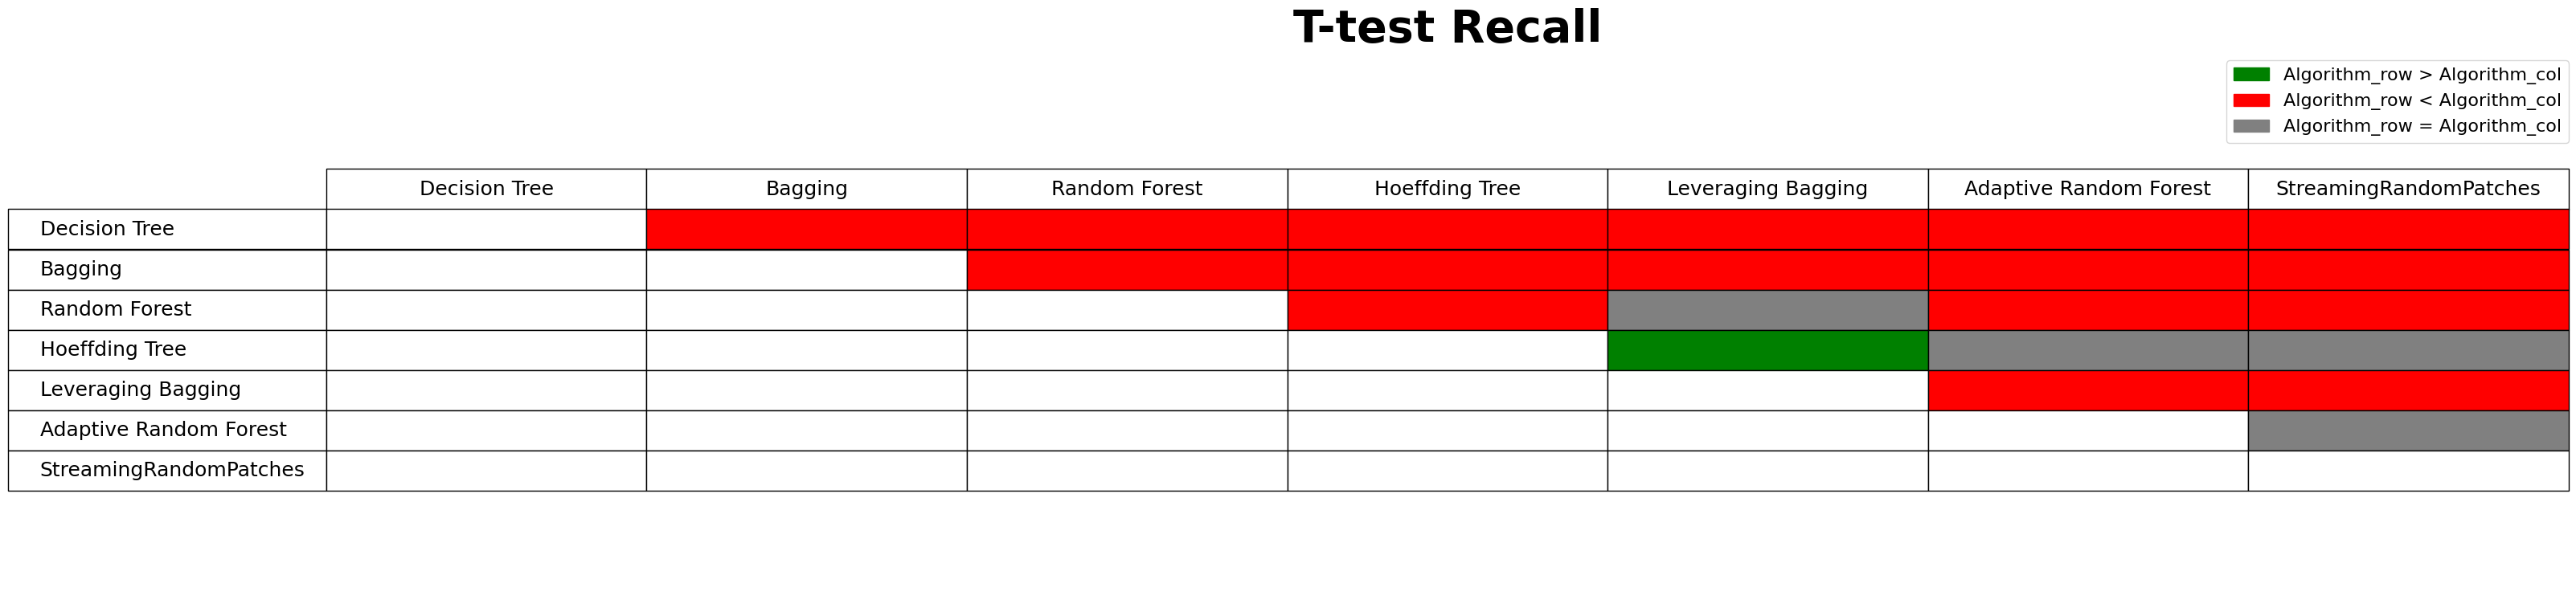

In [23]:
# Create the list of algorithms as 'x' and 'y' labels
algorithms = [
    "Decision Tree",
    "Bagging",
    "Random Forest",
    "Hoeffding Tree",
    "Leveraging Bagging",
    "Adaptive Random Forest",
    "StreamingRandomPatches"
]

# Create an empty dataframe for the table
df_table = pd.DataFrame(index=algorithms, columns=algorithms)

# Load the color data from the CSV file
df_colors = pd.read_csv('data/color_recall.csv')

# Iterate over the rows of the color dataframe and fill the table
for _, row in df_colors.iterrows():
    algorithm_row = row['Algorithm_row']
    algorithm_col = row['Algorithm_col']
    color = row['Color']
    df_table.loc[algorithm_row, algorithm_col] = color

# Fill remaining cells with white color
df_table.fillna('white', inplace=True)

# Display the table with only colors
plt.figure(figsize=(12, 9))
plt.axis('off')
table = plt.table(cellText=[[''] * len(df_table.columns)] * len(df_table.index),  # Empty cellText
                  colLabels=df_table.columns,
                  rowLabels=df_table.index,
                  cellColours=df_table.values,
                  loc='center')
table.scale(3, 3)  # Increase cell size

# Increase the font size of the column and index labels
table.set_fontsize(21)

# Set the title of the table
plt.title('T-test Recall', fontsize=40, loc='center', fontweight='bold')

# Define color patches for the legend
legend_patches = [
    mpatches.Patch(color='limegreen', label='Algorithm_row > Algorithm_col'),
    mpatches.Patch(color='red', label='Algorithm_row < Algorithm_col'),
    mpatches.Patch(color='grey', label='Algorithm_row = Algorithm_col')
]

# Create the legend and display it on the top right corner
plt.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1.53, 1), fontsize=16)

# Save the table as an image
plt.savefig('data/color_recall.png', bbox_inches='tight', pad_inches=1.0)

plt.show()

## T-test on F1 Score

In [50]:
# Create an empty dataframe
color_f1_df = pd.DataFrame(columns=['Algorithm_row', 'Algorithm_col', 'Color'])
color = ''

In [51]:
print("\033[1mF1 Score:\033[0m Decision Tree vs Hoeffding Tree")
print()
a = (0.94, 0.94, 0.93, 0.93, 0.94, 0.94, 0.93, 0.93, 0.93, 0.94)  # DT
b = (0.96, 0.96, 0.96, 0.96, 0.96, 0.94, 0.96, 0.96, 0.96, 0.96)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (DT) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (DT).")
        color = 'red'
    else:
        print("The mean of group a (DT) is not significantly less than the mean of group b (HT). Algorithm a (DT) is better than algorithm b (HT).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Decision Tree vs Hoeffding Tree

Levene's test p-value: 0.15095045218427447
The variances of group a (DT) and group b (HT) are not significantly different.

T-test two-sided p-value: 5.800458590699093e-08
The means of group a (DT) and group b (HT) are significantly different.

T-test less p-value:  2.9002292953495464e-08
The mean of group a (DT) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (DT).


In [52]:
print("\033[1mF1 Score:\033[0m Decision Tree vs Leveraging Bagging")
print()
a = (0.94, 0.94, 0.93, 0.93, 0.94, 0.94, 0.93, 0.93, 0.93, 0.94)  # DT
b = (0.94, 0.94, 0.95, 0.95, 0.94, 0.95, 0.94, 0.95, 0.95, 0.95)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (DT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (DT).")
        color = 'red'
    else:
        print("The mean of group a (DT) is not significantly less than the mean of group b (LB). Algorithm a (DT) is better than algorithm b (LB).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Decision Tree vs Leveraging Bagging

Levene's test p-value: 0.5479501508336315
The variances of group a (DT) and group b (LB) are not significantly different.

T-test two-sided p-value: 0.00017295281988462756
The means of group a (DT) and group b (LB) are significantly different.

T-test less p-value:  8.647640994231378e-05
The mean of group a (DT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (DT).


In [53]:
print("\033[1mF1 Score:\033[0m Decision Tree vs Adaptive Random Forest")
print()
a = (0.94, 0.94, 0.93, 0.93, 0.94, 0.94, 0.93, 0.93, 0.93, 0.94)  # DT
b = (0.96, 0.95, 0.96, 0.96, 0.96, 0.96, 0.95, 0.96, 0.95, 0.96)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (DT) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (DT).")
        color = 'red'
    else:
        print("The mean of group a (DT) is not significantly less than the mean of group b (ARF). Algorithm a (DT) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Decision Tree vs Adaptive Random Forest

Levene's test p-value: 0.20689819123393827
The variances of group a (DT) and group b (ARF) are not significantly different.

T-test two-sided p-value: 1.35615174950806e-08
The means of group a (DT) and group b (ARF) are significantly different.

T-test less p-value:  6.7807587475403e-09
The mean of group a (DT) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (DT).


In [54]:
print("\033[1mF1 Score:\033[0m Decision Tree vs StreamingRandomPatches")
print()
a = (0.94, 0.94, 0.93, 0.93, 0.94, 0.94, 0.93, 0.93, 0.93, 0.94)  # DT
b = (0.95, 0.96, 0.95, 0.96, 0.96, 0.95, 0.96, 0.96, 0.95, 0.96)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (DT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (DT).")
        color = 'red'
    else:
        print("The mean of group a (DT) is not significantly less than the mean of group b (SRP). Algorithm a (DT) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Decision Tree vs StreamingRandomPatches

Levene's test p-value: 0.5479501508336315
The variances of group a (DT) and group b (SRP) are not significantly different.

T-test two-sided p-value: 4.404278729182037e-08
The means of group a (DT) and group b (SRP) are significantly different.

T-test less p-value:  2.2021393645910184e-08
The mean of group a (DT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (DT).


In [55]:
print("\033[1mF1 Score:\033[0m Decision Tree vs Bagging")
print()
a = (0.94, 0.94, 0.93, 0.93, 0.94, 0.94, 0.93, 0.93, 0.93, 0.94)  # DT
b = (0.95, 0.95, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.94)  # B

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (B) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (B) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (B) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (DT) is significantly less than the mean of group b (B). Algorithm b (B) is better than algorithm a (DT).")
        color = 'red'
    else:
        print("The mean of group a (DT) is not significantly less than the mean of group b (B). Algorithm a (DT) is better than algorithm b (B).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (B) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Decision Tree vs Bagging

Levene's test p-value: 0.03719518635116366
The variances of group a (DT) and group b (B) are significantly different.

T-test two-sided p-value: 2.911103582940669e-06
The means of group a (DT) and group b (B) are significantly different.

T-test less p-value:  1.4555517914703345e-06
The mean of group a (DT) is significantly less than the mean of group b (B). Algorithm b (B) is better than algorithm a (DT).


In [56]:
print("\033[1mF1 Score:\033[0m Decision Tree vs Random Forest")
print()
a = (0.94, 0.94, 0.93, 0.93, 0.94, 0.94, 0.93, 0.93, 0.93, 0.94)  # DT
b = (0.95, 0.95, 0.94, 0.97, 0.96, 0.96, 0.97, 0.95, 0.96, 0.94)  # RF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (RF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (RF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (RF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (DT) is significantly less than the mean of group b (RF). Algorithm b (RF) is better than algorithm a (DT).")
        color = 'red'
    else:
        print("The mean of group a (DT) is not significantly less than the mean of group b (RF). Algorithm a (DT) is better than algorithm b (RF).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (RF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Decision Tree vs Random Forest

Levene's test p-value: 0.02476955880410796
The variances of group a (DT) and group b (RF) are significantly different.

T-test two-sided p-value: 0.00015137680130940083
The means of group a (DT) and group b (RF) are significantly different.

T-test less p-value:  7.568840065470041e-05
The mean of group a (DT) is significantly less than the mean of group b (RF). Algorithm b (RF) is better than algorithm a (DT).


In [57]:
print("\033[1mF1 Score:\033[0m Bagging vs Leveraging Bagging")
print()
a = (0.95, 0.95, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.94)  # B
b = (0.94, 0.94, 0.95, 0.95, 0.94, 0.95, 0.94, 0.95, 0.95, 0.95)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (B) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (B).")
        color = 'red'
    else:
        print("The mean of group a (B) is not significantly less than the mean of group b (LB). Algorithm a (B) is better than algorithm b (LB).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Bagging vs Leveraging Bagging

Levene's test p-value: 0.3553458331278183
The variances of group a (B) and group b (LB) are not significantly different.

T-test two-sided p-value: 0.08717412662875113
The means of group a (B) and group b (LB) are not significantly different.


In [58]:
print("\033[1mF1 Score:\033[0m Bagging vs Hoeffding Tree")
print()
a = (0.95, 0.95, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.94)  # B
b = (0.96, 0.96, 0.96, 0.96, 0.96, 0.94, 0.96, 0.96, 0.96, 0.96)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (B) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (B).")
        color = 'red'
    else:
        print("The mean of group a (B) is not significantly less than the mean of group b (HT). Algorithm a (B) is better than algorithm b (HT).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Bagging vs Hoeffding Tree

Levene's test p-value: 1.0
The variances of group a (B) and group b (HT) are not significantly different.

T-test two-sided p-value: 0.004885250129793416
The means of group a (B) and group b (HT) are significantly different.

T-test less p-value:  0.002442625064896708
The mean of group a (B) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (B).


In [59]:
print("\033[1mF1 Score:\033[0m Bagging vs Adaptive Random Forest")
print()
a = (0.95, 0.95, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.94)  # B
b = (0.96, 0.95, 0.96, 0.96, 0.96, 0.96, 0.95, 0.96, 0.95, 0.96)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (B) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (B).")
        color = 'red'
    else:
        print("The mean of group a (B) is not significantly less than the mean of group b (ARF). Algorithm a (B) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Bagging vs Adaptive Random Forest

Levene's test p-value: 0.6278365031702056
The variances of group a (B) and group b (ARF) are not significantly different.

T-test two-sided p-value: 0.00416416140161299
The means of group a (B) and group b (ARF) are significantly different.

T-test less p-value:  0.002082080700806495
The mean of group a (B) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (B).


In [60]:
print("\033[1mF1 Score:\033[0m Bagging vs StreamingRandomPatches")
print()
a = (0.95, 0.95, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.94)  # B
b = (0.95, 0.96, 0.95, 0.96, 0.96, 0.95, 0.96, 0.96, 0.95, 0.96)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (B) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (B).")
        color = 'red'
    else:
        print("The mean of group a (B) is not significantly less than the mean of group b (SRP). Algorithm a (B) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Bagging vs StreamingRandomPatches

Levene's test p-value: 0.3553458331278183
The variances of group a (B) and group b (SRP) are not significantly different.

T-test two-sided p-value: 0.014234208579582738
The means of group a (B) and group b (SRP) are significantly different.

T-test less p-value:  0.007117104289791369
The mean of group a (B) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (B).


In [61]:
print("\033[1mF1 Score:\033[0m Bagging vs Random Forest")
print()
a = (0.95, 0.95, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.94)  # B
b = (0.95, 0.95, 0.94, 0.97, 0.96, 0.96, 0.97, 0.95, 0.96, 0.94)  # RF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (RF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (RF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (RF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (B) is significantly less than the mean of group b (RF). Algorithm b (RF) is better than algorithm a (B).")
        color = 'red'
    else:
        print("The mean of group a (B) is not significantly less than the mean of group b (RF). Algorithm a (B) is better than algorithm b (RF).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (RF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Bagging vs Random Forest

Levene's test p-value: 0.003806012124451578
The variances of group a (B) and group b (RF) are significantly different.

T-test two-sided p-value: 0.2039411084142587
The means of group a (B) and group b (RF) are not significantly different.


In [62]:
print("\033[1mF1 Score:\033[0m Random Forest vs Adaptive Random Forest")
print()
a = (0.95, 0.95, 0.94, 0.97, 0.96, 0.96, 0.97, 0.95, 0.96, 0.94)  # RF
b = (0.96, 0.95, 0.96, 0.96, 0.96, 0.96, 0.95, 0.96, 0.95, 0.96)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (RF) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (RF).")
        color = 'red'
    else:
        print("The mean of group a (RF) is not significantly less than the mean of group b (ARF). Algorithm a (RF) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (RF) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Random Forest vs Adaptive Random Forest

Levene's test p-value: 0.015180791322443052
The variances of group a (RF) and group b (ARF) are significantly different.

T-test two-sided p-value: 0.602386801521501
The means of group a (RF) and group b (ARF) are not significantly different.


In [63]:
print("\033[1mF1 Score:\033[0m Random Forest vs Hoeffding Tree")
print()
a = (0.95, 0.95, 0.94, 0.97, 0.96, 0.96, 0.97, 0.95, 0.96, 0.94)  # RF
b = (0.96, 0.96, 0.96, 0.96, 0.96, 0.94, 0.96, 0.96, 0.96, 0.96)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (RF) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (RF).")
        color = 'red'
    else:
        print("The mean of group a (RF) is not significantly less than the mean of group b (HT). Algorithm a (RF) is better than algorithm b (HT).")
        color = 'limegreen'
else:
    print("The means of group a (RF) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Random Forest vs Hoeffding Tree

Levene's test p-value: 0.014310490954003644
The variances of group a (RF) and group b (HT) are significantly different.

T-test two-sided p-value: 0.46061222848046146
The means of group a (RF) and group b (HT) are not significantly different.


In [64]:
print("\033[1mF1 Score:\033[0m Random Forest vs Leveraging Bagging")
print()
a = (0.95, 0.95, 0.94, 0.97, 0.96, 0.96, 0.97, 0.95, 0.96, 0.94)  # RF
b = (0.94, 0.94, 0.95, 0.95, 0.94, 0.95, 0.94, 0.95, 0.95, 0.95)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (RF) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (RF).")
        color = 'red'
    else:
        print("The mean of group a (RF) is not significantly less than the mean of group b (LB). Algorithm a (RF) is better than algorithm b (LB).")
        color = 'limegreen'
else:
    print("The means of group a (RF) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Random Forest vs Leveraging Bagging

Levene's test p-value: 0.04406374785904311
The variances of group a (RF) and group b (LB) are significantly different.

T-test two-sided p-value: 0.03360291698734071
The means of group a (RF) and group b (LB) are significantly different.

T-test less p-value:  0.9831985415063297
The mean of group a (RF) is not significantly less than the mean of group b (LB). Algorithm a (RF) is better than algorithm b (LB).


In [65]:
print("\033[1mF1 Score:\033[0m Random Forest vs StreamingRandomPatches")
print()
a = (0.95, 0.95, 0.94, 0.97, 0.96, 0.96, 0.97, 0.95, 0.96, 0.94)  # RF
b = (0.95, 0.96, 0.95, 0.96, 0.96, 0.95, 0.96, 0.96, 0.95, 0.96)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (RF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (RF).")
        color = 'red'
    else:
        print("The mean of group a (RF) is not significantly less than the mean of group b (SRP). Algorithm a (RF) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (RF) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Random Forest vs StreamingRandomPatches

Levene's test p-value: 0.04406374785904311
The variances of group a (RF) and group b (SRP) are significantly different.

T-test two-sided p-value: 0.7958452203733808
The means of group a (RF) and group b (SRP) are not significantly different.


In [66]:
print("\033[1mF1 Score:\033[0m Hoeffding Tree vs Leveraging Bagging")
print()
a = (0.96, 0.96, 0.96, 0.96, 0.96, 0.94, 0.96, 0.96, 0.96, 0.96)  # HT
b = (0.94, 0.94, 0.95, 0.95, 0.94, 0.95, 0.94, 0.95, 0.95, 0.95)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (HT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (HT).")
        color = 'red'
    else:
        print("The mean of group a (HT) is not significantly less than the mean of group b (LB). Algorithm a (HT) is better than algorithm b (LB).")
        color = 'limegreen'
else:
    print("The means of group a (HT) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Hoeffding Tree vs Leveraging Bagging

Levene's test p-value: 0.44863410575680185
The variances of group a (HT) and group b (LB) are not significantly different.

T-test two-sided p-value: 0.0002001906843595258
The means of group a (HT) and group b (LB) are significantly different.

T-test less p-value:  0.9998999046578203
The mean of group a (HT) is not significantly less than the mean of group b (LB). Algorithm a (HT) is better than algorithm b (LB).


In [67]:
print("\033[1mF1 Score:\033[0m Hoeffding Tree vs Adaptive Random Forest")
print()
a = (0.96, 0.96, 0.96, 0.96, 0.96, 0.94, 0.96, 0.96, 0.96, 0.96)  # HT
b = (0.96, 0.95, 0.96, 0.96, 0.96, 0.96, 0.95, 0.96, 0.95, 0.96)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (HT) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (HT).")
        color = 'red'
    else:
        print("The mean of group a (HT) is not significantly less than the mean of group b (ARF). Algorithm a (HT) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (HT) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Hoeffding Tree vs Adaptive Random Forest

Levene's test p-value: 0.6957747001328562
The variances of group a (HT) and group b (ARF) are not significantly different.

T-test two-sided p-value: 0.6957747001328254
The means of group a (HT) and group b (ARF) are not significantly different.


In [68]:
print("\033[1mF1 Score:\033[0m Hoeffding Tree vs StreamingRandomPatches")
print()
a = (0.96, 0.96, 0.96, 0.96, 0.96, 0.94, 0.96, 0.96, 0.96, 0.96)  # HT
b = (0.95, 0.96, 0.95, 0.96, 0.96, 0.95, 0.96, 0.96, 0.95, 0.96)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (HT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (HT).")
        color = 'red'
    else:
        print("The mean of group a (HT) is not significantly less than the mean of group b (SRP). Algorithm a (HT) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (HT) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Hoeffding Tree vs StreamingRandomPatches

Levene's test p-value: 0.44863410575680185
The variances of group a (HT) and group b (SRP) are not significantly different.

T-test two-sided p-value: 0.44863410575672835
The means of group a (HT) and group b (SRP) are not significantly different.


In [69]:
print("\033[1mF1 Score:\033[0m Leveraging Bagging vs Adaptive Random Forest")
print()
a = (0.94, 0.94, 0.95, 0.95, 0.94, 0.95, 0.94, 0.95, 0.95, 0.95)  # LB
b = (0.96, 0.95, 0.96, 0.96, 0.96, 0.96, 0.95, 0.96, 0.95, 0.96)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (LB) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (LB) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (LB) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (LB) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (LB).")
        color = 'red'
    else:
        print("The mean of group a (LB) is not significantly less than the mean of group b (ARF). Algorithm a (LB) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (LB) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Leveraging Bagging'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Leveraging Bagging vs Adaptive Random Forest

Levene's test p-value: 0.6600556531895883
The variances of group a (LB) and group b (ARF) are not significantly different.

T-test two-sided p-value: 0.00011058156983791445
The means of group a (LB) and group b (ARF) are significantly different.

T-test less p-value:  5.5290784918957224e-05
The mean of group a (LB) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (LB).


In [70]:
print("\033[1mF1 Score:\033[0m Leveraging Bagging vs StreamingRandomPatches")
print()
a = (0.94, 0.94, 0.95, 0.95, 0.94, 0.95, 0.94, 0.95, 0.95, 0.95)  # LB
b = (0.95, 0.96, 0.95, 0.96, 0.96, 0.95, 0.96, 0.96, 0.95, 0.96)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (LB) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (LB) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (LB) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (LB) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (LB).")
        color = 'red'
    else:
        print("The mean of group a (LB) is not significantly less than the mean of group b (SRP). Algorithm a (LB) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (LB) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Leveraging Bagging'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Leveraging Bagging vs StreamingRandomPatches

Levene's test p-value: 1.0
The variances of group a (LB) and group b (SRP) are not significantly different.

T-test two-sided p-value: 0.0004032525947441652
The means of group a (LB) and group b (SRP) are significantly different.

T-test less p-value:  0.0002016262973720826
The mean of group a (LB) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (LB).


In [71]:
print("\033[1mF1 Score:\033[0m Adaptive Random Forest vs StreamingRandomPatches")
print()
a = (0.96, 0.95, 0.96, 0.96, 0.96, 0.96, 0.95, 0.96, 0.95, 0.96)  # ARF
b = (0.95, 0.96, 0.95, 0.96, 0.96, 0.95, 0.96, 0.96, 0.95, 0.96)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (ARF) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (ARF) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (ARF) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print("The mean of group a (ARF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (ARF).")
        color = 'red'
    else:
        print("The mean of group a (ARF) is not significantly less than the mean of group b (SRP). Algorithm a (ARF) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (ARF) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Adaptive Random Forest'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Adaptive Random Forest vs StreamingRandomPatches

Levene's test p-value: 0.6600556531895883
The variances of group a (ARF) and group b (SRP) are not significantly different.

T-test two-sided p-value: 0.6600556531895174
The means of group a (ARF) and group b (SRP) are not significantly different.


In [ ]:
# Save the dataframe to a CSV file
color_f1_df.to_csv('data/color_f1.csv', index=False)

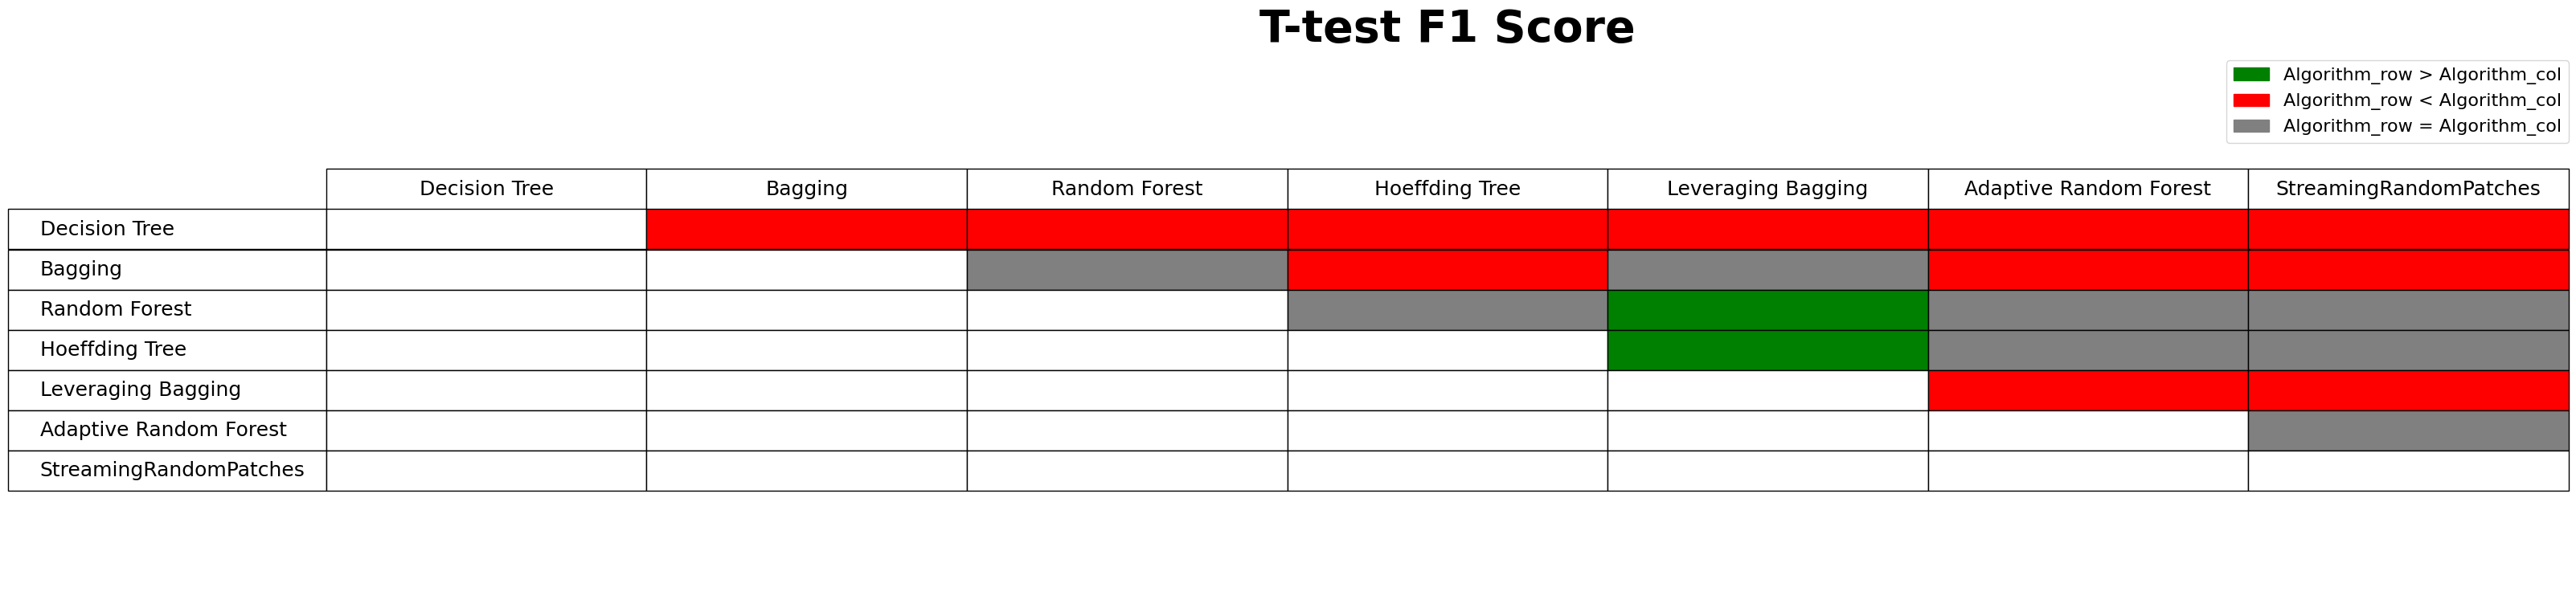

In [24]:
# Create the list of algorithms as 'x' and 'y' labels
algorithms = [
    "Decision Tree",
    "Bagging",
    "Random Forest",
    "Hoeffding Tree",
    "Leveraging Bagging",
    "Adaptive Random Forest",
    "StreamingRandomPatches"
]

# Create an empty dataframe for the table
df_table = pd.DataFrame(index=algorithms, columns=algorithms)

# Load the color data from the CSV file
df_colors = pd.read_csv('data/color_f1.csv')

# Iterate over the rows of the color dataframe and fill the table
for _, row in df_colors.iterrows():
    algorithm_row = row['Algorithm_row']
    algorithm_col = row['Algorithm_col']
    color = row['Color']
    df_table.loc[algorithm_row, algorithm_col] = color

# Fill remaining cells with white color
df_table.fillna('white', inplace=True)

# Display the table with only colors
plt.figure(figsize=(12, 9))
plt.axis('off')
table = plt.table(cellText=[[''] * len(df_table.columns)] * len(df_table.index),  # Empty cellText
                  colLabels=df_table.columns,
                  rowLabels=df_table.index,
                  cellColours=df_table.values,
                  loc='center')
table.scale(3, 3)  # Increase cell size

# Increase the font size of the column and index labels
table.set_fontsize(21)

# Set the title of the table
plt.title('T-test F1 Score', fontsize=40, loc='center', fontweight='bold')

# Define color patches for the legend
legend_patches = [
    mpatches.Patch(color='limegreen', label='Algorithm_row > Algorithm_col'),
    mpatches.Patch(color='red', label='Algorithm_row < Algorithm_col'),
    mpatches.Patch(color='grey', label='Algorithm_row = Algorithm_col')
]

# Create the legend and display it on the top right corner
plt.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1.53, 1), fontsize=16)

# Save the table as an image
plt.savefig('data/color_f1.png', bbox_inches='tight', pad_inches=1.0)

plt.show()

Performance metrics of the largest datasets generated through SMOTE and C-SMOTE.

## T-test on Balanced Accuracy

In [2]:
# Create an empty dataframe
color_accuracy_df = pd.DataFrame(columns=['Algorithm_row', 'Algorithm_col', 'Color'])
color = ''

In [3]:
print("\033[1mBalanced Accuracy:\033[0m Decision Tree vs Hoeffding Tree")
print()
a = (0.80, 0.81, 0.80, 0.79, 0.80, 0.80, 0.80, 0.81, 0.80, 0.81)  # DT
b = (0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (DT).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (HT). Algorithm a (DT) is better than algorithm b (HT).")
        color = 'red'
else:
    print("The means of group a (DT) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Decision Tree vs Hoeffding Tree

Levene's test p-value: 0.024769558804109686
The variances of group a (DT) and group b (HT) are significantly different.

T-test two-sided p-value: 2.0508298985827874e-07
The means of group a (DT) and group b (HT) are significantly different.

T-test less p-value:  1.0254149492913937e-07
The mean of group a (DT) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (DT).


C:\Users\Amministratore\AppData\Local\Temp\ipykernel_4852\159491340.py:24: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')
C:\Users\Amministratore\AppData\Local\Temp\ipykernel_4852\159491340.py:35: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')


In [4]:
print("\033[1mBalanced Accuracy:\033[0m Decision Tree vs Leveraging Bagging")
print()
a = (0.80, 0.81, 0.80, 0.79, 0.80, 0.80, 0.80, 0.81, 0.80, 0.81)  # DT
b = (0.84, 0.85, 0.84, 0.85, 0.84, 0.85, 0.85, 0.86, 0.85, 0.86)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (DT).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (LB). Algorithm a (DT) is better than algorithm b (LB).")
        color = 'red'
else:
    print("The means of group a (DT) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Decision Tree vs Leveraging Bagging

Levene's test p-value: 0.6733199381664239
The variances of group a (DT) and group b (LB) are not significantly different.

T-test two-sided p-value: 9.315532701667583e-12
The means of group a (DT) and group b (LB) are significantly different.

T-test less p-value:  4.657766350833791e-12
The mean of group a (DT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (DT).


In [5]:
print("\033[1mBalanced Accuracy:\033[0m Decision Tree vs Adaptive Random Forest")
print()
a = (0.80, 0.81, 0.80, 0.79, 0.80, 0.80, 0.80, 0.81, 0.80, 0.81)  # DT
b = (0.81, 0.85, 0.84, 0.84, 0.82, 0.84, 0.82, 0.83, 0.83, 0.82)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (DT).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (ARF). Algorithm a (DT) is better than algorithm b (ARF).")
        color = 'red'
else:
    print("The means of group a (DT) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Decision Tree vs Adaptive Random Forest

Levene's test p-value: 0.03719518635116055
The variances of group a (DT) and group b (ARF) are significantly different.

T-test two-sided p-value: 2.3162145151191637e-05
The means of group a (DT) and group b (ARF) are significantly different.

T-test less p-value:  1.1581072575595818e-05
The mean of group a (DT) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (DT).


In [6]:
print("\033[1mBalanced Accuracy:\033[0m Decision Tree vs StreamingRandomPatches")
print()
a = (0.80, 0.81, 0.80, 0.79, 0.80, 0.80, 0.80, 0.81, 0.80, 0.81)  # DT
b = (0.86, 0.85, 0.84, 0.85, 0.87, 0.86, 0.85, 0.86, 0.86, 0.86)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (DT).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (SRP). Algorithm a (DT) is better than algorithm b (SRP).")
        color = 'red'
else:
    print("The means of group a (DT) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Decision Tree vs StreamingRandomPatches

Levene's test p-value: 0.4762128707046315
The variances of group a (DT) and group b (SRP) are not significantly different.

T-test two-sided p-value: 3.532602636221695e-12
The means of group a (DT) and group b (SRP) are significantly different.

T-test less p-value:  1.7663013181108475e-12
The mean of group a (DT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (DT).


In [7]:
print("\033[1mBalanced Accuracy:\033[0m Decision Tree vs Bagging")
print()
a = (0.80, 0.81, 0.80, 0.79, 0.80, 0.80, 0.80, 0.81, 0.80, 0.81)  # DT
b = (0.84, 0.84, 0.85, 0.84, 0.83, 0.84, 0.85, 0.84, 0.85, 0.85)  # B

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (B) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (B) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (B) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (B). Algorithm b (B) is better than algorithm a (DT).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (B). Algorithm a (DT) is better than algorithm b (B).")
        color = 'orange'
else:
    print("The means of group a (DT) and group b (B) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Decision Tree vs Bagging

Levene's test p-value: 0.6733199381664239
The variances of group a (DT) and group b (B) are not significantly different.

T-test two-sided p-value: 3.9838380788737106e-11
The means of group a (DT) and group b (B) are significantly different.

T-test less p-value:  1.9919190394368553e-11
The mean of group a (DT) is significantly less than the mean of group b (B). Algorithm b (B) is better than algorithm a (DT).


In [8]:
print("\033[1mBalanced Accuracy:\033[0m Decision Tree vs Random Forest")
print()
a = (0.80, 0.81, 0.80, 0.79, 0.80, 0.80, 0.80, 0.81, 0.80, 0.81)  # DT
b = (0.82, 0.82, 0.80, 0.84, 0.83, 0.82, 0.82, 0.80, 0.82, 0.82)  # RF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (RF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (RF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (RF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (RF). Algorithm b (RF) is better than algorithm a (DT).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (RF). Algorithm a (DT) is better than algorithm b (RF).")
        color = 'orange'
else:
    print("The means of group a (DT) and group b (RF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Decision Tree vs Random Forest

Levene's test p-value: 0.3913491563873044
The variances of group a (DT) and group b (RF) are not significantly different.

T-test two-sided p-value: 0.0008971782864956405
The means of group a (DT) and group b (RF) are significantly different.

T-test less p-value:  0.00044858914324782023
The mean of group a (DT) is significantly less than the mean of group b (RF). Algorithm b (RF) is better than algorithm a (DT).


In [9]:
print("\033[1mBalanced Accuracy:\033[0m Bagging vs Leveraging Bagging")
print()
a = (0.84, 0.84, 0.85, 0.84, 0.83, 0.84, 0.85, 0.84, 0.85, 0.85)  # B
b = (0.84, 0.85, 0.84, 0.85, 0.84, 0.85, 0.85, 0.86, 0.85, 0.86)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (B).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (LB). Algorithm a (B) is better than algorithm b (LB).")
        color = 'red'
else:
    print("The means of group a (B) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Bagging vs Leveraging Bagging

Levene's test p-value: 1.0
The variances of group a (B) and group b (LB) are not significantly different.

T-test two-sided p-value: 0.07394020035117083
The means of group a (B) and group b (LB) are not significantly different.


In [10]:
print("\033[1mBalanced Accuracy:\033[0m Bagging vs Hoeffding Tree")
print()
a = (0.84, 0.84, 0.85, 0.84, 0.83, 0.84, 0.85, 0.84, 0.85, 0.85)  # B
b = (0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (B).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (HT). Algorithm a (B) is better than algorithm b (HT).")
        color = 'red'
else:
    print("The means of group a (B) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Bagging vs Hoeffding Tree

Levene's test p-value: 0.007685412140314316
The variances of group a (B) and group b (HT) are significantly different.

T-test two-sided p-value: 0.00018126273512633701
The means of group a (B) and group b (HT) are significantly different.

T-test less p-value:  0.9999093686324368
The mean of group a (B) is not significantly less than the mean of group b (HT). Algorithm a (B) is better than algorithm b (HT).


C:\Users\Amministratore\AppData\Local\Temp\ipykernel_4852\1778941992.py:24: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')
C:\Users\Amministratore\AppData\Local\Temp\ipykernel_4852\1778941992.py:35: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')


In [11]:
print("\033[1mBalanced Accuracy:\033[0m Bagging vs Adaptive Random Forest")
print()
a = (0.84, 0.84, 0.85, 0.84, 0.83, 0.84, 0.85, 0.84, 0.85, 0.85)  # B
b = (0.81, 0.85, 0.84, 0.84, 0.82, 0.84, 0.82, 0.83, 0.83, 0.82)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (B).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (ARF). Algorithm a (B) is better than algorithm b (ARF).")
        color = 'red'
else:
    print("The means of group a (B) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Bagging vs Adaptive Random Forest

Levene's test p-value: 0.07922998223566267
The variances of group a (B) and group b (ARF) are not significantly different.

T-test two-sided p-value: 0.009569189777112849
The means of group a (B) and group b (ARF) are significantly different.

T-test less p-value:  0.9952154051114436
The mean of group a (B) is not significantly less than the mean of group b (ARF). Algorithm a (B) is better than algorithm b (ARF).


In [12]:
print("\033[1mBalanced Accuracy:\033[0m Bagging vs StreamingRandomPatches")
print()
a = (0.84, 0.84, 0.85, 0.84, 0.83, 0.84, 0.85, 0.84, 0.85, 0.85)  # B
b = (0.86, 0.85, 0.84, 0.85, 0.87, 0.86, 0.85, 0.86, 0.86, 0.86)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (B).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (SRP). Algorithm a (B) is better than algorithm b (SRP).")
        color = 'red'
else:
    print("The means of group a (B) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Bagging vs StreamingRandomPatches

Levene's test p-value: 0.7221858255539939
The variances of group a (B) and group b (SRP) are not significantly different.

T-test two-sided p-value: 0.0012939430410390006
The means of group a (B) and group b (SRP) are significantly different.

T-test less p-value:  0.0006469715205195003
The mean of group a (B) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (B).


In [13]:
print("\033[1mBalanced Accuracy:\033[0m Bagging vs Random Forest")
print()
a = (0.84, 0.84, 0.85, 0.84, 0.83, 0.84, 0.85, 0.84, 0.85, 0.85)  # B
b = (0.82, 0.82, 0.80, 0.84, 0.83, 0.82, 0.82, 0.80, 0.82, 0.82)  # RF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (RF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (RF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (RF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (RF). Algorithm b (RF) is better than algorithm a (B).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (RF). Algorithm a (B) is better than algorithm b (RF).")
        color = 'orange'
else:
    print("The means of group a (B) and group b (RF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Bagging vs Random Forest

Levene's test p-value: 0.5672768905605609
The variances of group a (B) and group b (RF) are not significantly different.

T-test two-sided p-value: 3.042290637115743e-05
The means of group a (B) and group b (RF) are significantly different.

T-test less p-value:  0.9999847885468144
The mean of group a (B) is not significantly less than the mean of group b (RF). Algorithm a (B) is better than algorithm b (RF).


In [14]:
print("\033[1mBalanced Accuracy:\033[0m Random Forest vs Adaptive Random Forest")
print()
a = (0.82, 0.82, 0.80, 0.84, 0.83, 0.82, 0.82, 0.80, 0.82, 0.82)  # RF
b = (0.81, 0.85, 0.84, 0.84, 0.82, 0.84, 0.82, 0.83, 0.83, 0.82)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (RF) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (RF).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (RF) is not significantly less than the mean of group b (ARF). Algorithm a (RF) is better than algorithm b (ARF).")
        color = 'red'
else:
    print("The means of group a (RF) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Random Forest vs Adaptive Random Forest

Levene's test p-value: 0.4239527769192666
The variances of group a (RF) and group b (ARF) are not significantly different.

T-test two-sided p-value: 0.05942736543581741
The means of group a (RF) and group b (ARF) are not significantly different.


In [15]:
print("\033[1mBalanced Accuracy:\033[0m Random Forest vs Hoeffding Tree")
print()
a = (0.82, 0.82, 0.80, 0.84, 0.83, 0.82, 0.82, 0.80, 0.82, 0.82)  # RF
b = (0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (RF) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (RF).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (RF) is not significantly less than the mean of group b (HT). Algorithm a (RF) is better than algorithm b (HT).")
        color = 'red'
else:
    print("The means of group a (RF) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Random Forest vs Hoeffding Tree

Levene's test p-value: 0.031429156554054385
The variances of group a (RF) and group b (HT) are significantly different.

T-test two-sided p-value: 0.017438860908345552
The means of group a (RF) and group b (HT) are significantly different.

T-test less p-value:  0.008719430454172776
The mean of group a (RF) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (RF).


C:\Users\Amministratore\AppData\Local\Temp\ipykernel_4852\315796770.py:24: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')
C:\Users\Amministratore\AppData\Local\Temp\ipykernel_4852\315796770.py:35: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')


In [16]:
print("\033[1mBalanced Accuracy:\033[0m Random Forest vs Leveraging Bagging")
print()
a = (0.82, 0.82, 0.80, 0.84, 0.83, 0.82, 0.82, 0.80, 0.82, 0.82)  # RF
b = (0.84, 0.85, 0.84, 0.85, 0.84, 0.85, 0.85, 0.86, 0.85, 0.86)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (RF) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (RF).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (RF) is not significantly less than the mean of group b (LB). Algorithm a (RF) is better than algorithm b (LB).")
        color = 'red'
else:
    print("The means of group a (RF) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Random Forest vs Leveraging Bagging

Levene's test p-value: 0.5672768905605609
The variances of group a (RF) and group b (LB) are not significantly different.

T-test two-sided p-value: 2.5383618912266233e-06
The means of group a (RF) and group b (LB) are significantly different.

T-test less p-value:  1.2691809456133116e-06
The mean of group a (RF) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (RF).


In [17]:
print("\033[1mBalanced Accuracy:\033[0m Random Forest vs StreamingRandomPatches")
print()
a = (0.82, 0.82, 0.80, 0.84, 0.83, 0.82, 0.82, 0.80, 0.82, 0.82)  # RF
b = (0.86, 0.85, 0.84, 0.85, 0.87, 0.86, 0.85, 0.86, 0.86, 0.86)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (RF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (RF).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (RF) is not significantly less than the mean of group b (SRP). Algorithm a (RF) is better than algorithm b (SRP).")
        color = 'red'
else:
    print("The means of group a (RF) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Random Forest vs StreamingRandomPatches

Levene's test p-value: 0.791497739208305
The variances of group a (RF) and group b (SRP) are not significantly different.

T-test two-sided p-value: 2.4949565689898457e-07
The means of group a (RF) and group b (SRP) are significantly different.

T-test less p-value:  1.2474782844949229e-07
The mean of group a (RF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (RF).


In [18]:
print("\033[1mBalanced Accuracy:\033[0m Hoeffding Tree vs Leveraging Bagging")
print()
a = (0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83)  # HT
b = (0.84, 0.85, 0.84, 0.85, 0.84, 0.85, 0.85, 0.86, 0.85, 0.86)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (HT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (HT).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (HT) is not significantly less than the mean of group b (LB). Algorithm a (HT) is better than algorithm b (LB).")
        color = 'orange'
else:
    print("The means of group a (HT) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Hoeffding Tree vs Leveraging Bagging

Levene's test p-value: 0.007685412140314316
The variances of group a (HT) and group b (LB) are significantly different.

T-test two-sided p-value: 1.9210701082274307e-05
The means of group a (HT) and group b (LB) are significantly different.

T-test less p-value:  9.605350541137154e-06
The mean of group a (HT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (HT).


C:\Users\Amministratore\AppData\Local\Temp\ipykernel_4852\2790406587.py:24: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')
C:\Users\Amministratore\AppData\Local\Temp\ipykernel_4852\2790406587.py:35: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')


In [19]:
print("\033[1mBalanced Accuracy:\033[0m Hoeffding Tree vs Adaptive Random Forest")
print()
a = (0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83)  # HT
b = (0.81, 0.85, 0.84, 0.84, 0.82, 0.84, 0.82, 0.83, 0.83, 0.82)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (HT) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (HT).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (HT) is not significantly less than the mean of group b (ARF). Algorithm a (HT) is better than algorithm b (ARF).")
        color = 'orange'
else:
    print("The means of group a (HT) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Hoeffding Tree vs Adaptive Random Forest

Levene's test p-value: 0.00016227001687388196
The variances of group a (HT) and group b (ARF) are significantly different.

T-test two-sided p-value: 1.0
The means of group a (HT) and group b (ARF) are not significantly different.


C:\Users\Amministratore\AppData\Local\Temp\ipykernel_4852\1803668165.py:24: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')


In [20]:
print("\033[1mBalanced Accuracy:\033[0m Hoeffding Tree vs StreamingRandomPatches")
print()
a = (0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83)  # HT
b = (0.86, 0.85, 0.84, 0.85, 0.87, 0.86, 0.85, 0.86, 0.86, 0.86)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (HT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (HT).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (HT) is not significantly less than the mean of group b (SRP). Algorithm a (HT) is better than algorithm b (SRP).")
        color = 'orange'
else:
    print("The means of group a (HT) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Hoeffding Tree vs StreamingRandomPatches

Levene's test p-value: 0.014234208579582734
The variances of group a (HT) and group b (SRP) are significantly different.

T-test two-sided p-value: 4.415857033909497e-06
The means of group a (HT) and group b (SRP) are significantly different.

T-test less p-value:  2.2079285169547486e-06
The mean of group a (HT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (HT).


C:\Users\Amministratore\AppData\Local\Temp\ipykernel_4852\1580769745.py:24: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')
C:\Users\Amministratore\AppData\Local\Temp\ipykernel_4852\1580769745.py:35: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')


In [21]:
print("\033[1mBalanced Accuracy:\033[0m Leveraging Bagging vs Adaptive Random Forest")
print()
a = (0.84, 0.85, 0.84, 0.85, 0.84, 0.85, 0.85, 0.86, 0.85, 0.86)  # LB
b = (0.81, 0.85, 0.84, 0.84, 0.82, 0.84, 0.82, 0.83, 0.83, 0.82)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (LB) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (LB) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (LB) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (LB) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (LB).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (LB) is not significantly less than the mean of group b (ARF). Algorithm a (LB) is better than algorithm b (ARF).")
        color = 'orange'
else:
    print("The means of group a (LB) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Leveraging Bagging'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Leveraging Bagging vs Adaptive Random Forest

Levene's test p-value: 0.07922998223566267
The variances of group a (LB) and group b (ARF) are not significantly different.

T-test two-sided p-value: 0.0006066582901136463
The means of group a (LB) and group b (ARF) are significantly different.

T-test less p-value:  0.9996966708549432
The mean of group a (LB) is not significantly less than the mean of group b (ARF). Algorithm a (LB) is better than algorithm b (ARF).


In [22]:
print("\033[1mBalanced Accuracy:\033[0m Leveraging Bagging vs StreamingRandomPatches")
print()
a = (0.84, 0.85, 0.84, 0.85, 0.84, 0.85, 0.85, 0.86, 0.85, 0.86)  # LB
b = (0.86, 0.85, 0.84, 0.85, 0.87, 0.86, 0.85, 0.86, 0.86, 0.86)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (LB) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (LB) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (LB) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (LB) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (LB).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (LB) is not significantly less than the mean of group b (SRP). Algorithm a (LB) is better than algorithm b (SRP).")
        color = 'orange'
else:
    print("The means of group a (LB) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Leveraging Bagging'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Leveraging Bagging vs StreamingRandomPatches

Levene's test p-value: 0.7221858255539939
The variances of group a (LB) and group b (SRP) are not significantly different.

T-test two-sided p-value: 0.06374627696185814
The means of group a (LB) and group b (SRP) are not significantly different.


In [23]:
print("\033[1mBalanced Accuracy:\033[0m Adaptive Random Forest vs StreamingRandomPatches")
print()
a = (0.81, 0.85, 0.84, 0.84, 0.82, 0.84, 0.82, 0.83, 0.83, 0.82)  # ARF
b = (0.86, 0.85, 0.84, 0.85, 0.87, 0.86, 0.85, 0.86, 0.86, 0.86)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (ARF) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (ARF) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (ARF) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (ARF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (ARF).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (ARF) is not significantly less than the mean of group b (SRP). Algorithm a (ARF) is better than algorithm b (SRP).")
        color = 'orange'
else:
    print("The means of group a (ARF) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Adaptive Random Forest'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_accuracy_df = pd.concat([color_accuracy_df, new_row], ignore_index=True)

Balanced Accuracy: Adaptive Random Forest vs StreamingRandomPatches

Levene's test p-value: 0.20689819123392678
The variances of group a (ARF) and group b (SRP) are not significantly different.

T-test two-sided p-value: 3.4608026746606494e-05
The means of group a (ARF) and group b (SRP) are significantly different.

T-test less p-value:  1.7304013373303247e-05
The mean of group a (ARF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (ARF).


In [24]:
# Save the dataframe to a CSV file
color_accuracy_df.to_csv('data/color_accuracy_tot.csv', index=False)

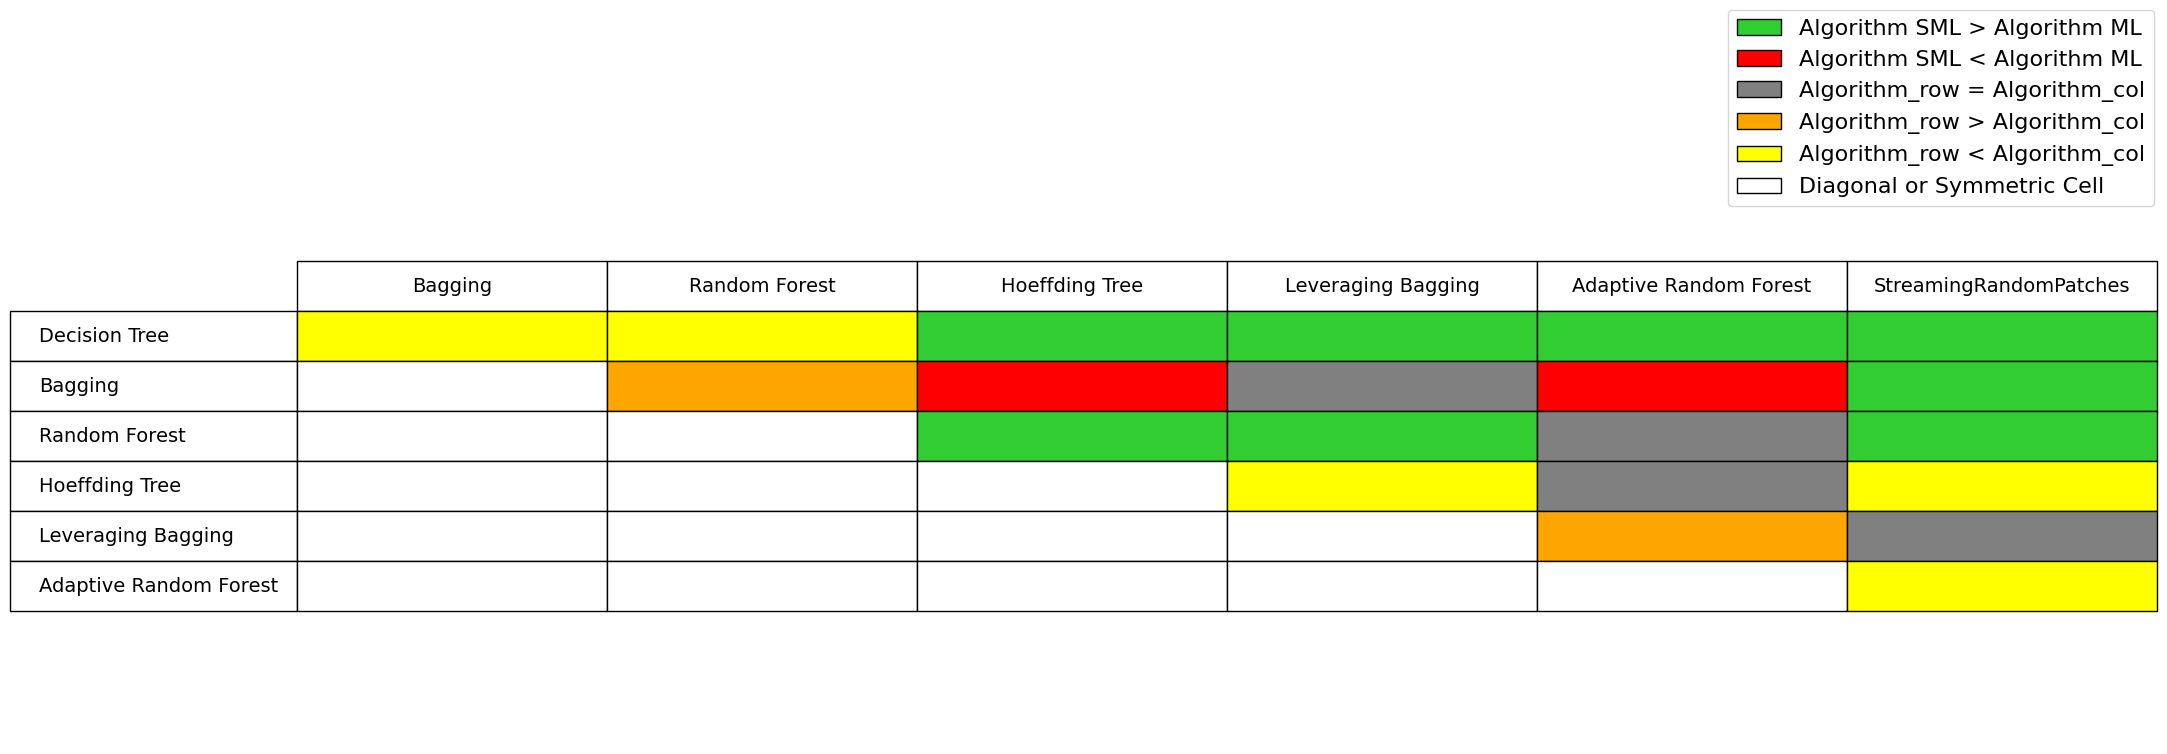

In [170]:
# Create the list of algorithms as 'x' and 'y' labels
algorithms_row = [
    "Decision Tree",
    "Bagging",
    "Random Forest",
    "Hoeffding Tree",
    "Leveraging Bagging",
    "Adaptive Random Forest"
]

algorithms_col = [
    "Bagging",
    "Random Forest",
    "Hoeffding Tree",
    "Leveraging Bagging",
    "Adaptive Random Forest",
    "StreamingRandomPatches"
]

# Create an empty dataframe for the table
df_table = pd.DataFrame(index=algorithms_row, columns=algorithms_col)

# Load the color data from the CSV file
df_colors = pd.read_csv('data/color_accuracy_tot.csv')

# Iterate over the rows of the color dataframe and fill the table
for _, row in df_colors.iterrows():
    algorithm_row = row['Algorithm_row']
    algorithm_col = row['Algorithm_col']
    color = row['Color']
    df_table.loc[algorithm_row, algorithm_col] = color

# Fill remaining cells with white color
df_table.fillna('white', inplace=True)

# Display the table with only colors
plt.figure(figsize=(8, 8))
plt.axis('off')
table = plt.table(cellText=[[''] * len(df_table.columns)] * len(df_table.index),  # Empty cellText
                  colLabels=df_table.columns,
                  rowLabels=df_table.index,
                  cellColours=df_table.values,
                  loc='center')
table.scale(3, 3)  # Increase cell size

# Increase the font size of the column and index labels
table.set_fontsize(21)

# Define color patches for the legend
legend_patches = [
    mpatches.Patch(color='limegreen', label='Algorithm SML > Algorithm ML'),
    mpatches.Patch(color='red', label='Algorithm SML < Algorithm ML'),
    mpatches.Patch(color='grey', label='Algorithm_row = Algorithm_col'),
    mpatches.Patch(color='orange', label='Algorithm_row > Algorithm_col'),
    mpatches.Patch(color='yellow', label='Algorithm_row < Algorithm_col'),
    mpatches.Patch(color='white', label='Diagonal or Symmetric Cell'),
]

# Set black borders for all patches
for patch in legend_patches:
    patch.set_edgecolor('black')

# Create the legend and display it on the top right corner
plt.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1.29, 1.21), fontsize=16)

# Save the table as an image
plt.savefig('data/color_accuracy_tot.png', bbox_inches='tight', pad_inches=1.0)

plt.show()

## T-test on Geometric Mean

In [26]:
# Create an empty dataframe
color_gmean_df = pd.DataFrame(columns=['Algorithm_row', 'Algorithm_col', 'Color'])
color = ''

In [27]:
print("\033[1mGeometric Mean:\033[0m Decision Tree vs Hoeffding Tree")
print()
a = (0.79, 0.80, 0.79, 0.78, 0.80, 0.79, 0.79, 0.80, 0.79, 0.80)  # DT
b = (0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (DT).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (HT). Algorithm a (DT) is better than algorithm b (HT).")
        color = 'red'
else:
    print("The means of group a (DT) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Decision Tree vs Hoeffding Tree

Levene's test p-value: 0.007685412140314316
The variances of group a (DT) and group b (HT) are significantly different.

T-test two-sided p-value: 3.191925891292331e-08
The means of group a (DT) and group b (HT) are significantly different.

T-test less p-value:  1.5959629456461654e-08
The mean of group a (DT) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (DT).


C:\Users\Amministratore\AppData\Local\Temp\ipykernel_4852\411085165.py:24: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')
C:\Users\Amministratore\AppData\Local\Temp\ipykernel_4852\411085165.py:35: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')


In [28]:
print("\033[1mGeometric Mean:\033[0m Decision Tree vs Leveraging Bagging")
print()
a = (0.79, 0.80, 0.79, 0.78, 0.80, 0.79, 0.79, 0.80, 0.79, 0.80)  # DT
b = (0.84, 0.85, 0.84, 0.85, 0.84, 0.85, 0.85, 0.86, 0.85, 0.86)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (DT).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (LB). Algorithm a (DT) is better than algorithm b (LB).")
        color = 'red'
else:
    print("The means of group a (DT) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Decision Tree vs Leveraging Bagging

Levene's test p-value: 1.0
The variances of group a (DT) and group b (LB) are not significantly different.

T-test two-sided p-value: 7.781756030600247e-13
The means of group a (DT) and group b (LB) are significantly different.

T-test less p-value:  3.8908780153001236e-13
The mean of group a (DT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (DT).


In [29]:
print("\033[1mGeometric Mean:\033[0m Decision Tree vs Adaptive Random Forest")
print()
a = (0.79, 0.80, 0.79, 0.78, 0.80, 0.79, 0.79, 0.80, 0.79, 0.80)  # DT
b = (0.81, 0.85, 0.84, 0.83, 0.82, 0.84, 0.82, 0.83, 0.83, 0.82)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (DT).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (ARF). Algorithm a (DT) is better than algorithm b (ARF).")
        color = 'red'
else:
    print("The means of group a (DT) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Decision Tree vs Adaptive Random Forest

Levene's test p-value: 0.18000074963498358
The variances of group a (DT) and group b (ARF) are not significantly different.

T-test two-sided p-value: 1.4879426616615627e-07
The means of group a (DT) and group b (ARF) are significantly different.

T-test less p-value:  7.439713308307814e-08
The mean of group a (DT) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (DT).


In [30]:
print("\033[1mGeometric Mean:\033[0m Decision Tree vs StreamingRandomPatches")
print()
a = (0.79, 0.80, 0.79, 0.78, 0.80, 0.79, 0.79, 0.80, 0.79, 0.80)  # DT
b = (0.86, 0.85, 0.84, 0.85, 0.87, 0.86, 0.85, 0.86, 0.86, 0.85)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (DT).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (SRP). Algorithm a (DT) is better than algorithm b (SRP).")
        color = 'red'
else:
    print("The means of group a (DT) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Decision Tree vs StreamingRandomPatches

Levene's test p-value: 0.3611400805717869
The variances of group a (DT) and group b (SRP) are not significantly different.

T-test two-sided p-value: 5.532013563693441e-13
The means of group a (DT) and group b (SRP) are significantly different.

T-test less p-value:  2.7660067818467205e-13
The mean of group a (DT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (DT).


In [31]:
print("\033[1mGeometric Mean:\033[0m Decision Tree vs Bagging")
print()
a = (0.79, 0.80, 0.79, 0.78, 0.80, 0.79, 0.79, 0.80, 0.79, 0.80)  # DT
b = (0.83, 0.83, 0.84, 0.84, 0.82, 0.83, 0.84, 0.84, 0.85, 0.84)  # B

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (B) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (B) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (B) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (B). Algorithm b (B) is better than algorithm a (DT).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (B). Algorithm a (DT) is better than algorithm b (B).")
        color = 'orange'
else:
    print("The means of group a (DT) and group b (B) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Decision Tree vs Bagging

Levene's test p-value: 0.7221858255539939
The variances of group a (DT) and group b (B) are not significantly different.

T-test two-sided p-value: 2.3241574006357525e-10
The means of group a (DT) and group b (B) are significantly different.

T-test less p-value:  1.1620787003178762e-10
The mean of group a (DT) is significantly less than the mean of group b (B). Algorithm b (B) is better than algorithm a (DT).


In [32]:
print("\033[1mGeometric Mean:\033[0m Decision Tree vs Random Forest")
print()
a = (0.79, 0.80, 0.79, 0.78, 0.80, 0.79, 0.79, 0.80, 0.79, 0.80)  # DT
b = (0.81, 0.81, 0.79, 0.83, 0.83, 0.81, 0.81, 0.78, 0.81, 0.81)  # RF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (RF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (RF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (RF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (RF). Algorithm b (RF) is better than algorithm a (DT).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (RF). Algorithm a (DT) is better than algorithm b (RF).")
        color = 'orange'
else:
    print("The means of group a (DT) and group b (RF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Decision Tree vs Random Forest

Levene's test p-value: 0.3463641449203775
The variances of group a (DT) and group b (RF) are not significantly different.

T-test two-sided p-value: 0.00710938755997643
The means of group a (DT) and group b (RF) are significantly different.

T-test less p-value:  0.003554693779988215
The mean of group a (DT) is significantly less than the mean of group b (RF). Algorithm b (RF) is better than algorithm a (DT).


In [33]:
print("\033[1mGeometric Mean:\033[0m Bagging vs Leveraging Bagging")
print()
a = (0.83, 0.83, 0.84, 0.84, 0.82, 0.83, 0.84, 0.84, 0.85, 0.84)  # B
b = (0.84, 0.85, 0.84, 0.85, 0.84, 0.85, 0.85, 0.86, 0.85, 0.86)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (B).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (LB). Algorithm a (B) is better than algorithm b (LB).")
        color = 'red'
else:
    print("The means of group a (B) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Bagging vs Leveraging Bagging

Levene's test p-value: 0.7221858255539939
The variances of group a (B) and group b (LB) are not significantly different.

T-test two-sided p-value: 0.0017565119857413096
The means of group a (B) and group b (LB) are significantly different.

T-test less p-value:  0.0008782559928706548
The mean of group a (B) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (B).


In [34]:
print("\033[1mGeometric Mean:\033[0m Bagging vs Hoeffding Tree")
print()
a = (0.83, 0.83, 0.84, 0.84, 0.82, 0.83, 0.84, 0.84, 0.85, 0.84)  # B
b = (0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (B).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (HT). Algorithm a (B) is better than algorithm b (HT).")
        color = 'red'
else:
    print("The means of group a (B) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Bagging vs Hoeffding Tree

Levene's test p-value: 0.014234208579582734
The variances of group a (B) and group b (HT) are significantly different.

T-test two-sided p-value: 0.05100326070694734
The means of group a (B) and group b (HT) are not significantly different.


C:\Users\Amministratore\AppData\Local\Temp\ipykernel_4852\3921073674.py:24: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')


In [35]:
print("\033[1mGeometric Mean:\033[0m Bagging vs Adaptive Random Forest")
print()
a = (0.83, 0.83, 0.84, 0.84, 0.82, 0.83, 0.84, 0.84, 0.85, 0.84)  # B
b = (0.81, 0.85, 0.84, 0.83, 0.82, 0.84, 0.82, 0.83, 0.83, 0.82)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (B).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (ARF). Algorithm a (B) is better than algorithm b (ARF).")
        color = 'red'
else:
    print("The means of group a (B) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Bagging vs Adaptive Random Forest

Levene's test p-value: 0.36303839487522516
The variances of group a (B) and group b (ARF) are not significantly different.

T-test two-sided p-value: 0.14798999874773663
The means of group a (B) and group b (ARF) are not significantly different.


In [36]:
print("\033[1mGeometric Mean:\033[0m Bagging vs StreamingRandomPatches")
print()
a = (0.83, 0.83, 0.84, 0.84, 0.82, 0.83, 0.84, 0.84, 0.85, 0.84)  # B
b = (0.86, 0.85, 0.84, 0.85, 0.87, 0.86, 0.85, 0.86, 0.86, 0.85)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (B).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (SRP). Algorithm a (B) is better than algorithm b (SRP).")
        color = 'red'
else:
    print("The means of group a (B) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Bagging vs StreamingRandomPatches

Levene's test p-value: 0.7030766072336114
The variances of group a (B) and group b (SRP) are not significantly different.

T-test two-sided p-value: 8.918557141429986e-05
The means of group a (B) and group b (SRP) are significantly different.

T-test less p-value:  4.459278570714993e-05
The mean of group a (B) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (B).


In [37]:
print("\033[1mGeometric Mean:\033[0m Bagging vs Random Forest")
print()
a = (0.83, 0.83, 0.84, 0.84, 0.82, 0.83, 0.84, 0.84, 0.85, 0.84)  # B
b = (0.81, 0.81, 0.79, 0.83, 0.83, 0.81, 0.81, 0.78, 0.81, 0.81)  # RF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (RF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (RF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (RF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (RF). Algorithm b (RF) is better than algorithm a (B).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (RF). Algorithm a (B) is better than algorithm b (RF).")
        color = 'orange'
else:
    print("The means of group a (B) and group b (RF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Bagging vs Random Forest

Levene's test p-value: 0.5025281656718266
The variances of group a (B) and group b (RF) are not significantly different.

T-test two-sided p-value: 0.0001147440682289561
The means of group a (B) and group b (RF) are significantly different.

T-test less p-value:  0.9999426279658855
The mean of group a (B) is not significantly less than the mean of group b (RF). Algorithm a (B) is better than algorithm b (RF).


In [38]:
print("\033[1mGeometric Mean:\033[0m Random Forest vs Adaptive Random Forest")
print()
a = (0.81, 0.81, 0.79, 0.83, 0.83, 0.81, 0.81, 0.78, 0.81, 0.81)  # RF
b = (0.81, 0.85, 0.84, 0.83, 0.82, 0.84, 0.82, 0.83, 0.83, 0.82)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (RF) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (RF).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (RF) is not significantly less than the mean of group b (ARF). Algorithm a (RF) is better than algorithm b (ARF).")
        color = 'red'
else:
    print("The means of group a (RF) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Random Forest vs Adaptive Random Forest

Levene's test p-value: 1.0
The variances of group a (RF) and group b (ARF) are not significantly different.

T-test two-sided p-value: 0.004314446523851991
The means of group a (RF) and group b (ARF) are significantly different.

T-test less p-value:  0.0021572232619259954
The mean of group a (RF) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (RF).


In [39]:
print("\033[1mGeometric Mean:\033[0m Random Forest vs Hoeffding Tree")
print()
a = (0.81, 0.81, 0.79, 0.83, 0.83, 0.81, 0.81, 0.78, 0.81, 0.81)  # RF
b = (0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (RF) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (RF).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (RF) is not significantly less than the mean of group b (HT). Algorithm a (RF) is better than algorithm b (HT).")
        color = 'red'
else:
    print("The means of group a (RF) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Random Forest vs Hoeffding Tree

Levene's test p-value: 0.028737783493709847
The variances of group a (RF) and group b (HT) are significantly different.

T-test two-sided p-value: 0.0018293201940002082
The means of group a (RF) and group b (HT) are significantly different.

T-test less p-value:  0.0009146600970001041
The mean of group a (RF) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (RF).


C:\Users\Amministratore\AppData\Local\Temp\ipykernel_4852\390200088.py:24: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')
C:\Users\Amministratore\AppData\Local\Temp\ipykernel_4852\390200088.py:35: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')


In [40]:
print("\033[1mGeometric Mean:\033[0m Random Forest vs Leveraging Bagging")
print()
a = (0.81, 0.81, 0.79, 0.83, 0.83, 0.81, 0.81, 0.78, 0.81, 0.81)  # RF
b = (0.84, 0.85, 0.84, 0.85, 0.84, 0.85, 0.85, 0.86, 0.85, 0.86)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (RF) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (RF).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (RF) is not significantly less than the mean of group b (LB). Algorithm a (RF) is better than algorithm b (LB).")
        color = 'red'
else:
    print("The means of group a (RF) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Random Forest vs Leveraging Bagging

Levene's test p-value: 0.3463641449203775
The variances of group a (RF) and group b (LB) are not significantly different.

T-test two-sided p-value: 6.403430337524328e-07
The means of group a (RF) and group b (LB) are significantly different.

T-test less p-value:  3.201715168762164e-07
The mean of group a (RF) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (RF).


In [41]:
print("\033[1mGeometric Mean:\033[0m Random Forest vs StreamingRandomPatches")
print()
a = (0.81, 0.81, 0.79, 0.83, 0.83, 0.81, 0.81, 0.78, 0.81, 0.81)  # RF
b = (0.86, 0.85, 0.84, 0.85, 0.87, 0.86, 0.85, 0.86, 0.86, 0.85)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (RF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (RF).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (RF) is not significantly less than the mean of group b (SRP). Algorithm a (RF) is better than algorithm b (SRP).")
        color = 'red'
else:
    print("The means of group a (RF) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Random Forest vs StreamingRandomPatches

Levene's test p-value: 0.6243251280950284
The variances of group a (RF) and group b (SRP) are not significantly different.

T-test two-sided p-value: 1.355289181768664e-07
The means of group a (RF) and group b (SRP) are significantly different.

T-test less p-value:  6.77644590884332e-08
The mean of group a (RF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (RF).


In [42]:
print("\033[1mGeometric Mean:\033[0m Hoeffding Tree vs Leveraging Bagging")
print()
a = (0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83)  # HT
b = (0.84, 0.85, 0.84, 0.85, 0.84, 0.85, 0.85, 0.86, 0.85, 0.86)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (HT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (HT).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (HT) is not significantly less than the mean of group b (LB). Algorithm a (HT) is better than algorithm b (LB).")
        color = 'orange'
else:
    print("The means of group a (HT) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Hoeffding Tree vs Leveraging Bagging

Levene's test p-value: 0.007685412140314316
The variances of group a (HT) and group b (LB) are significantly different.

T-test two-sided p-value: 1.9210701082274307e-05
The means of group a (HT) and group b (LB) are significantly different.

T-test less p-value:  9.605350541137154e-06
The mean of group a (HT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (HT).


C:\Users\Amministratore\AppData\Local\Temp\ipykernel_4852\4096202556.py:24: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')
C:\Users\Amministratore\AppData\Local\Temp\ipykernel_4852\4096202556.py:35: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')


In [43]:
print("\033[1mGeometric Mean:\033[0m Hoeffding Tree vs Adaptive Random Forest")
print()
a = (0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83)  # HT
b = (0.81, 0.85, 0.84, 0.83, 0.82, 0.84, 0.82, 0.83, 0.83, 0.82)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (HT) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (HT).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (HT) is not significantly less than the mean of group b (ARF). Algorithm a (HT) is better than algorithm b (ARF).")
        color = 'orange'
else:
    print("The means of group a (HT) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Hoeffding Tree vs Adaptive Random Forest

Levene's test p-value: 0.0011545867363215133
The variances of group a (HT) and group b (ARF) are significantly different.

T-test two-sided p-value: 0.7976245209721243
The means of group a (HT) and group b (ARF) are not significantly different.


C:\Users\Amministratore\AppData\Local\Temp\ipykernel_4852\1906000432.py:24: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')


In [44]:
print("\033[1mGeometric Mean:\033[0m Hoeffding Tree vs StreamingRandomPatches")
print()
a = (0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83, 0.83)  # HT
b = (0.86, 0.85, 0.84, 0.85, 0.87, 0.86, 0.85, 0.86, 0.86, 0.85)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (HT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (HT).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (HT) is not significantly less than the mean of group b (SRP). Algorithm a (HT) is better than algorithm b (SRP).")
        color = 'orange'
else:
    print("The means of group a (HT) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Hoeffding Tree vs StreamingRandomPatches

Levene's test p-value: 5.421739826388528e-05
The variances of group a (HT) and group b (SRP) are significantly different.

T-test two-sided p-value: 6.509143540491868e-06
The means of group a (HT) and group b (SRP) are significantly different.

T-test less p-value:  3.254571770245934e-06
The mean of group a (HT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (HT).


C:\Users\Amministratore\AppData\Local\Temp\ipykernel_4852\1551856347.py:24: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')
C:\Users\Amministratore\AppData\Local\Temp\ipykernel_4852\1551856347.py:35: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')


In [45]:
print("\033[1mGeometric Mean:\033[0m Leveraging Bagging vs Adaptive Random Forest")
print()
a = (0.84, 0.85, 0.84, 0.85, 0.84, 0.85, 0.85, 0.86, 0.85, 0.86)  # LB
b = (0.81, 0.85, 0.84, 0.83, 0.82, 0.84, 0.82, 0.83, 0.83, 0.82)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (LB) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (LB) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (LB) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (LB) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (LB).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (LB) is not significantly less than the mean of group b (ARF). Algorithm a (LB) is better than algorithm b (ARF).")
        color = 'orange'
else:
    print("The means of group a (LB) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Leveraging Bagging'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Leveraging Bagging vs Adaptive Random Forest

Levene's test p-value: 0.18000074963498358
The variances of group a (LB) and group b (ARF) are not significantly different.

T-test two-sided p-value: 0.0002787214667830979
The means of group a (LB) and group b (ARF) are significantly different.

T-test less p-value:  0.9998606392666085
The mean of group a (LB) is not significantly less than the mean of group b (ARF). Algorithm a (LB) is better than algorithm b (ARF).


In [46]:
print("\033[1mGeometric Mean:\033[0m Leveraging Bagging vs StreamingRandomPatches")
print()
a = (0.84, 0.85, 0.84, 0.85, 0.84, 0.85, 0.85, 0.86, 0.85, 0.86)  # LB
b = (0.86, 0.85, 0.84, 0.85, 0.87, 0.86, 0.85, 0.86, 0.86, 0.85)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (LB) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (LB) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (LB) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (LB) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (LB).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (LB) is not significantly less than the mean of group b (SRP). Algorithm a (LB) is better than algorithm b (SRP).")
        color = 'orange'
else:
    print("The means of group a (LB) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Leveraging Bagging'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Leveraging Bagging vs StreamingRandomPatches

Levene's test p-value: 0.3611400805717869
The variances of group a (LB) and group b (SRP) are not significantly different.

T-test two-sided p-value: 0.10908001441470169
The means of group a (LB) and group b (SRP) are not significantly different.


In [47]:
print("\033[1mGeometric Mean:\033[0m Adaptive Random Forest vs StreamingRandomPatches")
print()
a = (0.81, 0.85, 0.84, 0.83, 0.82, 0.84, 0.82, 0.83, 0.83, 0.82)  # ARF
b = (0.86, 0.85, 0.84, 0.85, 0.87, 0.86, 0.85, 0.86, 0.86, 0.85)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (ARF) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (ARF) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (ARF) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (ARF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (ARF).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (ARF) is not significantly less than the mean of group b (SRP). Algorithm a (ARF) is better than algorithm b (SRP).")
        color = 'orange'
else:
    print("The means of group a (ARF) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Adaptive Random Forest'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_gmean_df = pd.concat([color_gmean_df, new_row], ignore_index=True)

Geometric Mean: Adaptive Random Forest vs StreamingRandomPatches

Levene's test p-value: 0.4663555996259222
The variances of group a (ARF) and group b (SRP) are not significantly different.

T-test two-sided p-value: 2.5824776362806808e-05
The means of group a (ARF) and group b (SRP) are significantly different.

T-test less p-value:  1.2912388181403404e-05
The mean of group a (ARF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (ARF).


In [48]:
# Save the dataframe to a CSV file
color_gmean_df.to_csv('data/color_gmean_tot.csv', index=False)

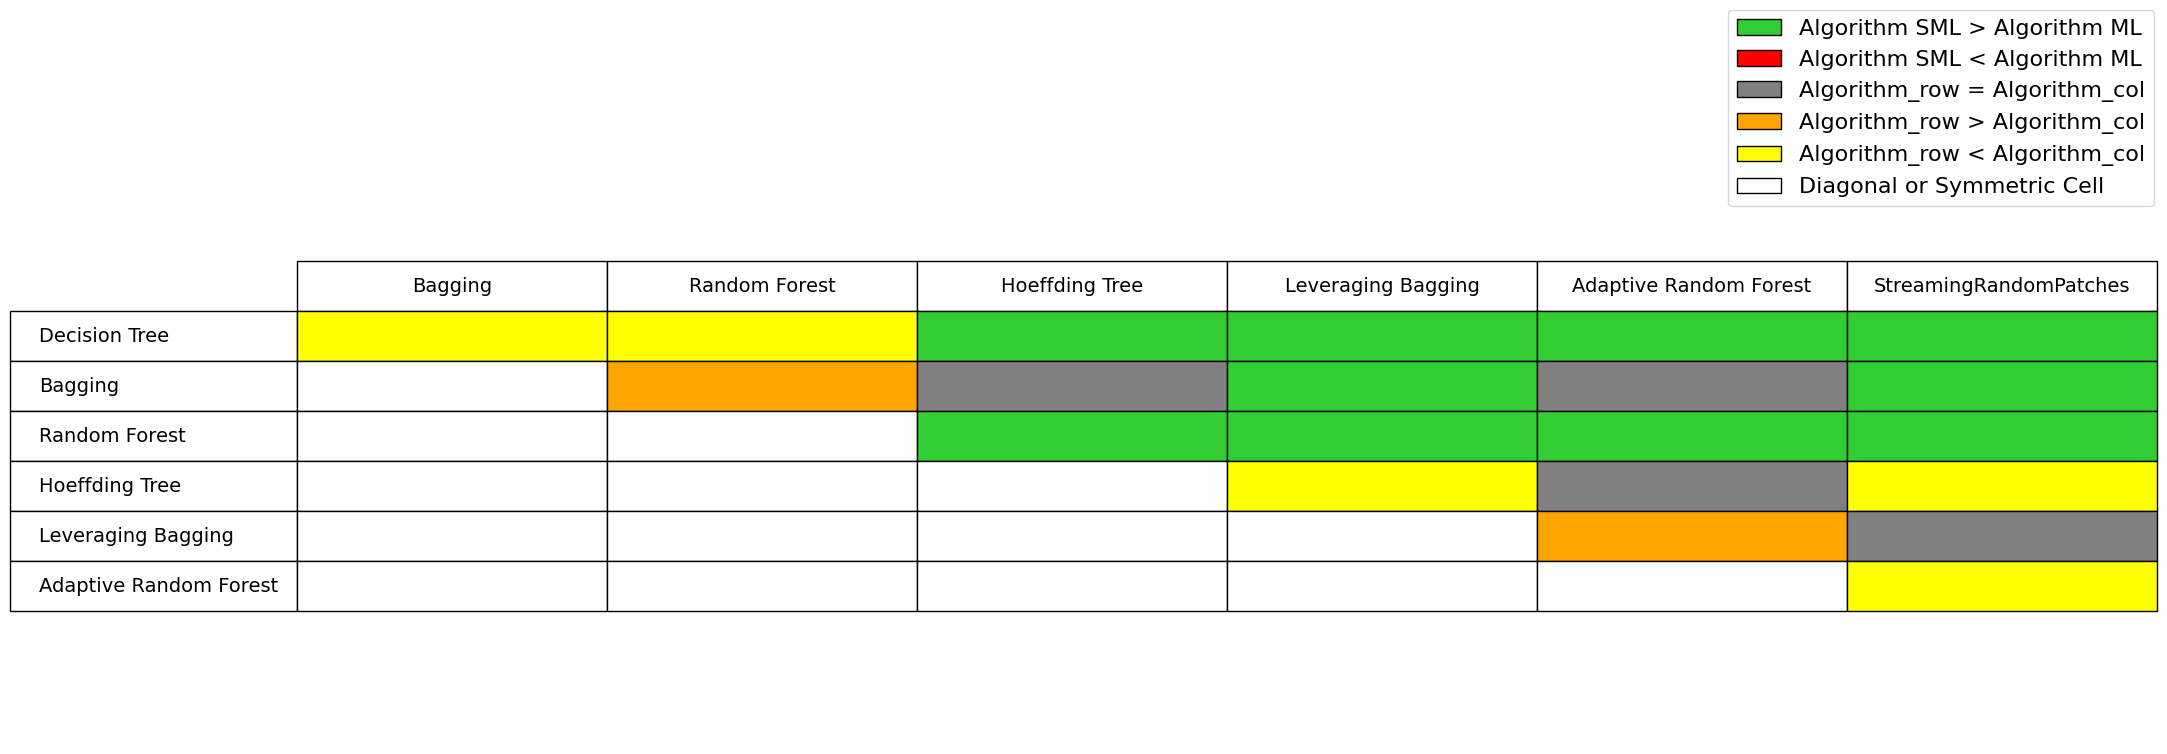

In [171]:
# Create the list of algorithms as 'x' and 'y' labels
algorithms_row = [
    "Decision Tree",
    "Bagging",
    "Random Forest",
    "Hoeffding Tree",
    "Leveraging Bagging",
    "Adaptive Random Forest"
]

algorithms_col = [
    "Bagging",
    "Random Forest",
    "Hoeffding Tree",
    "Leveraging Bagging",
    "Adaptive Random Forest",
    "StreamingRandomPatches"
]

# Create an empty dataframe for the table
df_table = pd.DataFrame(index=algorithms_row, columns=algorithms_col)

# Load the color data from the CSV file
df_colors = pd.read_csv('data/color_gmean_tot.csv')

# Iterate over the rows of the color dataframe and fill the table
for _, row in df_colors.iterrows():
    algorithm_row = row['Algorithm_row']
    algorithm_col = row['Algorithm_col']
    color = row['Color']
    df_table.loc[algorithm_row, algorithm_col] = color

# Fill remaining cells with white color
df_table.fillna('white', inplace=True)

# Display the table with only colors
plt.figure(figsize=(8, 8))
plt.axis('off')
table = plt.table(cellText=[[''] * len(df_table.columns)] * len(df_table.index),  # Empty cellText
                  colLabels=df_table.columns,
                  rowLabels=df_table.index,
                  cellColours=df_table.values,
                  loc='center')
table.scale(3, 3)  # Increase cell size

# Increase the font size of the column and index labels
table.set_fontsize(21)

# Define color patches for the legend
legend_patches = [
    mpatches.Patch(color='limegreen', label='Algorithm SML > Algorithm ML'),
    mpatches.Patch(color='red', label='Algorithm SML < Algorithm ML'),
    mpatches.Patch(color='grey', label='Algorithm_row = Algorithm_col'),
    mpatches.Patch(color='orange', label='Algorithm_row > Algorithm_col'),
    mpatches.Patch(color='yellow', label='Algorithm_row < Algorithm_col'),
    mpatches.Patch(color='white', label='Diagonal or Symmetric Cell'),
]

# Set black borders for all patches
for patch in legend_patches:
    patch.set_edgecolor('black')

# Create the legend and display it on the top right corner
plt.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1.29, 1.21), fontsize=16)

# Save the table as an image
plt.savefig('data/color_gmean_tot.png', bbox_inches='tight', pad_inches=1.0)

plt.show()

## T-test on Cohen's Kappa

In [50]:
# Create an empty dataframe
color_cohen_df = pd.DataFrame(columns=['Algorithm_row', 'Algorithm_col', 'Color'])
color = ''

In [51]:
print("\033[1mCohen's Kappa:\033[0m Decision Tree vs Hoeffding Tree")
print()
a = (0.60, 0.62, 0.60, 0.59, 0.61, 0.60, 0.60, 0.62, 0.60, 0.62)  # DT
b = (0.66, 0.67, 0.66, 0.67, 0.67, 0.67, 0.66, 0.66, 0.66, 0.67)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (DT).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (HT). Algorithm a (DT) is better than algorithm b (HT).")
        color = 'red'
else:
    print("The means of group a (DT) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Decision Tree vs Hoeffding Tree

Levene's test p-value: 0.3155709508581233
The variances of group a (DT) and group b (HT) are not significantly different.

T-test two-sided p-value: 6.791764023838251e-12
The means of group a (DT) and group b (HT) are significantly different.

T-test less p-value:  3.3958820119191256e-12
The mean of group a (DT) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (DT).


In [52]:
print("\033[1mCohen's Kappa:\033[0m Decision Tree vs Leveraging Bagging")
print()
a = (0.60, 0.62, 0.60, 0.59, 0.61, 0.60, 0.60, 0.62, 0.60, 0.62)  # DT
b = (0.67, 0.70, 0.69, 0.70, 0.69, 0.70, 0.70, 0.71, 0.70, 0.71)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (DT).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (LB). Algorithm a (DT) is better than algorithm b (LB).")
        color = 'red'
else:
    print("The means of group a (DT) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Decision Tree vs Leveraging Bagging

Levene's test p-value: 0.8134803248504718
The variances of group a (DT) and group b (LB) are not significantly different.

T-test two-sided p-value: 4.874492682469984e-13
The means of group a (DT) and group b (LB) are significantly different.

T-test less p-value:  2.437246341234992e-13
The mean of group a (DT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (DT).


In [53]:
print("\033[1mCohen's Kappa:\033[0m Decision Tree vs Adaptive Random Forest")
print()
a = (0.60, 0.62, 0.60, 0.59, 0.61, 0.60, 0.60, 0.62, 0.60, 0.62)  # DT
b = (0.63, 0.69, 0.68, 0.67, 0.64, 0.69, 0.65, 0.67, 0.66, 0.64)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (DT).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (ARF). Algorithm a (DT) is better than algorithm b (ARF).")
        color = 'red'
else:
    print("The means of group a (DT) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Decision Tree vs Adaptive Random Forest

Levene's test p-value: 0.03682793706910515
The variances of group a (DT) and group b (ARF) are significantly different.

T-test two-sided p-value: 4.904178324579578e-06
The means of group a (DT) and group b (ARF) are significantly different.

T-test less p-value:  2.452089162289789e-06
The mean of group a (DT) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (DT).


In [54]:
print("\033[1mCohen's Kappa:\033[0m Decision Tree vs StreamingRandomPatches")
print()
a = (0.60, 0.62, 0.60, 0.59, 0.61, 0.60, 0.60, 0.62, 0.60, 0.62)  # DT
b = (0.72, 0.70, 0.68, 0.70, 0.73, 0.72, 0.71, 0.72, 0.71, 0.71)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (DT).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (SRP). Algorithm a (DT) is better than algorithm b (SRP).")
        color = 'red'
else:
    print("The means of group a (DT) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Decision Tree vs StreamingRandomPatches

Levene's test p-value: 0.6367404451255416
The variances of group a (DT) and group b (SRP) are not significantly different.

T-test two-sided p-value: 3.6369424566126166e-13
The means of group a (DT) and group b (SRP) are significantly different.

T-test less p-value:  1.8184712283063083e-13
The mean of group a (DT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (DT).


In [55]:
print("\033[1mCohen's Kappa:\033[0m Decision Tree vs Bagging")
print()
a = (0.60, 0.62, 0.60, 0.59, 0.61, 0.60, 0.60, 0.62, 0.60, 0.62)  # DT
b = (0.68, 0.68, 0.70, 0.69, 0.66, 0.68, 0.70, 0.69, 0.71, 0.70)  # B

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (B) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (B) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (B) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (B). Algorithm b (B) is better than algorithm a (DT).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (B). Algorithm a (DT) is better than algorithm b (B).")
        color = 'orange'
else:
    print("The means of group a (DT) and group b (B) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Decision Tree vs Bagging

Levene's test p-value: 0.46446925583920173
The variances of group a (DT) and group b (B) are not significantly different.

T-test two-sided p-value: 2.151544791887996e-11
The means of group a (DT) and group b (B) are significantly different.

T-test less p-value:  1.075772395943998e-11
The mean of group a (DT) is significantly less than the mean of group b (B). Algorithm b (B) is better than algorithm a (DT).


In [56]:
print("\033[1mCohen's Kappa:\033[0m Decision Tree vs Random Forest")
print()
a = (0.60, 0.62, 0.60, 0.59, 0.61, 0.60, 0.60, 0.62, 0.60, 0.62)  # DT
b = (0.64, 0.64, 0.61, 0.68, 0.67, 0.64, 0.63, 0.60, 0.65, 0.63)  # RF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (RF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (RF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (RF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (RF). Algorithm b (RF) is better than algorithm a (DT).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (RF). Algorithm a (DT) is better than algorithm b (RF).")
        color = 'orange'
else:
    print("The means of group a (DT) and group b (RF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Decision Tree vs Random Forest

Levene's test p-value: 0.14676592731526214
The variances of group a (DT) and group b (RF) are not significantly different.

T-test two-sided p-value: 0.0009709059879031595
The means of group a (DT) and group b (RF) are significantly different.

T-test less p-value:  0.0004854529939515798
The mean of group a (DT) is significantly less than the mean of group b (RF). Algorithm b (RF) is better than algorithm a (DT).


In [57]:
print("\033[1mCohen's Kappa:\033[0m Bagging vs Leveraging Bagging")
print()
a = (0.68, 0.68, 0.70, 0.69, 0.66, 0.68, 0.70, 0.69, 0.71, 0.70)  # B
b = (0.67, 0.70, 0.69, 0.70, 0.69, 0.70, 0.70, 0.71, 0.70, 0.71)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (B).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (LB). Algorithm a (B) is better than algorithm b (LB).")
        color = 'red'
else:
    print("The means of group a (B) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Bagging vs Leveraging Bagging

Levene's test p-value: 0.34017327396915636
The variances of group a (B) and group b (LB) are not significantly different.

T-test two-sided p-value: 0.18965771467270837
The means of group a (B) and group b (LB) are not significantly different.


In [58]:
print("\033[1mCohen's Kappa:\033[0m Bagging vs Hoeffding Tree")
print()
a = (0.68, 0.68, 0.70, 0.69, 0.66, 0.68, 0.70, 0.69, 0.71, 0.70)  # B
b = (0.66, 0.67, 0.66, 0.67, 0.67, 0.67, 0.66, 0.66, 0.66, 0.67)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (B).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (HT). Algorithm a (B) is better than algorithm b (HT).")
        color = 'red'
else:
    print("The means of group a (B) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Bagging vs Hoeffding Tree

Levene's test p-value: 0.04389973789357174
The variances of group a (B) and group b (HT) are significantly different.

T-test two-sided p-value: 0.0004165044505050718
The means of group a (B) and group b (HT) are significantly different.

T-test less p-value:  0.9997917477747474
The mean of group a (B) is not significantly less than the mean of group b (HT). Algorithm a (B) is better than algorithm b (HT).


In [59]:
print("\033[1mCohen's Kappa:\033[0m Bagging vs Adaptive Random Forest")
print()
a = (0.68, 0.68, 0.70, 0.69, 0.66, 0.68, 0.70, 0.69, 0.71, 0.70)  # B
b = (0.63, 0.69, 0.68, 0.67, 0.64, 0.69, 0.65, 0.67, 0.66, 0.64)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (B).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (ARF). Algorithm a (B) is better than algorithm b (ARF).")
        color = 'red'
else:
    print("The means of group a (B) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Bagging vs Adaptive Random Forest

Levene's test p-value: 0.12465757155911393
The variances of group a (B) and group b (ARF) are not significantly different.

T-test two-sided p-value: 0.004042238382687158
The means of group a (B) and group b (ARF) are significantly different.

T-test less p-value:  0.9979788808086565
The mean of group a (B) is not significantly less than the mean of group b (ARF). Algorithm a (B) is better than algorithm b (ARF).


In [60]:
print("\033[1mCohen's Kappa:\033[0m Bagging vs StreamingRandomPatches")
print()
a = (0.68, 0.68, 0.70, 0.69, 0.66, 0.68, 0.70, 0.69, 0.71, 0.70)  # B
b = (0.72, 0.70, 0.68, 0.70, 0.73, 0.72, 0.71, 0.72, 0.71, 0.71)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (B).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (SRP). Algorithm a (B) is better than algorithm b (SRP).")
        color = 'red'
else:
    print("The means of group a (B) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Bagging vs StreamingRandomPatches

Levene's test p-value: 0.8086411384933039
The variances of group a (B) and group b (SRP) are not significantly different.

T-test two-sided p-value: 0.004164161401614012
The means of group a (B) and group b (SRP) are significantly different.

T-test less p-value:  0.002082080700807006
The mean of group a (B) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (B).


In [61]:
print("\033[1mCohen's Kappa:\033[0m Bagging vs Random Forest")
print()
a = (0.68, 0.68, 0.70, 0.69, 0.66, 0.68, 0.70, 0.69, 0.71, 0.70)  # B
b = (0.64, 0.64, 0.61, 0.68, 0.67, 0.64, 0.63, 0.60, 0.65, 0.63)  # RF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (RF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (RF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (RF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (RF). Algorithm b (RF) is better than algorithm a (B).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (RF). Algorithm a (B) is better than algorithm b (RF).")
        color = 'orange'
else:
    print("The means of group a (B) and group b (RF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Bagging vs Random Forest

Levene's test p-value: 0.3201685380084575
The variances of group a (B) and group b (RF) are not significantly different.

T-test two-sided p-value: 2.5940090960280848e-05
The means of group a (B) and group b (RF) are significantly different.

T-test less p-value:  0.9999870299545198
The mean of group a (B) is not significantly less than the mean of group b (RF). Algorithm a (B) is better than algorithm b (RF).


In [62]:
print("\033[1mCohen's Kappa:\033[0m Random Forest vs Adaptive Random Forest")
print()
a = (0.64, 0.64, 0.61, 0.68, 0.67, 0.64, 0.63, 0.60, 0.65, 0.63)  # RF
b = (0.63, 0.69, 0.68, 0.67, 0.64, 0.69, 0.65, 0.67, 0.66, 0.64)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (RF) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (RF).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (RF) is not significantly less than the mean of group b (ARF). Algorithm a (RF) is better than algorithm b (ARF).")
        color = 'red'
else:
    print("The means of group a (RF) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Random Forest vs Adaptive Random Forest

Levene's test p-value: 0.8729386512988409
The variances of group a (RF) and group b (ARF) are not significantly different.

T-test two-sided p-value: 0.03760290661140226
The means of group a (RF) and group b (ARF) are significantly different.

T-test less p-value:  0.01880145330570113
The mean of group a (RF) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (RF).


In [63]:
print("\033[1mCohen's Kappa:\033[0m Random Forest vs Hoeffding Tree")
print()
a = (0.64, 0.64, 0.61, 0.68, 0.67, 0.64, 0.63, 0.60, 0.65, 0.63)  # RF
b = (0.66, 0.67, 0.66, 0.67, 0.67, 0.67, 0.66, 0.66, 0.66, 0.67)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (RF) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (RF).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (RF) is not significantly less than the mean of group b (HT). Algorithm a (RF) is better than algorithm b (HT).")
        color = 'red'
else:
    print("The means of group a (RF) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Random Forest vs Hoeffding Tree

Levene's test p-value: 0.03236019768826558
The variances of group a (RF) and group b (HT) are significantly different.

T-test two-sided p-value: 0.00798870225072862
The means of group a (RF) and group b (HT) are significantly different.

T-test less p-value:  0.00399435112536431
The mean of group a (RF) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (RF).


In [64]:
print("\033[1mCohen's Kappa:\033[0m Random Forest vs Leveraging Bagging")
print()
a = (0.64, 0.64, 0.61, 0.68, 0.67, 0.64, 0.63, 0.60, 0.65, 0.63)  # RF
b = (0.67, 0.70, 0.69, 0.70, 0.69, 0.70, 0.70, 0.71, 0.70, 0.71)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (RF) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (RF).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (RF) is not significantly less than the mean of group b (LB). Algorithm a (RF) is better than algorithm b (LB).")
        color = 'red'
else:
    print("The means of group a (RF) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Random Forest vs Leveraging Bagging

Levene's test p-value: 0.11184998527597019
The variances of group a (RF) and group b (LB) are not significantly different.

T-test two-sided p-value: 2.176876124859481e-06
The means of group a (RF) and group b (LB) are significantly different.

T-test less p-value:  1.0884380624297405e-06
The mean of group a (RF) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (RF).


In [65]:
print("\033[1mCohen's Kappa:\033[0m Random Forest vs StreamingRandomPatches")
print()
a = (0.64, 0.64, 0.61, 0.68, 0.67, 0.64, 0.63, 0.60, 0.65, 0.63)  # RF
b = (0.72, 0.70, 0.68, 0.70, 0.73, 0.72, 0.71, 0.72, 0.71, 0.71)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (RF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (RF).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (RF) is not significantly less than the mean of group b (SRP). Algorithm a (RF) is better than algorithm b (SRP).")
        color = 'red'
else:
    print("The means of group a (RF) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Random Forest vs StreamingRandomPatches

Levene's test p-value: 0.25643512356093556
The variances of group a (RF) and group b (SRP) are not significantly different.

T-test two-sided p-value: 2.453414333001917e-07
The means of group a (RF) and group b (SRP) are significantly different.

T-test less p-value:  1.2267071665009586e-07
The mean of group a (RF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (RF).


In [66]:
print("\033[1mCohen's Kappa:\033[0m Hoeffding Tree vs Leveraging Bagging")
print()
a = (0.66, 0.67, 0.66, 0.67, 0.67, 0.67, 0.66, 0.66, 0.66, 0.67)  # HT
b = (0.67, 0.70, 0.69, 0.70, 0.69, 0.70, 0.70, 0.71, 0.70, 0.71)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (HT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (HT).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (HT) is not significantly less than the mean of group b (LB). Algorithm a (HT) is better than algorithm b (LB).")
        color = 'orange'
else:
    print("The means of group a (HT) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Hoeffding Tree vs Leveraging Bagging

Levene's test p-value: 0.5134404793108902
The variances of group a (HT) and group b (LB) are not significantly different.

T-test two-sided p-value: 2.7032717945360965e-07
The means of group a (HT) and group b (LB) are significantly different.

T-test less p-value:  1.3516358972680482e-07
The mean of group a (HT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (HT).


In [67]:
print("\033[1mCohen's Kappa:\033[0m Hoeffding Tree vs Adaptive Random Forest")
print()
a = (0.66, 0.67, 0.66, 0.67, 0.67, 0.67, 0.66, 0.66, 0.66, 0.67)  # HT
b = (0.63, 0.69, 0.68, 0.67, 0.64, 0.69, 0.65, 0.67, 0.66, 0.64)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (HT) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (HT).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (HT) is not significantly less than the mean of group b (ARF). Algorithm a (HT) is better than algorithm b (ARF).")
        color = 'orange'
else:
    print("The means of group a (HT) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Hoeffding Tree vs Adaptive Random Forest

Levene's test p-value: 0.0010956704769788
The variances of group a (HT) and group b (ARF) are significantly different.

T-test two-sided p-value: 0.6772509486239751
The means of group a (HT) and group b (ARF) are not significantly different.


In [68]:
print("\033[1mCohen's Kappa:\033[0m Hoeffding Tree vs StreamingRandomPatches")
print()
a = (0.66, 0.67, 0.66, 0.67, 0.67, 0.67, 0.66, 0.66, 0.66, 0.67)  # HT
b = (0.72, 0.70, 0.68, 0.70, 0.73, 0.72, 0.71, 0.72, 0.71, 0.71)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (HT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (HT).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (HT) is not significantly less than the mean of group b (SRP). Algorithm a (HT) is better than algorithm b (SRP).")
        color = 'orange'
else:
    print("The means of group a (HT) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Hoeffding Tree vs StreamingRandomPatches

Levene's test p-value: 0.11081240891721317
The variances of group a (HT) and group b (SRP) are not significantly different.

T-test two-sided p-value: 2.1906588954605963e-08
The means of group a (HT) and group b (SRP) are significantly different.

T-test less p-value:  1.0953294477302981e-08
The mean of group a (HT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (HT).


In [69]:
print("\033[1mCohen's Kappa:\033[0m Leveraging Bagging vs Adaptive Random Forest")
print()
a = (0.67, 0.70, 0.69, 0.70, 0.69, 0.70, 0.70, 0.71, 0.70, 0.71)  # LB
b = (0.63, 0.69, 0.68, 0.67, 0.64, 0.69, 0.65, 0.67, 0.66, 0.64)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (LB) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (LB) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (LB) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (LB) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (LB).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (LB) is not significantly less than the mean of group b (ARF). Algorithm a (LB) is better than algorithm b (ARF).")
        color = 'orange'
else:
    print("The means of group a (LB) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Leveraging Bagging'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Leveraging Bagging vs Adaptive Random Forest

Levene's test p-value: 0.024942402827282148
The variances of group a (LB) and group b (ARF) are significantly different.

T-test two-sided p-value: 0.0004848816114288884
The means of group a (LB) and group b (ARF) are significantly different.

T-test less p-value:  0.9997575591942855
The mean of group a (LB) is not significantly less than the mean of group b (ARF). Algorithm a (LB) is better than algorithm b (ARF).


In [70]:
print("\033[1mCohen's Kappa:\033[0m Leveraging Bagging vs StreamingRandomPatches")
print()
a = (0.67, 0.70, 0.69, 0.70, 0.69, 0.70, 0.70, 0.71, 0.70, 0.71)  # LB
b = (0.72, 0.70, 0.68, 0.70, 0.73, 0.72, 0.71, 0.72, 0.71, 0.71)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (LB) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (LB) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (LB) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (LB) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (LB).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (LB) is not significantly less than the mean of group b (SRP). Algorithm a (LB) is better than algorithm b (SRP).")
        color = 'orange'
else:
    print("The means of group a (LB) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Leveraging Bagging'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Leveraging Bagging vs StreamingRandomPatches

Levene's test p-value: 0.4872254657039239
The variances of group a (LB) and group b (SRP) are not significantly different.

T-test two-sided p-value: 0.03735068971773455
The means of group a (LB) and group b (SRP) are significantly different.

T-test less p-value:  0.018675344858867276
The mean of group a (LB) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (LB).


In [71]:
print("\033[1mCohen's Kappa:\033[0m Adaptive Random Forest vs StreamingRandomPatches")
print()
a = (0.63, 0.69, 0.68, 0.67, 0.64, 0.69, 0.65, 0.67, 0.66, 0.64)  # ARF
b = (0.72, 0.70, 0.68, 0.70, 0.73, 0.72, 0.71, 0.72, 0.71, 0.71)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (ARF) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (ARF) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (ARF) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (ARF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (ARF).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (ARF) is not significantly less than the mean of group b (SRP). Algorithm a (ARF) is better than algorithm b (SRP).")
        color = 'orange'
else:
    print("The means of group a (ARF) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Adaptive Random Forest'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_cohen_df = pd.concat([color_cohen_df, new_row], ignore_index=True)

Cohen's Kappa: Adaptive Random Forest vs StreamingRandomPatches

Levene's test p-value: 0.09130704467935682
The variances of group a (ARF) and group b (SRP) are not significantly different.

T-test two-sided p-value: 1.3884063189811078e-05
The means of group a (ARF) and group b (SRP) are significantly different.

T-test less p-value:  6.942031594905539e-06
The mean of group a (ARF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (ARF).


In [72]:
# Save the dataframe to a CSV file
color_cohen_df.to_csv('data/color_cohen_tot.csv', index=False)

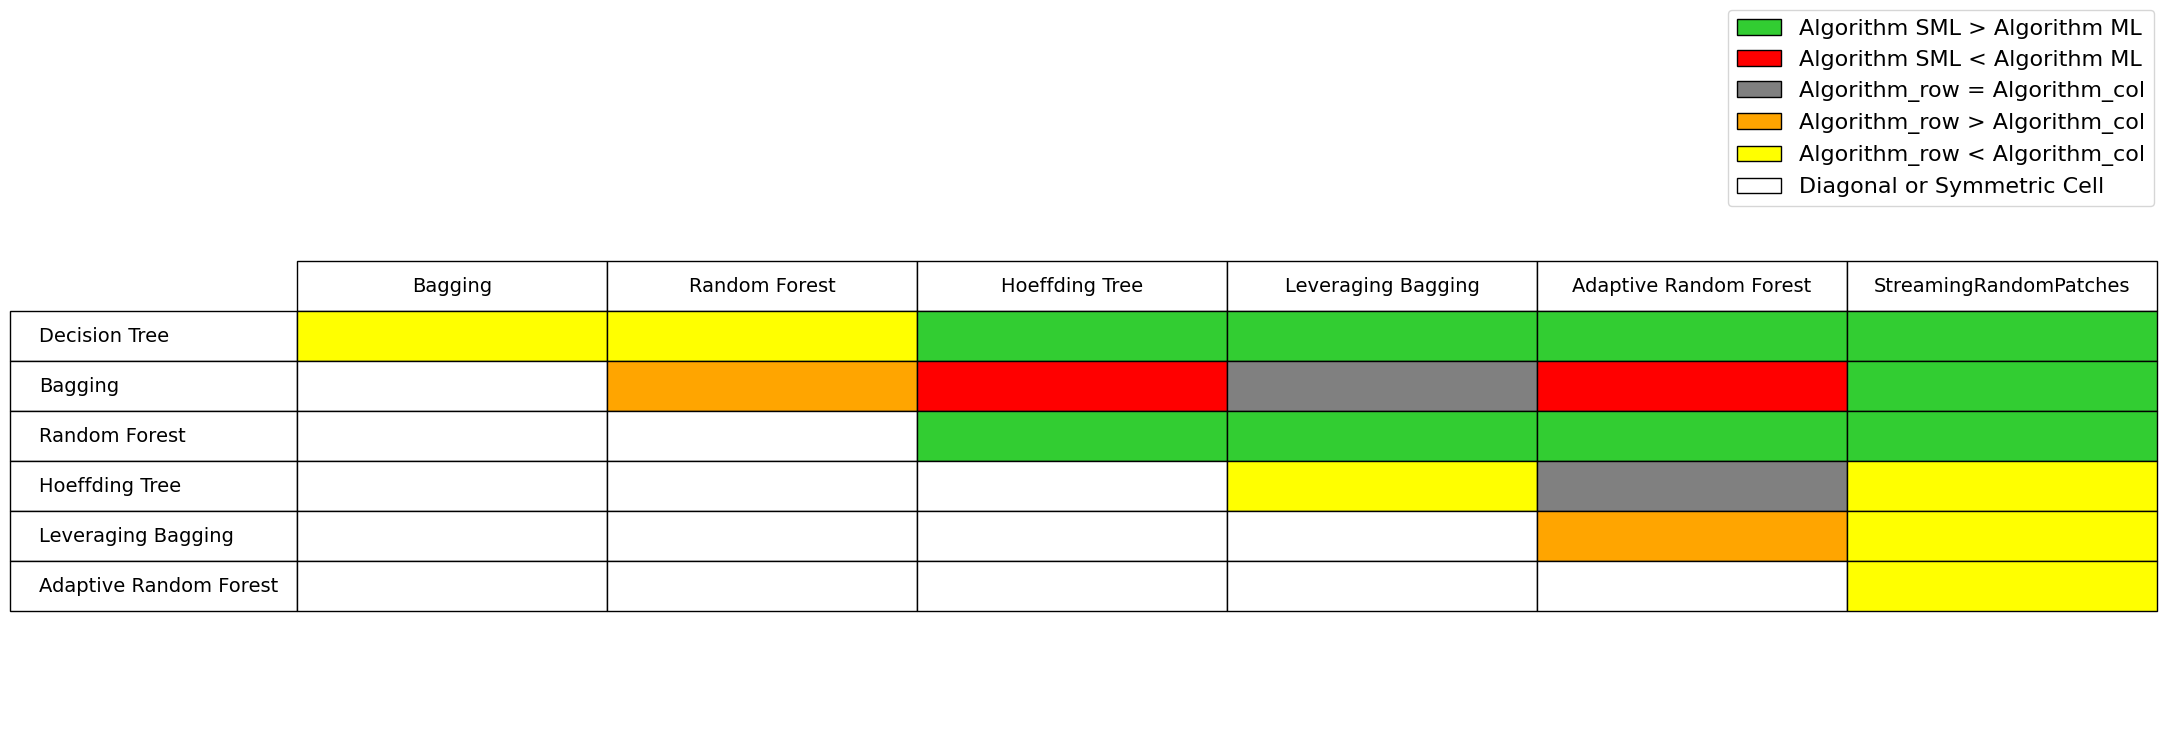

In [172]:
# Create the list of algorithms as 'x' and 'y' labels
algorithms_row = [
    "Decision Tree",
    "Bagging",
    "Random Forest",
    "Hoeffding Tree",
    "Leveraging Bagging",
    "Adaptive Random Forest"
]

algorithms_col = [
    "Bagging",
    "Random Forest",
    "Hoeffding Tree",
    "Leveraging Bagging",
    "Adaptive Random Forest",
    "StreamingRandomPatches"
]

# Create an empty dataframe for the table
df_table = pd.DataFrame(index=algorithms_row, columns=algorithms_col)

# Load the color data from the CSV file
df_colors = pd.read_csv('data/color_cohen_tot.csv')

# Iterate over the rows of the color dataframe and fill the table
for _, row in df_colors.iterrows():
    algorithm_row = row['Algorithm_row']
    algorithm_col = row['Algorithm_col']
    color = row['Color']
    df_table.loc[algorithm_row, algorithm_col] = color

# Fill remaining cells with white color
df_table.fillna('white', inplace=True)

# Display the table with only colors
plt.figure(figsize=(8, 8))
plt.axis('off')
table = plt.table(cellText=[[''] * len(df_table.columns)] * len(df_table.index),  # Empty cellText
                  colLabels=df_table.columns,
                  rowLabels=df_table.index,
                  cellColours=df_table.values,
                  loc='center')
table.scale(3, 3)  # Increase cell size

# Increase the font size of the column and index labels
table.set_fontsize(21)

# Define color patches for the legend
legend_patches = [
    mpatches.Patch(color='limegreen', label='Algorithm SML > Algorithm ML'),
    mpatches.Patch(color='red', label='Algorithm SML < Algorithm ML'),
    mpatches.Patch(color='grey', label='Algorithm_row = Algorithm_col'),
    mpatches.Patch(color='orange', label='Algorithm_row > Algorithm_col'),
    mpatches.Patch(color='yellow', label='Algorithm_row < Algorithm_col'),
    mpatches.Patch(color='white', label='Diagonal or Symmetric Cell'),
]

# Set black borders for all patches
for patch in legend_patches:
    patch.set_edgecolor('black')

# Create the legend and display it on the top right corner
plt.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1.29, 1.21), fontsize=16)

# Save the table as an image
plt.savefig('data/color_cohen_tot.png', bbox_inches='tight', pad_inches=1.0)

plt.show()

## T-test on Precision

In [74]:
# Create an empty dataframe
color_precision_df = pd.DataFrame(columns=['Algorithm_row', 'Algorithm_col', 'Color'])
color = ''

In [75]:
print("\033[1mPrecision:\033[0m Decision Tree vs Hoeffding Tree")
print()
a = (0.90, 0.90, 0.91, 0.90, 0.90, 0.90, 0.90, 0.90, 0.90, 0.90)  # DT
b = (0.84, 0.85, 0.82, 0.85, 0.81, 0.85, 0.81, 0.85, 0.85, 0.83)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (DT).")
        color = 'red'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (HT). Algorithm a (DT) is better than algorithm b (HT).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Decision Tree vs Hoeffding Tree

Levene's test p-value: 0.006143286348191879
The variances of group a (DT) and group b (HT) are significantly different.

T-test two-sided p-value: 4.912706346334151e-07
The means of group a (DT) and group b (HT) are significantly different.

T-test less p-value:  0.9999997543646827
The mean of group a (DT) is not significantly less than the mean of group b (HT). Algorithm a (DT) is better than algorithm b (HT).


In [76]:
print("\033[1mPrecision:\033[0m Decision Tree vs Leveraging Bagging")
print()
a = (0.90, 0.90, 0.91, 0.90, 0.90, 0.90, 0.90, 0.90, 0.90, 0.90)  # DT
b = (0.85, 0.86, 0.85, 0.86, 0.86, 0.87, 0.87, 0.87, 0.85, 0.86)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (DT).")
        color = 'red'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (LB). Algorithm a (DT) is better than algorithm b (LB).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Decision Tree vs Leveraging Bagging

Levene's test p-value: 0.01767923579959462
The variances of group a (DT) and group b (LB) are significantly different.

T-test two-sided p-value: 6.571172833788235e-09
The means of group a (DT) and group b (LB) are significantly different.

T-test less p-value:  0.9999999967144136
The mean of group a (DT) is not significantly less than the mean of group b (LB). Algorithm a (DT) is better than algorithm b (LB).


In [77]:
print("\033[1mPrecision:\033[0m Decision Tree vs Adaptive Random Forest")
print()
a = (0.90, 0.90, 0.91, 0.90, 0.90, 0.90, 0.90, 0.90, 0.90, 0.90)  # DT
b = (0.84, 0.85, 0.85, 0.84, 0.83, 0.84, 0.83, 0.85, 0.84, 0.82)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (DT).")
        color = 'red'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (ARF). Algorithm a (DT) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Decision Tree vs Adaptive Random Forest

Levene's test p-value: 0.02028614210184826
The variances of group a (DT) and group b (ARF) are significantly different.

T-test two-sided p-value: 1.353223705318403e-09
The means of group a (DT) and group b (ARF) are significantly different.

T-test less p-value:  0.9999999993233881
The mean of group a (DT) is not significantly less than the mean of group b (ARF). Algorithm a (DT) is better than algorithm b (ARF).


In [78]:
print("\033[1mPrecision:\033[0m Decision Tree vs StreamingRandomPatches")
print()
a = (0.90, 0.90, 0.91, 0.90, 0.90, 0.90, 0.90, 0.90, 0.90, 0.90)  # DT
b = (0.85, 0.83, 0.85, 0.84, 0.87, 0.86, 0.85, 0.86, 0.84, 0.86)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (DT).")
        color = 'red'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (SRP). Algorithm a (DT) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Decision Tree vs StreamingRandomPatches

Levene's test p-value: 0.005521908806491618
The variances of group a (DT) and group b (SRP) are significantly different.

T-test two-sided p-value: 1.268681041435785e-07
The means of group a (DT) and group b (SRP) are significantly different.

T-test less p-value:  0.999999936565948
The mean of group a (DT) is not significantly less than the mean of group b (SRP). Algorithm a (DT) is better than algorithm b (SRP).


In [79]:
print("\033[1mPrecision:\033[0m Decision Tree vs Bagging")
print()
a = (0.90, 0.90, 0.91, 0.90, 0.90, 0.90, 0.90, 0.90, 0.90, 0.90)  # DT
b = (0.93, 0.93, 0.92, 0.91, 0.92, 0.92, 0.93, 0.93, 0.92, 0.92) # B

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (B) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (B) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (B) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (B). Algorithm b (B) is better than algorithm a (DT).")
        color = 'red'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (B). Algorithm a (DT) is better than algorithm b (B).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (B) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Decision Tree vs Bagging

Levene's test p-value: 0.054371016678898425
The variances of group a (DT) and group b (B) are not significantly different.

T-test two-sided p-value: 2.552441509536322e-08
The means of group a (DT) and group b (B) are significantly different.

T-test less p-value:  1.276220754768161e-08
The mean of group a (DT) is significantly less than the mean of group b (B). Algorithm b (B) is better than algorithm a (DT).


In [80]:
print("\033[1mPrecision:\033[0m Decision Tree vs Random Forest")
print()
a = (0.90, 0.90, 0.91, 0.90, 0.90, 0.90, 0.90, 0.90, 0.90, 0.90)  # DT
b = (0.92, 0.90, 0.91, 0.92, 0.92, 0.94, 0.93, 0.93, 0.93, 0.92) # RF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (RF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (RF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (RF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (RF). Algorithm b (RF) is better than algorithm a (DT).")
        color = 'red'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (RF). Algorithm a (DT) is better than algorithm b (RF).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (RF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Decision Tree vs Random Forest

Levene's test p-value: 0.017920258152900336
The variances of group a (DT) and group b (RF) are significantly different.

T-test two-sided p-value: 0.00018835666152985898
The means of group a (DT) and group b (RF) are significantly different.

T-test less p-value:  9.417833076492949e-05
The mean of group a (DT) is significantly less than the mean of group b (RF). Algorithm b (RF) is better than algorithm a (DT).


In [81]:
print("\033[1mPrecision:\033[0m Bagging vs Leveraging Bagging")
print()
a = (0.93, 0.93, 0.92, 0.91, 0.92, 0.92, 0.93, 0.93, 0.92, 0.92) # B
b = (0.85, 0.86, 0.85, 0.86, 0.86, 0.87, 0.87, 0.87, 0.85, 0.86)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (B).")
        color = 'red'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (LB). Algorithm a (B) is better than algorithm b (LB).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Bagging vs Leveraging Bagging

Levene's test p-value: 0.6733199381664239
The variances of group a (B) and group b (LB) are not significantly different.

T-test two-sided p-value: 2.779433171606357e-13
The means of group a (B) and group b (LB) are significantly different.

T-test less p-value:  0.999999999999861
The mean of group a (B) is not significantly less than the mean of group b (LB). Algorithm a (B) is better than algorithm b (LB).


In [82]:
print("\033[1mPrecision:\033[0m Bagging vs Hoeffding Tree")
print()
a = (0.93, 0.93, 0.92, 0.91, 0.92, 0.92, 0.93, 0.93, 0.92, 0.92) # B
b = (0.84, 0.85, 0.82, 0.85, 0.81, 0.85, 0.81, 0.85, 0.85, 0.83)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (B).")
        color = 'red'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (HT). Algorithm a (B) is better than algorithm b (HT).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Bagging vs Hoeffding Tree

Levene's test p-value: 0.055557820944534084
The variances of group a (B) and group b (HT) are not significantly different.

T-test two-sided p-value: 1.3710015692056741e-11
The means of group a (B) and group b (HT) are significantly different.

T-test less p-value:  0.9999999999931449
The mean of group a (B) is not significantly less than the mean of group b (HT). Algorithm a (B) is better than algorithm b (HT).


In [83]:
print("\033[1mPrecision:\033[0m Bagging vs Adaptive Random Forest")
print()
a = (0.93, 0.93, 0.92, 0.91, 0.92, 0.92, 0.93, 0.93, 0.92, 0.92) # B
b = (0.84, 0.85, 0.85, 0.84, 0.83, 0.84, 0.83, 0.85, 0.84, 0.82)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (B).")
        color = 'red'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (ARF). Algorithm a (B) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Bagging vs Adaptive Random Forest

Levene's test p-value: 0.4697020728007999
The variances of group a (B) and group b (ARF) are not significantly different.

T-test two-sided p-value: 1.7046395834092993e-14
The means of group a (B) and group b (ARF) are significantly different.

T-test less p-value:  0.9999999999999915
The mean of group a (B) is not significantly less than the mean of group b (ARF). Algorithm a (B) is better than algorithm b (ARF).


In [84]:
print("\033[1mPrecision:\033[0m Bagging vs StreamingRandomPatches")
print()
a = (0.93, 0.93, 0.92, 0.91, 0.92, 0.92, 0.93, 0.93, 0.92, 0.92) # B
b = (0.85, 0.83, 0.85, 0.84, 0.87, 0.86, 0.85, 0.86, 0.84, 0.86)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (B).")
        color = 'red'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (SRP). Algorithm a (B) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Bagging vs StreamingRandomPatches

Levene's test p-value: 0.180000749634983
The variances of group a (B) and group b (SRP) are not significantly different.

T-test two-sided p-value: 2.4192607054001536e-12
The means of group a (B) and group b (SRP) are significantly different.

T-test less p-value:  0.9999999999987903
The mean of group a (B) is not significantly less than the mean of group b (SRP). Algorithm a (B) is better than algorithm b (SRP).


In [85]:
print("\033[1mPrecision:\033[0m Bagging vs Random Forest")
print()
a = (0.93, 0.93, 0.92, 0.91, 0.92, 0.92, 0.93, 0.93, 0.92, 0.92) # B
b = (0.92, 0.90, 0.91, 0.92, 0.92, 0.94, 0.93, 0.93, 0.93, 0.92) # RF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (RF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (RF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (RF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (RF). Algorithm b (RF) is better than algorithm a (B).")
        color = 'red'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (RF). Algorithm a (B) is better than algorithm b (RF).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (RF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Bagging vs Random Forest

Levene's test p-value: 0.3305649312781848
The variances of group a (B) and group b (RF) are not significantly different.

T-test two-sided p-value: 0.8134803248504776
The means of group a (B) and group b (RF) are not significantly different.


In [86]:
print("\033[1mPrecision:\033[0m Random Forest vs Adaptive Random Forest")
print()
a = (0.92, 0.90, 0.91, 0.92, 0.92, 0.94, 0.93, 0.93, 0.93, 0.92) # RF
b = (0.84, 0.85, 0.85, 0.84, 0.83, 0.84, 0.83, 0.85, 0.84, 0.82)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (RF) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (RF).")
        color = 'red'
    else:
        print(
            "The mean of group a (RF) is not significantly less than the mean of group b (ARF). Algorithm a (RF) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (RF) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Random Forest vs Adaptive Random Forest

Levene's test p-value: 0.7641615849178445
The variances of group a (RF) and group b (ARF) are not significantly different.

T-test two-sided p-value: 1.0598128199740628e-12
The means of group a (RF) and group b (ARF) are significantly different.

T-test less p-value:  0.9999999999994701
The mean of group a (RF) is not significantly less than the mean of group b (ARF). Algorithm a (RF) is better than algorithm b (ARF).


In [87]:
print("\033[1mPrecision:\033[0m Random Forest vs Hoeffding Tree")
print()
a = (0.92, 0.90, 0.91, 0.92, 0.92, 0.94, 0.93, 0.93, 0.93, 0.92) # RF
b = (0.84, 0.85, 0.82, 0.85, 0.81, 0.85, 0.81, 0.85, 0.85, 0.83)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (RF) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (RF).")
        color = 'red'
    else:
        print(
            "The mean of group a (RF) is not significantly less than the mean of group b (HT). Algorithm a (RF) is better than algorithm b (HT).")
        color = 'limegreen'
else:
    print("The means of group a (RF) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Random Forest vs Hoeffding Tree

Levene's test p-value: 0.2247587273566773
The variances of group a (RF) and group b (HT) are not significantly different.

T-test two-sided p-value: 1.0264462680239062e-10
The means of group a (RF) and group b (HT) are significantly different.

T-test less p-value:  0.9999999999486777
The mean of group a (RF) is not significantly less than the mean of group b (HT). Algorithm a (RF) is better than algorithm b (HT).


In [88]:
print("\033[1mPrecision:\033[0m Random Forest vs Leveraging Bagging")
print()
a = (0.92, 0.90, 0.91, 0.92, 0.92, 0.94, 0.93, 0.93, 0.93, 0.92) # RF
b = (0.85, 0.86, 0.85, 0.86, 0.86, 0.87, 0.87, 0.87, 0.85, 0.86)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (RF) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (RF).")
        color = 'red'
    else:
        print(
            "The mean of group a (RF) is not significantly less than the mean of group b (LB). Algorithm a (RF) is better than algorithm b (LB).")
        color = 'limegreen'
else:
    print("The means of group a (RF) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Random Forest vs Leveraging Bagging

Levene's test p-value: 0.5108517032053528
The variances of group a (RF) and group b (LB) are not significantly different.

T-test two-sided p-value: 3.969147205228676e-11
The means of group a (RF) and group b (LB) are significantly different.

T-test less p-value:  0.9999999999801542
The mean of group a (RF) is not significantly less than the mean of group b (LB). Algorithm a (RF) is better than algorithm b (LB).


In [89]:
print("\033[1mPrecision:\033[0m Random Forest vs StreamingRandomPatches")
print()
a = (0.92, 0.90, 0.91, 0.92, 0.92, 0.94, 0.93, 0.93, 0.93, 0.92) # RF
b = (0.85, 0.83, 0.85, 0.84, 0.87, 0.86, 0.85, 0.86, 0.84, 0.86)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (RF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (RF).")
        color = 'red'
    else:
        print(
            "The mean of group a (RF) is not significantly less than the mean of group b (SRP). Algorithm a (RF) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (RF) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Random Forest vs StreamingRandomPatches

Levene's test p-value: 0.7730461433085685
The variances of group a (RF) and group b (SRP) are not significantly different.

T-test two-sided p-value: 6.499231173362142e-11
The means of group a (RF) and group b (SRP) are significantly different.

T-test less p-value:  0.9999999999675039
The mean of group a (RF) is not significantly less than the mean of group b (SRP). Algorithm a (RF) is better than algorithm b (SRP).


In [90]:
print("\033[1mPrecision:\033[0m Hoeffding Tree vs Leveraging Bagging")
print()
a = (0.84, 0.85, 0.82, 0.85, 0.81, 0.85, 0.81, 0.85, 0.85, 0.83)  # HT
b = (0.85, 0.86, 0.85, 0.86, 0.86, 0.87, 0.87, 0.87, 0.85, 0.86)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (HT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (HT).")
        color = 'red'
    else:
        print(
            "The mean of group a (HT) is not significantly less than the mean of group b (LB). Algorithm a (HT) is better than algorithm b (LB).")
        color = 'limegreen'
else:
    print("The means of group a (HT) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Hoeffding Tree vs Leveraging Bagging

Levene's test p-value: 0.08469196416654215
The variances of group a (HT) and group b (LB) are not significantly different.

T-test two-sided p-value: 0.000839829317408547
The means of group a (HT) and group b (LB) are significantly different.

T-test less p-value:  0.0004199146587042735
The mean of group a (HT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (HT).


In [91]:
print("\033[1mPrecision:\033[0m Hoeffding Tree vs Adaptive Random Forest")
print()
a = (0.84, 0.85, 0.82, 0.85, 0.81, 0.85, 0.81, 0.85, 0.85, 0.83)  # HT
b = (0.84, 0.85, 0.85, 0.84, 0.83, 0.84, 0.83, 0.85, 0.84, 0.82)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (HT) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (HT).")
        color = 'red'
    else:
        print(
            "The mean of group a (HT) is not significantly less than the mean of group b (ARF). Algorithm a (HT) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (HT) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Hoeffding Tree vs Adaptive Random Forest

Levene's test p-value: 0.14500969962289817
The variances of group a (HT) and group b (ARF) are not significantly different.

T-test two-sided p-value: 0.6376908997263746
The means of group a (HT) and group b (ARF) are not significantly different.


In [92]:
print("\033[1mPrecision:\033[0m Hoeffding Tree vs StreamingRandomPatches")
print()
a = (0.84, 0.85, 0.82, 0.85, 0.81, 0.85, 0.81, 0.85, 0.85, 0.83)  # HT
b = (0.85, 0.83, 0.85, 0.84, 0.87, 0.86, 0.85, 0.86, 0.84, 0.86)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (HT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (HT).")
        color = 'red'
    else:
        print(
            "The mean of group a (HT) is not significantly less than the mean of group b (SRP). Algorithm a (HT) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (HT) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Hoeffding Tree vs StreamingRandomPatches

Levene's test p-value: 0.30051255620130585
The variances of group a (HT) and group b (SRP) are not significantly different.

T-test two-sided p-value: 0.035731972292598675
The means of group a (HT) and group b (SRP) are significantly different.

T-test less p-value:  0.017865986146299338
The mean of group a (HT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (HT).


In [93]:
print("\033[1mPrecision:\033[0m Leveraging Bagging vs Adaptive Random Forest")
print()
a = (0.85, 0.86, 0.85, 0.86, 0.86, 0.87, 0.87, 0.87, 0.85, 0.86)  # LB
b = (0.84, 0.85, 0.85, 0.84, 0.83, 0.84, 0.83, 0.85, 0.84, 0.82)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (LB) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (LB) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (LB) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (LB) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (LB).")
        color = 'red'
    else:
        print(
            "The mean of group a (LB) is not significantly less than the mean of group b (ARF). Algorithm a (LB) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (LB) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Leveraging Bagging'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Leveraging Bagging vs Adaptive Random Forest

Levene's test p-value: 0.7141599074398169
The variances of group a (LB) and group b (ARF) are not significantly different.

T-test two-sided p-value: 6.558847609337879e-05
The means of group a (LB) and group b (ARF) are significantly different.

T-test less p-value:  0.9999672057619533
The mean of group a (LB) is not significantly less than the mean of group b (ARF). Algorithm a (LB) is better than algorithm b (ARF).


In [94]:
print("\033[1mPrecision:\033[0m Leveraging Bagging vs StreamingRandomPatches")
print()
a = (0.85, 0.86, 0.85, 0.86, 0.86, 0.87, 0.87, 0.87, 0.85, 0.86)  # LB
b = (0.85, 0.83, 0.85, 0.84, 0.87, 0.86, 0.85, 0.86, 0.84, 0.86)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (LB) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (LB) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (LB) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (LB) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (LB).")
        color = 'red'
    else:
        print(
            "The mean of group a (LB) is not significantly less than the mean of group b (SRP). Algorithm a (LB) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (LB) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Leveraging Bagging'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Leveraging Bagging vs StreamingRandomPatches

Levene's test p-value: 0.30610687948556853
The variances of group a (LB) and group b (SRP) are not significantly different.

T-test two-sided p-value: 0.06516948808048845
The means of group a (LB) and group b (SRP) are not significantly different.


In [95]:
print("\033[1mPrecision:\033[0m Adaptive Random Forest vs StreamingRandomPatches")
print()
a = (0.84, 0.85, 0.85, 0.84, 0.83, 0.84, 0.83, 0.85, 0.84, 0.82)  # ARF
b = (0.85, 0.83, 0.85, 0.84, 0.87, 0.86, 0.85, 0.86, 0.84, 0.86)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (ARF) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (ARF) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (ARF) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (ARF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (ARF).")
        color = 'red'
    else:
        print(
            "The mean of group a (ARF) is not significantly less than the mean of group b (SRP). Algorithm a (ARF) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (ARF) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Adaptive Random Forest'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_precision_df = pd.concat([color_precision_df, new_row], ignore_index=True)

Precision: Adaptive Random Forest vs StreamingRandomPatches

Levene's test p-value: 0.5350414165670188
The variances of group a (ARF) and group b (SRP) are not significantly different.

T-test two-sided p-value: 0.025352143727323417
The means of group a (ARF) and group b (SRP) are significantly different.

T-test less p-value:  0.012676071863661709
The mean of group a (ARF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (ARF).


In [96]:
# Save the dataframe to a CSV file
color_precision_df.to_csv('data/color_precision_tot.csv', index=False)

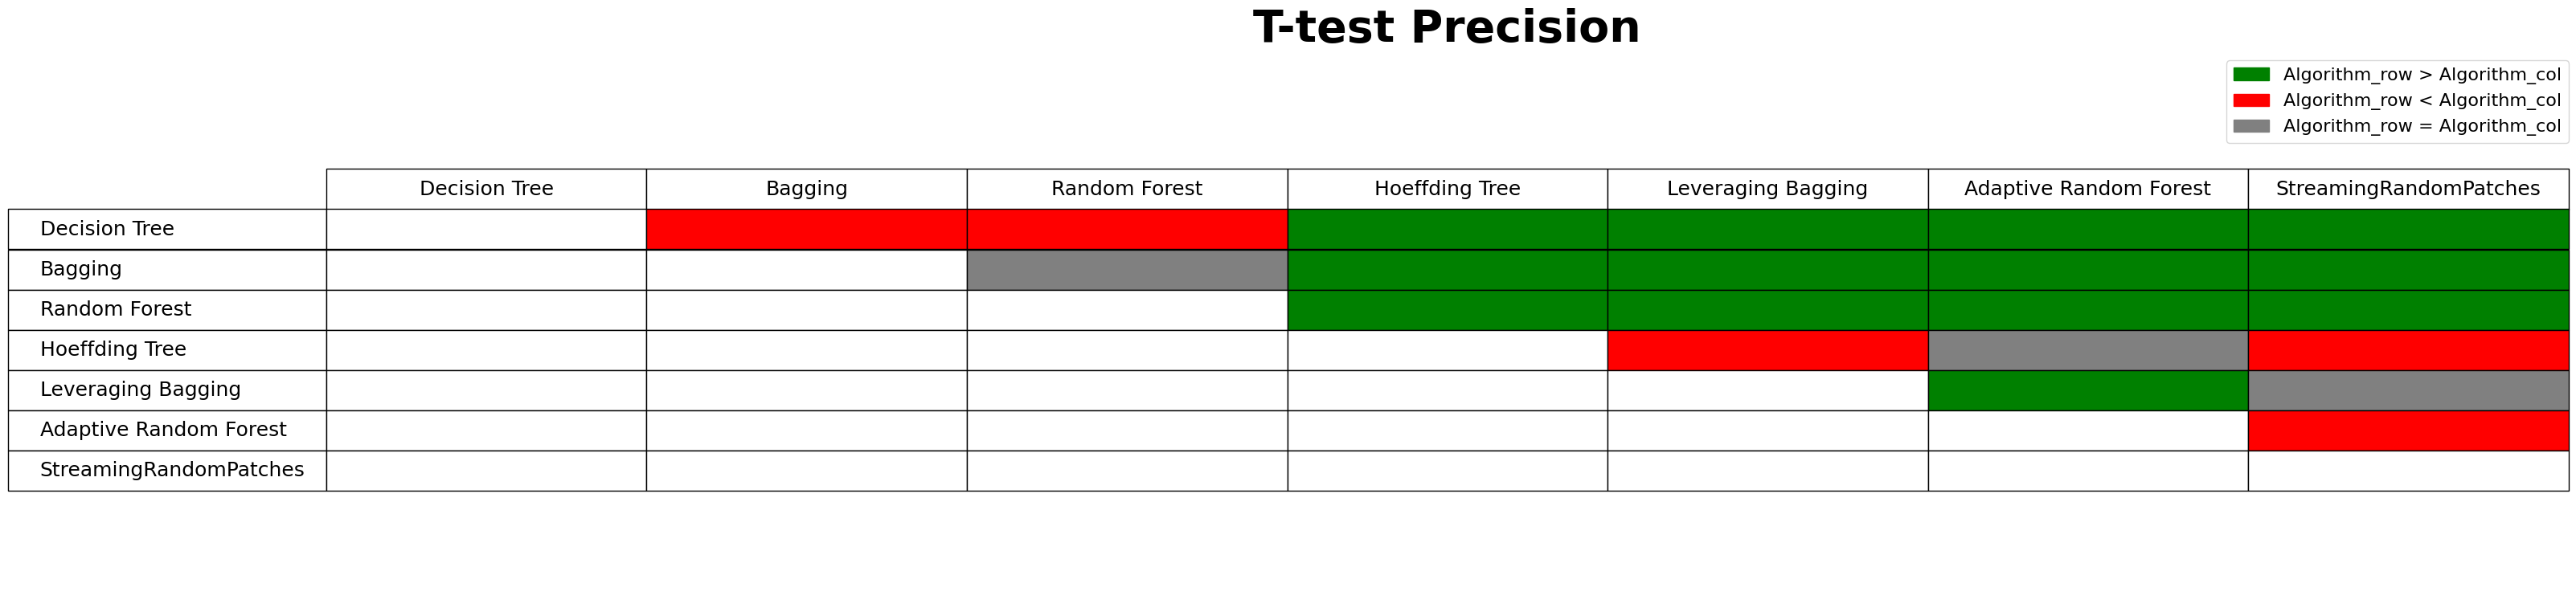

In [97]:
# Create the list of algorithms as 'x' and 'y' labels
algorithms = [
    "Decision Tree",
    "Bagging",
    "Random Forest",
    "Hoeffding Tree",
    "Leveraging Bagging",
    "Adaptive Random Forest",
    "StreamingRandomPatches"
]

# Create an empty dataframe for the table
df_table = pd.DataFrame(index=algorithms, columns=algorithms)

# Load the color data from the CSV file
df_colors = pd.read_csv('data/color_precision_tot.csv')

# Iterate over the rows of the color dataframe and fill the table
for _, row in df_colors.iterrows():
    algorithm_row = row['Algorithm_row']
    algorithm_col = row['Algorithm_col']
    color = row['Color']
    df_table.loc[algorithm_row, algorithm_col] = color

# Fill remaining cells with white color
df_table.fillna('white', inplace=True)

# Display the table with only colors
plt.figure(figsize=(12, 9))
plt.axis('off')
table = plt.table(cellText=[[''] * len(df_table.columns)] * len(df_table.index),  # Empty cellText
                  colLabels=df_table.columns,
                  rowLabels=df_table.index,
                  cellColours=df_table.values,
                  loc='center')
table.scale(3, 3)  # Increase cell size

# Increase the font size of the column and index labels
table.set_fontsize(21)

# Set the title of the table
plt.title('T-test Precision', fontsize=40, loc='center', fontweight='bold')

# Define color patches for the legend
legend_patches = [
    mpatches.Patch(color='limegreen', label='Algorithm_row > Algorithm_col'),
    mpatches.Patch(color='red', label='Algorithm_row < Algorithm_col'),
    mpatches.Patch(color='grey', label='Algorithm_row = Algorithm_col')
]

# Create the legend and display it on the top right corner
plt.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1.53, 1), fontsize=16)

# Save the table as an image
plt.savefig('data/color_precision_tot.png', bbox_inches='tight', pad_inches=1.0)

plt.show()

## T-test on Recall

In [98]:
# Create an empty dataframe
color_recall_df = pd.DataFrame(columns=['Algorithm_row', 'Algorithm_col', 'Color'])
color = ''

In [99]:
print("\033[1mRecall:\033[0m Decision Tree vs Hoeffding Tree")
print()
a = (0.67, 0.69, 0.66, 0.66, 0.68, 0.67, 0.67, 0.69, 0.67, 0.69)  # DT
b = (0.79, 0.79, 0.83, 0.79, 0.84, 0.79, 0.84, 0.77, 0.77, 0.82)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (DT).")
        color = 'red'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (HT). Algorithm a (DT) is better than algorithm b (HT).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Decision Tree vs Hoeffding Tree

Levene's test p-value: 0.10980230873786836
The variances of group a (DT) and group b (HT) are not significantly different.

T-test two-sided p-value: 5.83841202229712e-11
The means of group a (DT) and group b (HT) are significantly different.

T-test less p-value:  2.91920601114856e-11
The mean of group a (DT) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (DT).


In [100]:
print("\033[1mRecall:\033[0m Decision Tree vs Leveraging Bagging")
print()
a = (0.67, 0.69, 0.66, 0.66, 0.68, 0.67, 0.67, 0.69, 0.67, 0.69)  # DT
b = (0.80, 0.81, 0.81, 0.82, 0.80, 0.81, 0.80, 0.82, 0.83, 0.84)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (DT).")
        color = 'red'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (LB). Algorithm a (DT) is better than algorithm b (LB).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Decision Tree vs Leveraging Bagging

Levene's test p-value: 0.8086411384932977
The variances of group a (DT) and group b (LB) are not significantly different.

T-test two-sided p-value: 2.7662898128261733e-15
The means of group a (DT) and group b (LB) are significantly different.

T-test less p-value:  1.3831449064130867e-15
The mean of group a (DT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (DT).


In [101]:
print("\033[1mRecall:\033[0m Decision Tree vs Adaptive Random Forest")
print()
a = (0.67, 0.69, 0.66, 0.66, 0.68, 0.67, 0.67, 0.69, 0.67, 0.69)  # DT
b = (0.76, 0.82, 0.79, 0.81, 0.78, 0.82, 0.80, 0.79, 0.79, 0.80)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (DT).")
        color = 'red'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (ARF). Algorithm a (DT) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Decision Tree vs Adaptive Random Forest

Levene's test p-value: 0.27565722624823347
The variances of group a (DT) and group b (ARF) are not significantly different.

T-test two-sided p-value: 9.290298273970285e-13
The means of group a (DT) and group b (ARF) are significantly different.

T-test less p-value:  4.645149136985142e-13
The mean of group a (DT) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (DT).


In [102]:
print("\033[1mRecall:\033[0m Decision Tree vs StreamingRandomPatches")
print()
a = (0.67, 0.69, 0.66, 0.66, 0.68, 0.67, 0.67, 0.69, 0.67, 0.69)  # DT
b = (0.85, 0.85, 0.80, 0.84, 0.85, 0.85, 0.85, 0.85, 0.86, 0.83)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (DT).")
        color = 'red'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (SRP). Algorithm a (DT) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Decision Tree vs StreamingRandomPatches

Levene's test p-value: 1.0
The variances of group a (DT) and group b (SRP) are not significantly different.

T-test two-sided p-value: 1.2619888699457177e-15
The means of group a (DT) and group b (SRP) are significantly different.

T-test less p-value:  6.309944349728589e-16
The mean of group a (DT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (DT).


In [103]:
print("\033[1mRecall:\033[0m Decision Tree vs Bagging")
print()
a = (0.67, 0.69, 0.66, 0.66, 0.68, 0.67, 0.67, 0.69, 0.67, 0.69)  # DT
b = (0.74, 0.74, 0.76, 0.76, 0.72, 0.74, 0.76, 0.74, 0.77, 0.76)  # B

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (B) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (B) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (B) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (B). Algorithm b (B) is better than algorithm a (DT).")
        color = 'red'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (B). Algorithm a (DT) is better than algorithm b (B).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (B) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Decision Tree vs Bagging

Levene's test p-value: 0.2675470903046135
The variances of group a (DT) and group b (B) are not significantly different.

T-test two-sided p-value: 4.145552637826822e-10
The means of group a (DT) and group b (B) are significantly different.

T-test less p-value:  2.072776318913411e-10
The mean of group a (DT) is significantly less than the mean of group b (B). Algorithm b (B) is better than algorithm a (DT).


In [104]:
print("\033[1mRecall:\033[0m Decision Tree vs Random Forest")
print()
a = (0.67, 0.69, 0.66, 0.66, 0.68, 0.67, 0.67, 0.69, 0.67, 0.69)  # DT
b = (0.70, 0.72, 0.67, 0.74, 0.73, 0.68, 0.68, 0.64, 0.70, 0.69)  # RF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (RF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (RF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (RF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (RF). Algorithm b (RF) is better than algorithm a (DT).")
        color = 'red'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (RF). Algorithm a (DT) is better than algorithm b (RF).")
        color = 'limegreen'
else:
    print("The means of group a (DT) and group b (RF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Decision Tree vs Random Forest

Levene's test p-value: 0.03636675611304759
The variances of group a (DT) and group b (RF) are significantly different.

T-test two-sided p-value: 0.073229637825555
The means of group a (DT) and group b (RF) are not significantly different.


In [105]:
print("\033[1mRecall:\033[0m Bagging vs Leveraging Bagging")
print()
a = (0.74, 0.74, 0.76, 0.76, 0.72, 0.74, 0.76, 0.74, 0.77, 0.76)  # B
b = (0.80, 0.81, 0.81, 0.82, 0.80, 0.81, 0.80, 0.82, 0.83, 0.84)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (B).")
        color = 'red'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (LB). Algorithm a (B) is better than algorithm b (LB).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Bagging vs Leveraging Bagging

Levene's test p-value: 0.4239527769192615
The variances of group a (B) and group b (LB) are not significantly different.

T-test two-sided p-value: 7.69977159053321e-09
The means of group a (B) and group b (LB) are significantly different.

T-test less p-value:  3.849885795266605e-09
The mean of group a (B) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (B).


In [106]:
print("\033[1mRecall:\033[0m Bagging vs Hoeffding Tree")
print()
a = (0.74, 0.74, 0.76, 0.76, 0.72, 0.74, 0.76, 0.74, 0.77, 0.76)  # B
b = (0.79, 0.79, 0.83, 0.79, 0.84, 0.79, 0.84, 0.77, 0.77, 0.82)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (B).")
        color = 'red'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (HT). Algorithm a (B) is better than algorithm b (HT).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Bagging vs Hoeffding Tree

Levene's test p-value: 0.26224428801264865
The variances of group a (B) and group b (HT) are not significantly different.

T-test two-sided p-value: 3.239877021284257e-05
The means of group a (B) and group b (HT) are significantly different.

T-test less p-value:  1.6199385106421286e-05
The mean of group a (B) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (B).


In [107]:
print("\033[1mRecall:\033[0m Bagging vs Adaptive Random Forest")
print()
a = (0.74, 0.74, 0.76, 0.76, 0.72, 0.74, 0.76, 0.74, 0.77, 0.76)  # B
b = (0.76, 0.82, 0.79, 0.81, 0.78, 0.82, 0.80, 0.79, 0.79, 0.80)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (B).")
        color = 'red'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (ARF). Algorithm a (B) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Bagging vs Adaptive Random Forest

Levene's test p-value: 0.8092666971426388
The variances of group a (B) and group b (ARF) are not significantly different.

T-test two-sided p-value: 7.12794810553563e-06
The means of group a (B) and group b (ARF) are significantly different.

T-test less p-value:  3.563974052767815e-06
The mean of group a (B) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (B).


In [108]:
print("\033[1mRecall:\033[0m Bagging vs StreamingRandomPatches")
print()
a = (0.74, 0.74, 0.76, 0.76, 0.72, 0.74, 0.76, 0.74, 0.77, 0.76)  # B
b = (0.85, 0.85, 0.80, 0.84, 0.85, 0.85, 0.85, 0.85, 0.86, 0.83)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (B).")
        color = 'red'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (SRP). Algorithm a (B) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Bagging vs StreamingRandomPatches

Levene's test p-value: 0.47460737421081756
The variances of group a (B) and group b (SRP) are not significantly different.

T-test two-sided p-value: 1.3634664082480412e-10
The means of group a (B) and group b (SRP) are significantly different.

T-test less p-value:  6.817332041240206e-11
The mean of group a (B) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (B).


In [109]:
print("\033[1mRecall:\033[0m Bagging vs Random Forest")
print()
a = (0.74, 0.74, 0.76, 0.76, 0.72, 0.74, 0.76, 0.74, 0.77, 0.76)  # B
b = (0.70, 0.72, 0.67, 0.74, 0.73, 0.68, 0.68, 0.64, 0.70, 0.69)  # RF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (RF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (RF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (RF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (RF). Algorithm b (RF) is better than algorithm a (B).")
        color = 'red'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (RF). Algorithm a (B) is better than algorithm b (RF).")
        color = 'limegreen'
else:
    print("The means of group a (B) and group b (RF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Bagging vs Random Forest

Levene's test p-value: 0.10925342463033286
The variances of group a (B) and group b (RF) are not significantly different.

T-test two-sided p-value: 7.686966874724889e-05
The means of group a (B) and group b (RF) are significantly different.

T-test less p-value:  0.9999615651656264
The mean of group a (B) is not significantly less than the mean of group b (RF). Algorithm a (B) is better than algorithm b (RF).


In [110]:
print("\033[1mRecall:\033[0m Random Forest vs Adaptive Random Forest")
print()
a = (0.70, 0.72, 0.67, 0.74, 0.73, 0.68, 0.68, 0.64, 0.70, 0.69)  # RF
b = (0.76, 0.82, 0.79, 0.81, 0.78, 0.82, 0.80, 0.79, 0.79, 0.80)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (RF) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (RF).")
        color = 'red'
    else:
        print(
            "The mean of group a (RF) is not significantly less than the mean of group b (ARF). Algorithm a (RF) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (RF) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Random Forest vs Adaptive Random Forest

Levene's test p-value: 0.18568733573055593
The variances of group a (RF) and group b (ARF) are not significantly different.

T-test two-sided p-value: 3.743340846862536e-08
The means of group a (RF) and group b (ARF) are significantly different.

T-test less p-value:  1.871670423431268e-08
The mean of group a (RF) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (RF).


In [111]:
print("\033[1mRecall:\033[0m Random Forest vs Hoeffding Tree")
print()
a = (0.70, 0.72, 0.67, 0.74, 0.73, 0.68, 0.68, 0.64, 0.70, 0.69)  # RF
b = (0.79, 0.79, 0.83, 0.79, 0.84, 0.79, 0.84, 0.77, 0.77, 0.82)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (RF) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (RF).")
        color = 'red'
    else:
        print(
            "The mean of group a (RF) is not significantly less than the mean of group b (HT). Algorithm a (RF) is better than algorithm b (HT).")
        color = 'limegreen'
else:
    print("The means of group a (RF) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Random Forest vs Hoeffding Tree

Levene's test p-value: 0.8186427218759217
The variances of group a (RF) and group b (HT) are not significantly different.

T-test two-sided p-value: 1.0915064165177396e-07
The means of group a (RF) and group b (HT) are significantly different.

T-test less p-value:  5.457532082588698e-08
The mean of group a (RF) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (RF).


In [112]:
print("\033[1mRecall:\033[0m Random Forest vs Leveraging Bagging")
print()
a = (0.70, 0.72, 0.67, 0.74, 0.73, 0.68, 0.68, 0.64, 0.70, 0.69)  # RF
b = (0.80, 0.81, 0.81, 0.82, 0.80, 0.81, 0.80, 0.82, 0.83, 0.84)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (RF) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (RF).")
        color = 'red'
    else:
        print(
            "The mean of group a (RF) is not significantly less than the mean of group b (LB). Algorithm a (RF) is better than algorithm b (LB).")
        color = 'limegreen'
else:
    print("The means of group a (RF) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Random Forest vs Leveraging Bagging

Levene's test p-value: 0.05342583696143482
The variances of group a (RF) and group b (LB) are not significantly different.

T-test two-sided p-value: 1.0427824109966622e-09
The means of group a (RF) and group b (LB) are significantly different.

T-test less p-value:  5.213912054983311e-10
The mean of group a (RF) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (RF).


In [113]:
print("\033[1mRecall:\033[0m Random Forest vs StreamingRandomPatches")
print()
a = (0.70, 0.72, 0.67, 0.74, 0.73, 0.68, 0.68, 0.64, 0.70, 0.69)  # RF
b = (0.85, 0.85, 0.80, 0.84, 0.85, 0.85, 0.85, 0.85, 0.86, 0.83)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (RF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (RF).")
        color = 'red'
    else:
        print(
            "The mean of group a (RF) is not significantly less than the mean of group b (SRP). Algorithm a (RF) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (RF) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Random Forest vs StreamingRandomPatches

Levene's test p-value: 0.07798751788836242
The variances of group a (RF) and group b (SRP) are not significantly different.

T-test two-sided p-value: 6.571709469777759e-11
The means of group a (RF) and group b (SRP) are significantly different.

T-test less p-value:  3.285854734888879e-11
The mean of group a (RF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (RF).


In [114]:
print("\033[1mRecall:\033[0m Hoeffding Tree vs Leveraging Bagging")
print()
a = (0.79, 0.79, 0.83, 0.79, 0.84, 0.79, 0.84, 0.77, 0.77, 0.82)  # HT
b = (0.80, 0.81, 0.81, 0.82, 0.80, 0.81, 0.80, 0.82, 0.83, 0.84)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (HT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (HT).")
        color = 'red'
    else:
        print(
            "The mean of group a (HT) is not significantly less than the mean of group b (LB). Algorithm a (HT) is better than algorithm b (LB).")
        color = 'limegreen'
else:
    print("The means of group a (HT) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Hoeffding Tree vs Leveraging Bagging

Levene's test p-value: 0.1449355579331667
The variances of group a (HT) and group b (LB) are not significantly different.

T-test two-sided p-value: 0.26563075947127
The means of group a (HT) and group b (LB) are not significantly different.


In [115]:
print("\033[1mRecall:\033[0m Hoeffding Tree vs Adaptive Random Forest")
print()
a = (0.79, 0.79, 0.83, 0.79, 0.84, 0.79, 0.84, 0.77, 0.77, 0.82)  # HT
b = (0.76, 0.82, 0.79, 0.81, 0.78, 0.82, 0.80, 0.79, 0.79, 0.80)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (HT) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (HT).")
        color = 'red'
    else:
        print(
            "The mean of group a (HT) is not significantly less than the mean of group b (ARF). Algorithm a (HT) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (HT) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Hoeffding Tree vs Adaptive Random Forest

Levene's test p-value: 0.35914686172882304
The variances of group a (HT) and group b (ARF) are not significantly different.

T-test two-sided p-value: 0.5076253188911078
The means of group a (HT) and group b (ARF) are not significantly different.


In [116]:
print("\033[1mRecall:\033[0m Hoeffding Tree vs StreamingRandomPatches")
print()
a = (0.79, 0.79, 0.83, 0.79, 0.84, 0.79, 0.84, 0.77, 0.77, 0.82)  # HT
b = (0.85, 0.85, 0.80, 0.84, 0.85, 0.85, 0.85, 0.85, 0.86, 0.83)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (HT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (HT).")
        color = 'red'
    else:
        print(
            "The mean of group a (HT) is not significantly less than the mean of group b (SRP). Algorithm a (HT) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (HT) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Hoeffding Tree vs StreamingRandomPatches

Levene's test p-value: 0.16477532051322852
The variances of group a (HT) and group b (SRP) are not significantly different.

T-test two-sided p-value: 0.0009346258533109011
The means of group a (HT) and group b (SRP) are significantly different.

T-test less p-value:  0.00046731292665545056
The mean of group a (HT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (HT).


In [117]:
print("\033[1mRecall:\033[0m Leveraging Bagging vs Adaptive Random Forest")
print()
a = (0.80, 0.81, 0.81, 0.82, 0.80, 0.81, 0.80, 0.82, 0.83, 0.84)  # LB
b = (0.76, 0.82, 0.79, 0.81, 0.78, 0.82, 0.80, 0.79, 0.79, 0.80)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (LB) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (LB) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (LB) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (LB) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (LB).")
        color = 'red'
    else:
        print(
            "The mean of group a (LB) is not significantly less than the mean of group b (ARF). Algorithm a (LB) is better than algorithm b (ARF).")
        color = 'limegreen'
else:
    print("The means of group a (LB) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Leveraging Bagging'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Leveraging Bagging vs Adaptive Random Forest

Levene's test p-value: 0.39422856507008985
The variances of group a (LB) and group b (ARF) are not significantly different.

T-test two-sided p-value: 0.022487178741306492
The means of group a (LB) and group b (ARF) are significantly different.

T-test less p-value:  0.9887564106293467
The mean of group a (LB) is not significantly less than the mean of group b (ARF). Algorithm a (LB) is better than algorithm b (ARF).


In [118]:
print("\033[1mRecall:\033[0m Leveraging Bagging vs StreamingRandomPatches")
print()
a = (0.80, 0.81, 0.81, 0.82, 0.80, 0.81, 0.80, 0.82, 0.83, 0.84)  # LB
b = (0.85, 0.85, 0.80, 0.84, 0.85, 0.85, 0.85, 0.85, 0.86, 0.83)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (LB) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (LB) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (LB) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (LB) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (LB).")
        color = 'red'
    else:
        print(
            "The mean of group a (LB) is not significantly less than the mean of group b (SRP). Algorithm a (LB) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (LB) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Leveraging Bagging'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Leveraging Bagging vs StreamingRandomPatches

Levene's test p-value: 0.8663916561749299
The variances of group a (LB) and group b (SRP) are not significantly different.

T-test two-sided p-value: 0.0005146968093560163
The means of group a (LB) and group b (SRP) are significantly different.

T-test less p-value:  0.00025734840467800813
The mean of group a (LB) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (LB).


In [119]:
print("\033[1mRecall:\033[0m Adaptive Random Forest vs StreamingRandomPatches")
print()
a = (0.76, 0.82, 0.79, 0.81, 0.78, 0.82, 0.80, 0.79, 0.79, 0.80)  # ARF
b = (0.85, 0.85, 0.80, 0.84, 0.85, 0.85, 0.85, 0.85, 0.86, 0.83)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (ARF) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (ARF) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (ARF) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (ARF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (ARF).")
        color = 'red'
    else:
        print(
            "The mean of group a (ARF) is not significantly less than the mean of group b (SRP). Algorithm a (ARF) is better than algorithm b (SRP).")
        color = 'limegreen'
else:
    print("The means of group a (ARF) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Adaptive Random Forest'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_recall_df = pd.concat([color_recall_df, new_row], ignore_index=True)

Recall: Adaptive Random Forest vs StreamingRandomPatches

Levene's test p-value: 0.42522741865179225
The variances of group a (ARF) and group b (SRP) are not significantly different.

T-test two-sided p-value: 1.2960177441315784e-05
The means of group a (ARF) and group b (SRP) are significantly different.

T-test less p-value:  6.480088720657892e-06
The mean of group a (ARF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (ARF).


In [120]:
# Save the dataframe to a CSV file
color_recall_df.to_csv('data/color_recall_tot.csv', index=False)

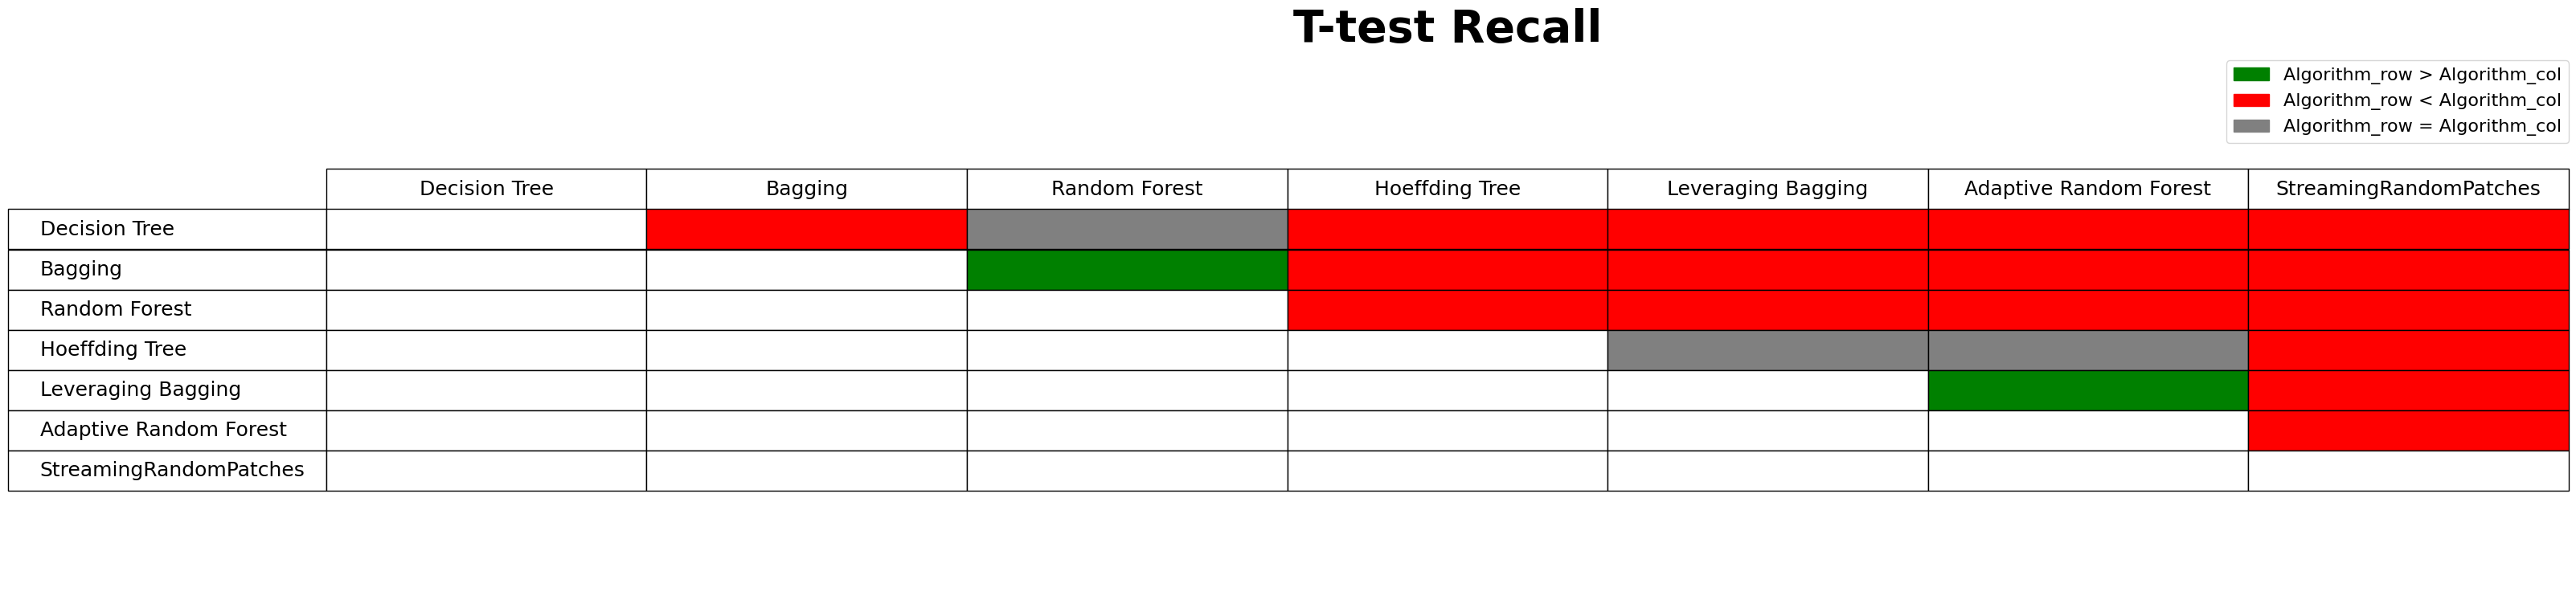

In [121]:
# Create the list of algorithms as 'x' and 'y' labels
algorithms = [
    "Decision Tree",
    "Bagging",
    "Random Forest",
    "Hoeffding Tree",
    "Leveraging Bagging",
    "Adaptive Random Forest",
    "StreamingRandomPatches"
]

# Create an empty dataframe for the table
df_table = pd.DataFrame(index=algorithms, columns=algorithms)

# Load the color data from the CSV file
df_colors = pd.read_csv('data/color_recall_tot.csv')

# Iterate over the rows of the color dataframe and fill the table
for _, row in df_colors.iterrows():
    algorithm_row = row['Algorithm_row']
    algorithm_col = row['Algorithm_col']
    color = row['Color']
    df_table.loc[algorithm_row, algorithm_col] = color

# Fill remaining cells with white color
df_table.fillna('white', inplace=True)

# Display the table with only colors
plt.figure(figsize=(12, 9))
plt.axis('off')
table = plt.table(cellText=[[''] * len(df_table.columns)] * len(df_table.index),  # Empty cellText
                  colLabels=df_table.columns,
                  rowLabels=df_table.index,
                  cellColours=df_table.values,
                  loc='center')
table.scale(3, 3)  # Increase cell size

# Increase the font size of the column and index labels
table.set_fontsize(21)

# Set the title of the table
plt.title('T-test Recall', fontsize=40, loc='center', fontweight='bold')

# Define color patches for the legend
legend_patches = [
    mpatches.Patch(color='limegreen', label='Algorithm_row > Algorithm_col'),
    mpatches.Patch(color='red', label='Algorithm_row < Algorithm_col'),
    mpatches.Patch(color='grey', label='Algorithm_row = Algorithm_col')
]

# Create the legend and display it on the top right corner
plt.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1.53, 1), fontsize=16)

# Save the table as an image
plt.savefig('data/color_recall_tot.png', bbox_inches='tight', pad_inches=1.0)

plt.show()

## T-test on F1 Score

In [74]:
# Create an empty dataframe
color_f1_df = pd.DataFrame(columns=['Algorithm_row', 'Algorithm_col', 'Color'])
color = ''

In [75]:
print("\033[1mF1 Score:\033[0m Decision Tree vs Hoeffding Tree")
print()
a = (0.77, 0.78, 0.76, 0.76, 0.78, 0.77, 0.77, 0.78, 0.77, 0.78)  # DT
b = (0.81, 0.82, 0.82, 0.82, 0.83, 0.82, 0.82, 0.81, 0.81, 0.82)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (DT).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (HT). Algorithm a (DT) is better than algorithm b (HT).")
        color = 'red'
else:
    print("The means of group a (DT) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Decision Tree vs Hoeffding Tree

Levene's test p-value: 0.397872979351952
The variances of group a (DT) and group b (HT) are not significantly different.

T-test two-sided p-value: 2.5841679590910786e-11
The means of group a (DT) and group b (HT) are significantly different.

T-test less p-value:  1.2920839795455393e-11
The mean of group a (DT) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (DT).


In [76]:
print("\033[1mF1 Score:\033[0m Decision Tree vs Leveraging Bagging")
print()
a = (0.77, 0.78, 0.76, 0.76, 0.78, 0.77, 0.77, 0.78, 0.77, 0.78)  # DT
b = (0.82, 0.84, 0.83, 0.84, 0.83, 0.84, 0.84, 0.84, 0.84, 0.85)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (DT).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (LB). Algorithm a (DT) is better than algorithm b (LB).")
        color = 'red'
else:
    print("The means of group a (DT) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Decision Tree vs Leveraging Bagging

Levene's test p-value: 0.7221858255539939
The variances of group a (DT) and group b (LB) are not significantly different.

T-test two-sided p-value: 5.735754470680363e-13
The means of group a (DT) and group b (LB) are significantly different.

T-test less p-value:  2.8678772353401814e-13
The mean of group a (DT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (DT).


In [77]:
print("\033[1mF1 Score:\033[0m Decision Tree vs Adaptive Random Forest")
print()
a = (0.77, 0.78, 0.76, 0.76, 0.78, 0.77, 0.77, 0.78, 0.77, 0.78)  # DT
b = (0.80, 0.84, 0.82, 0.82, 0.81, 0.83, 0.81, 0.82, 0.81, 0.81)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (DT).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (ARF). Algorithm a (DT) is better than algorithm b (ARF).")
        color = 'red'
else:
    print("The means of group a (DT) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Decision Tree vs Adaptive Random Forest

Levene's test p-value: 0.289486561886922
The variances of group a (DT) and group b (ARF) are not significantly different.

T-test two-sided p-value: 7.128767997679691e-09
The means of group a (DT) and group b (ARF) are significantly different.

T-test less p-value:  3.5643839988398454e-09
The mean of group a (DT) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (DT).


In [78]:
print("\033[1mF1 Score:\033[0m Decision Tree vs StreamingRandomPatches")
print()
a = (0.77, 0.78, 0.76, 0.76, 0.78, 0.77, 0.77, 0.78, 0.77, 0.78)  # DT
b = (0.85, 0.84, 0.83, 0.84, 0.86, 0.85, 0.85, 0.85, 0.85, 0.85)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (DT).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (SRP). Algorithm a (DT) is better than algorithm b (SRP).")
        color = 'red'
else:
    print("The means of group a (DT) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Decision Tree vs StreamingRandomPatches

Levene's test p-value: 0.7221858255539939
The variances of group a (DT) and group b (SRP) are not significantly different.

T-test two-sided p-value: 4.8837966259960544e-14
The means of group a (DT) and group b (SRP) are significantly different.

T-test less p-value:  2.4418983129980272e-14
The mean of group a (DT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (DT).


In [79]:
print("\033[1mF1 Score:\033[0m Decision Tree vs Bagging")
print()
a = (0.77, 0.78, 0.76, 0.76, 0.78, 0.77, 0.77, 0.78, 0.77, 0.78)  # DT
b = (0.82, 0.82, 0.83, 0.83, 0.81, 0.82, 0.83, 0.82, 0.84, 0.83)  # B

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (B) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (B) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (B) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (B). Algorithm b (B) is better than algorithm a (DT).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (B). Algorithm a (DT) is better than algorithm b (B).")
        color = 'orange'
else:
    print("The means of group a (DT) and group b (B) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Decision Tree vs Bagging

Levene's test p-value: 0.6409598012304241
The variances of group a (DT) and group b (B) are not significantly different.

T-test two-sided p-value: 2.3918039372716907e-11
The means of group a (DT) and group b (B) are significantly different.

T-test less p-value:  1.1959019686358453e-11
The mean of group a (DT) is significantly less than the mean of group b (B). Algorithm b (B) is better than algorithm a (DT).


In [80]:
print("\033[1mF1 Score:\033[0m Decision Tree vs Random Forest")
print()
a = (0.77, 0.78, 0.76, 0.76, 0.78, 0.77, 0.77, 0.78, 0.77, 0.78)  # DT
b = (0.79, 0.80, 0.77, 0.82, 0.81, 0.79, 0.79, 0.76, 0.80, 0.79)  # RF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (DT) and group b (RF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (DT) and group b (RF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (DT) and group b (RF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (DT) is significantly less than the mean of group b (RF). Algorithm b (RF) is better than algorithm a (DT).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (DT) is not significantly less than the mean of group b (RF). Algorithm a (DT) is better than algorithm b (RF).")
        color = 'orange'
else:
    print("The means of group a (DT) and group b (RF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Decision Tree'
algorithm_col = 'Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Decision Tree vs Random Forest

Levene's test p-value: 0.17183018646764944
The variances of group a (DT) and group b (RF) are not significantly different.

T-test two-sided p-value: 0.004043938015727424
The means of group a (DT) and group b (RF) are significantly different.

T-test less p-value:  0.002021969007863712
The mean of group a (DT) is significantly less than the mean of group b (RF). Algorithm b (RF) is better than algorithm a (DT).


In [81]:
print("\033[1mF1 Score:\033[0m Bagging vs Leveraging Bagging")
print()
a = (0.82, 0.82, 0.83, 0.83, 0.81, 0.82, 0.83, 0.82, 0.84, 0.83)  # B
b = (0.82, 0.84, 0.83, 0.84, 0.83, 0.84, 0.84, 0.84, 0.84, 0.85)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (B).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (LB). Algorithm a (B) is better than algorithm b (LB).")
        color = 'red'
else:
    print("The means of group a (B) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Bagging vs Leveraging Bagging

Levene's test p-value: 0.4523173193279971
The variances of group a (B) and group b (LB) are not significantly different.

T-test two-sided p-value: 0.004885250129794805
The means of group a (B) and group b (LB) are significantly different.

T-test less p-value:  0.0024426250648974025
The mean of group a (B) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (B).


In [82]:
print("\033[1mF1 Score:\033[0m Bagging vs Hoeffding Tree")
print()
a = (0.82, 0.82, 0.83, 0.83, 0.81, 0.82, 0.83, 0.82, 0.84, 0.83)  # B
b = (0.81, 0.82, 0.82, 0.82, 0.83, 0.82, 0.82, 0.81, 0.81, 0.82)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (B).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (HT). Algorithm a (B) is better than algorithm b (HT).")
        color = 'red'
else:
    print("The means of group a (B) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Bagging vs Hoeffding Tree

Levene's test p-value: 0.17183018646764323
The variances of group a (B) and group b (HT) are not significantly different.

T-test two-sided p-value: 0.05112264612425304
The means of group a (B) and group b (HT) are not significantly different.


In [83]:
print("\033[1mF1 Score:\033[0m Bagging vs Adaptive Random Forest")
print()
a = (0.82, 0.82, 0.83, 0.83, 0.81, 0.82, 0.83, 0.82, 0.84, 0.83)  # B
b = (0.80, 0.84, 0.82, 0.82, 0.81, 0.83, 0.81, 0.82, 0.81, 0.81)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (B).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (ARF). Algorithm a (B) is better than algorithm b (ARF).")
        color = 'red'
else:
    print("The means of group a (B) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Bagging vs Adaptive Random Forest

Levene's test p-value: 0.4486341057568122
The variances of group a (B) and group b (ARF) are not significantly different.

T-test two-sided p-value: 0.09543169507097589
The means of group a (B) and group b (ARF) are not significantly different.


In [84]:
print("\033[1mF1 Score:\033[0m Bagging vs StreamingRandomPatches")
print()
a = (0.82, 0.82, 0.83, 0.83, 0.81, 0.82, 0.83, 0.82, 0.84, 0.83)  # B
b = (0.85, 0.84, 0.83, 0.84, 0.86, 0.85, 0.85, 0.85, 0.85, 0.85)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (B).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (SRP). Algorithm a (B) is better than algorithm b (SRP).")
        color = 'red'
else:
    print("The means of group a (B) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Bagging vs StreamingRandomPatches

Levene's test p-value: 0.4523173193279971
The variances of group a (B) and group b (SRP) are not significantly different.

T-test two-sided p-value: 1.4430617497158935e-05
The means of group a (B) and group b (SRP) are significantly different.

T-test less p-value:  7.215308748579467e-06
The mean of group a (B) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (B).


In [85]:
print("\033[1mF1 Score:\033[0m Bagging vs Random Forest")
print()
a = (0.82, 0.82, 0.83, 0.83, 0.81, 0.82, 0.83, 0.82, 0.84, 0.83)  # B
b = (0.79, 0.80, 0.77, 0.82, 0.81, 0.79, 0.79, 0.76, 0.80, 0.79)  # RF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (B) and group b (RF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (B) and group b (RF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (B) and group b (RF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (B) is significantly less than the mean of group b (RF). Algorithm b (RF) is better than algorithm a (B).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (B) is not significantly less than the mean of group b (RF). Algorithm a (B) is better than algorithm b (RF).")
        color = 'orange'
else:
    print("The means of group a (B) and group b (RF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Bagging'
algorithm_col = 'Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Bagging vs Random Forest

Levene's test p-value: 0.23944658813842354
The variances of group a (B) and group b (RF) are not significantly different.

T-test two-sided p-value: 4.2776901291684825e-05
The means of group a (B) and group b (RF) are significantly different.

T-test less p-value:  0.9999786115493542
The mean of group a (B) is not significantly less than the mean of group b (RF). Algorithm a (B) is better than algorithm b (RF).


In [86]:
print("\033[1mF1 Score:\033[0m Random Forest vs Adaptive Random Forest")
print()
a = (0.79, 0.80, 0.77, 0.82, 0.81, 0.79, 0.79, 0.76, 0.80, 0.79)  # RF
b = (0.80, 0.84, 0.82, 0.82, 0.81, 0.83, 0.81, 0.82, 0.81, 0.81)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (RF) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (RF).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (RF) is not significantly less than the mean of group b (ARF). Algorithm a (RF) is better than algorithm b (ARF).")
        color = 'red'
else:
    print("The means of group a (RF) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Random Forest vs Adaptive Random Forest

Levene's test p-value: 0.510851703205345
The variances of group a (RF) and group b (ARF) are not significantly different.

T-test two-sided p-value: 0.0014204729068828686
The means of group a (RF) and group b (ARF) are significantly different.

T-test less p-value:  0.0007102364534414343
The mean of group a (RF) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (RF).


In [87]:
print("\033[1mF1 Score:\033[0m Random Forest vs Hoeffding Tree")
print()
a = (0.79, 0.80, 0.77, 0.82, 0.81, 0.79, 0.79, 0.76, 0.80, 0.79)  # RF
b = (0.81, 0.82, 0.82, 0.82, 0.83, 0.82, 0.82, 0.81, 0.81, 0.82)  # HT

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (HT) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (HT) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (HT) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (RF) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (RF).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (RF) is not significantly less than the mean of group b (HT). Algorithm a (RF) is better than algorithm b (HT).")
        color = 'red'
else:
    print("The means of group a (RF) and group b (HT) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Hoeffding Tree'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Random Forest vs Hoeffding Tree

Levene's test p-value: 0.07394020035116455
The variances of group a (RF) and group b (HT) are not significantly different.

T-test two-sided p-value: 0.0003335429530463036
The means of group a (RF) and group b (HT) are significantly different.

T-test less p-value:  0.0001667714765231518
The mean of group a (RF) is significantly less than the mean of group b (HT). Algorithm b (HT) is better than algorithm a (RF).


In [88]:
print("\033[1mF1 Score:\033[0m Random Forest vs Leveraging Bagging")
print()
a = (0.79, 0.80, 0.77, 0.82, 0.81, 0.79, 0.79, 0.76, 0.80, 0.79)  # RF
b = (0.82, 0.84, 0.83, 0.84, 0.83, 0.84, 0.84, 0.84, 0.84, 0.85)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (RF) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (RF).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (RF) is not significantly less than the mean of group b (LB). Algorithm a (RF) is better than algorithm b (LB).")
        color = 'red'
else:
    print("The means of group a (RF) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Random Forest vs Leveraging Bagging

Levene's test p-value: 0.13595252797946428
The variances of group a (RF) and group b (LB) are not significantly different.

T-test two-sided p-value: 7.957945391263136e-07
The means of group a (RF) and group b (LB) are significantly different.

T-test less p-value:  3.978972695631568e-07
The mean of group a (RF) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (RF).


In [89]:
print("\033[1mF1 Score:\033[0m Random Forest vs StreamingRandomPatches")
print()
a = (0.79, 0.80, 0.77, 0.82, 0.81, 0.79, 0.79, 0.76, 0.80, 0.79)  # RF
b = (0.85, 0.84, 0.83, 0.84, 0.86, 0.85, 0.85, 0.85, 0.85, 0.85)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (RF) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (RF) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (RF) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (RF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (RF).")
        color = 'limegreen'
    else:
        print(
            "The mean of group a (RF) is not significantly less than the mean of group b (SRP). Algorithm a (RF) is better than algorithm b (SRP).")
        color = 'red'
else:
    print("The means of group a (RF) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Random Forest'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Random Forest vs StreamingRandomPatches

Levene's test p-value: 0.13595252797946428
The variances of group a (RF) and group b (SRP) are not significantly different.

T-test two-sided p-value: 4.491705854171771e-08
The means of group a (RF) and group b (SRP) are significantly different.

T-test less p-value:  2.2458529270858854e-08
The mean of group a (RF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (RF).


In [90]:
print("\033[1mF1 Score:\033[0m Hoeffding Tree vs Leveraging Bagging")
print()
a = (0.81, 0.82, 0.82, 0.82, 0.83, 0.82, 0.82, 0.81, 0.81, 0.82)  # HT
b = (0.82, 0.84, 0.83, 0.84, 0.83, 0.84, 0.84, 0.84, 0.84, 0.85)  # LB

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (LB) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (LB) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (LB) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (HT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (HT).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (HT) is not significantly less than the mean of group b (LB). Algorithm a (HT) is better than algorithm b (LB).")
        color = 'orange'
else:
    print("The means of group a (HT) and group b (LB) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'Leveraging Bagging'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Hoeffding Tree vs Leveraging Bagging

Levene's test p-value: 0.7221858255539816
The variances of group a (HT) and group b (LB) are not significantly different.

T-test two-sided p-value: 1.7466642124272325e-05
The means of group a (HT) and group b (LB) are significantly different.

T-test less p-value:  8.733321062136163e-06
The mean of group a (HT) is significantly less than the mean of group b (LB). Algorithm b (LB) is better than algorithm a (HT).


In [91]:
print("\033[1mF1 Score:\033[0m Hoeffding Tree vs Adaptive Random Forest")
print()
a = (0.81, 0.82, 0.82, 0.82, 0.83, 0.82, 0.82, 0.81, 0.81, 0.82)  # HT
b = (0.80, 0.84, 0.82, 0.82, 0.81, 0.83, 0.81, 0.82, 0.81, 0.81)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (HT) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (HT).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (HT) is not significantly less than the mean of group b (ARF). Algorithm a (HT) is better than algorithm b (ARF).")
        color = 'orange'
else:
    print("The means of group a (HT) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Hoeffding Tree vs Adaptive Random Forest

Levene's test p-value: 0.08558567459485834
The variances of group a (HT) and group b (ARF) are not significantly different.

T-test two-sided p-value: 0.8134803248505177
The means of group a (HT) and group b (ARF) are not significantly different.


In [92]:
print("\033[1mF1 Score:\033[0m Hoeffding Tree vs StreamingRandomPatches")
print()
a = (0.81, 0.82, 0.82, 0.82, 0.83, 0.82, 0.82, 0.81, 0.81, 0.82)  # HT
b = (0.85, 0.84, 0.83, 0.84, 0.86, 0.85, 0.85, 0.85, 0.85, 0.85)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (HT) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (HT) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (HT) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (HT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (HT).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (HT) is not significantly less than the mean of group b (SRP). Algorithm a (HT) is better than algorithm b (SRP).")
        color = 'orange'
else:
    print("The means of group a (HT) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Hoeffding Tree'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Hoeffding Tree vs StreamingRandomPatches

Levene's test p-value: 0.7221858255539816
The variances of group a (HT) and group b (SRP) are not significantly different.

T-test two-sided p-value: 5.8105009511501686e-08
The means of group a (HT) and group b (SRP) are significantly different.

T-test less p-value:  2.9052504755750843e-08
The mean of group a (HT) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (HT).


In [93]:
print("\033[1mF1 Score:\033[0m Leveraging Bagging vs Adaptive Random Forest")
print()
a = (0.82, 0.84, 0.83, 0.84, 0.83, 0.84, 0.84, 0.84, 0.84, 0.85)  # LB
b = (0.80, 0.84, 0.82, 0.82, 0.81, 0.83, 0.81, 0.82, 0.81, 0.81)  # ARF

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (LB) and group b (ARF) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (LB) and group b (ARF) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (LB) and group b (ARF) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (LB) is significantly less than the mean of group b (ARF). Algorithm b (ARF) is better than algorithm a (LB).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (LB) is not significantly less than the mean of group b (ARF). Algorithm a (LB) is better than algorithm b (ARF).")
        color = 'orange'
else:
    print("The means of group a (LB) and group b (ARF) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Leveraging Bagging'
algorithm_col = 'Adaptive Random Forest'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Leveraging Bagging vs Adaptive Random Forest

Levene's test p-value: 0.21956263195236916
The variances of group a (LB) and group b (ARF) are not significantly different.

T-test two-sided p-value: 0.0003110350727816641
The means of group a (LB) and group b (ARF) are significantly different.

T-test less p-value:  0.9998444824636091
The mean of group a (LB) is not significantly less than the mean of group b (ARF). Algorithm a (LB) is better than algorithm b (ARF).


In [94]:
print("\033[1mF1 Score:\033[0m Leveraging Bagging vs StreamingRandomPatches")
print()
a = (0.82, 0.84, 0.83, 0.84, 0.83, 0.84, 0.84, 0.84, 0.84, 0.85)  # LB
b = (0.85, 0.84, 0.83, 0.84, 0.86, 0.85, 0.85, 0.85, 0.85, 0.85)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (LB) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (LB) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (LB) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (LB) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (LB).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (LB) is not significantly less than the mean of group b (SRP). Algorithm a (LB) is better than algorithm b (SRP).")
        color = 'orange'
else:
    print("The means of group a (LB) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Leveraging Bagging'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Leveraging Bagging vs StreamingRandomPatches

Levene's test p-value: 1.0
The variances of group a (LB) and group b (SRP) are not significantly different.

T-test two-sided p-value: 0.014159624391312317
The means of group a (LB) and group b (SRP) are significantly different.

T-test less p-value:  0.007079812195656158
The mean of group a (LB) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (LB).


In [95]:
print("\033[1mF1 Score:\033[0m Adaptive Random Forest vs StreamingRandomPatches")
print()
a = (0.80, 0.84, 0.82, 0.82, 0.81, 0.83, 0.81, 0.82, 0.81, 0.81)  # ARF
b = (0.85, 0.84, 0.83, 0.84, 0.86, 0.85, 0.85, 0.85, 0.85, 0.85)  # SRP

# Perform Levene's test to check the equality of variances
_, p_value_levene = stats.levene(a, b)

# Print the p-value from Levene's test
print(f"Levene's test p-value: {p_value_levene}")

# Set the significance level
alpha = 0.05

# Check if the variances are significantly different
if p_value_levene < alpha:
    equal_var = False
    print("The variances of group a (ARF) and group b (SRP) are significantly different.")
else:
    equal_var = True
    print("The variances of group a (ARF) and group b (SRP) are not significantly different.")

# Perform the t-test with the appropriate equal_var parameter
t_statistic, p_value = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='two-sided')

# Print the t-statistic and p-value
print()
print(f"T-test two-sided p-value: {p_value}")

# Check if the result is statistically significant
if p_value < alpha:
    print("The means of group a (ARF) and group b (SRP) are significantly different.")

    # Perform the additional t-test with alternative='less'
    t_statistic_less, p_value_less = stats.ttest_ind(a, b, axis=0, equal_var=equal_var, alternative='less')

    # Print the t-statistic and p-value for the 'less' alternative
    print()
    print(f"T-test less p-value:  {p_value_less}")

    # Check if the result is statistically significant for the 'less' alternative
    if p_value_less < alpha:
        print(
            "The mean of group a (ARF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (ARF).")
        color = 'yellow'
    else:
        print(
            "The mean of group a (ARF) is not significantly less than the mean of group b (SRP). Algorithm a (ARF) is better than algorithm b (SRP).")
        color = 'orange'
else:
    print("The means of group a (ARF) and group b (SRP) are not significantly different.")
    color = 'grey'

# Define the row data
algorithm_row = 'Adaptive Random Forest'
algorithm_col = 'StreamingRandomPatches'

# Create a new row as a dataframe
new_row = pd.DataFrame({'Algorithm_row': [algorithm_row], 'Algorithm_col': [algorithm_col], 'Color': [color]})
# Append the new row below the existing rows
color_f1_df = pd.concat([color_f1_df, new_row], ignore_index=True)

F1 Score: Adaptive Random Forest vs StreamingRandomPatches

Levene's test p-value: 0.21956263195236916
The variances of group a (ARF) and group b (SRP) are not significantly different.

T-test two-sided p-value: 2.936298300784053e-06
The means of group a (ARF) and group b (SRP) are significantly different.

T-test less p-value:  1.4681491503920265e-06
The mean of group a (ARF) is significantly less than the mean of group b (SRP). Algorithm b (SRP) is better than algorithm a (ARF).


In [96]:
# Save the dataframe to a CSV file
color_f1_df.to_csv('data/color_f1_tot.csv', index=False)

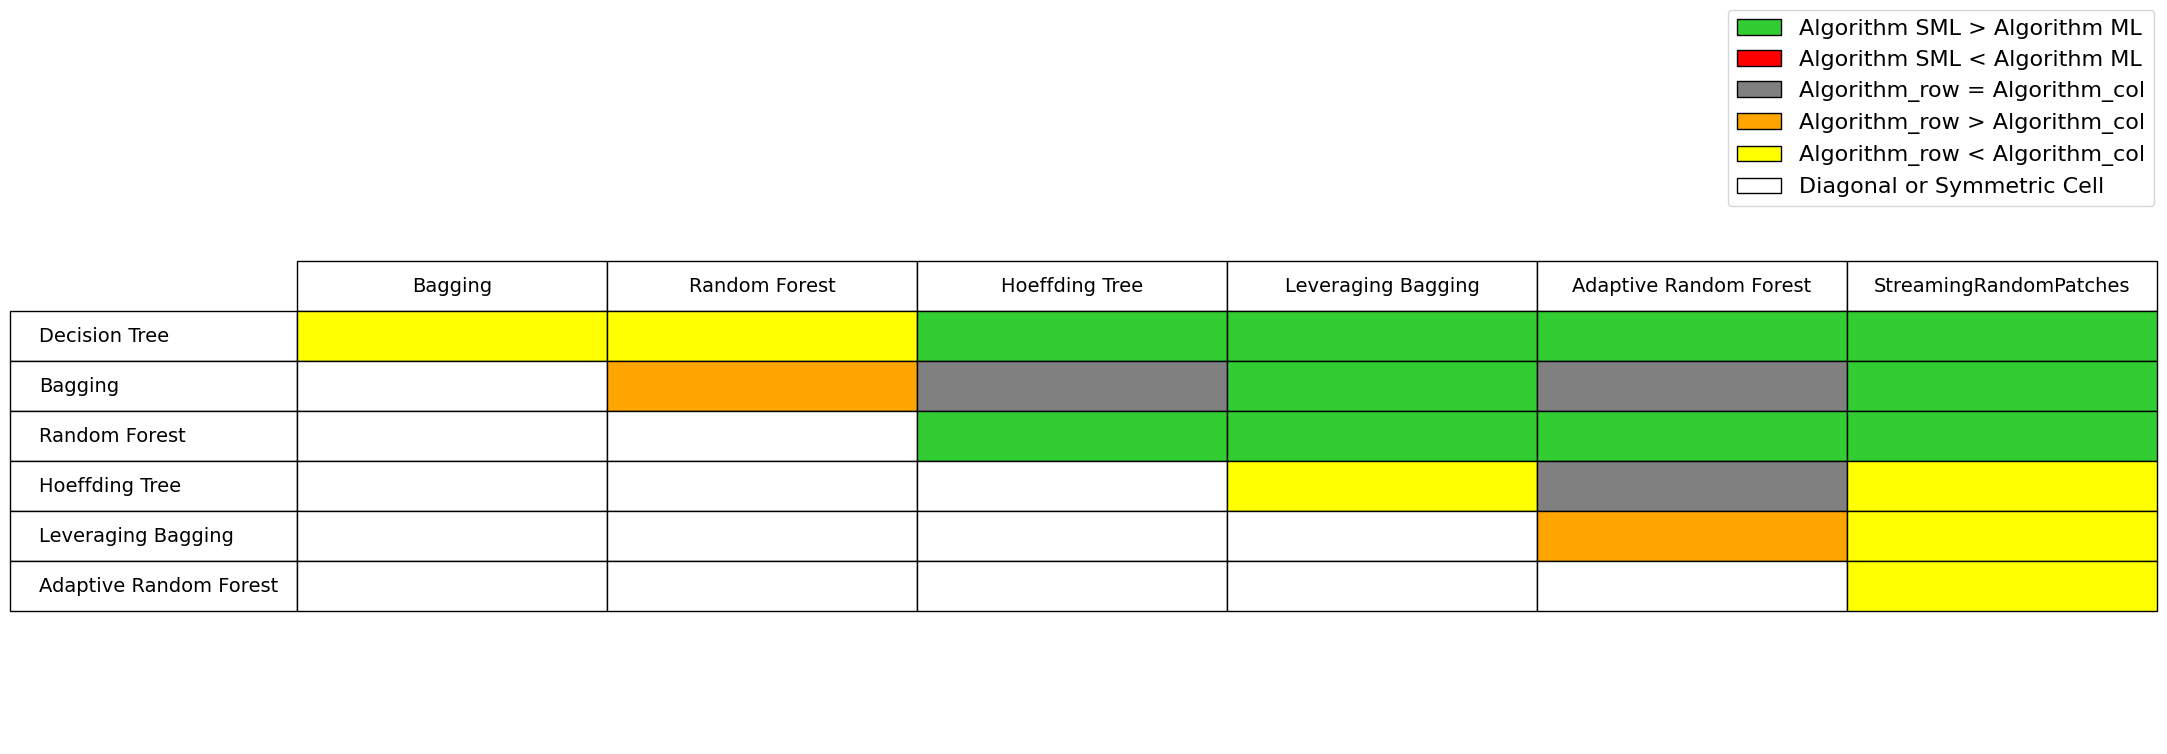

In [176]:
# Create the list of algorithms as 'x' and 'y' labels
algorithms_row = [
    "Decision Tree",
    "Bagging",
    "Random Forest",
    "Hoeffding Tree",
    "Leveraging Bagging",
    "Adaptive Random Forest"
]

algorithms_col = [
    "Bagging",
    "Random Forest",
    "Hoeffding Tree",
    "Leveraging Bagging",
    "Adaptive Random Forest",
    "StreamingRandomPatches"
]

# Create an empty dataframe for the table
df_table = pd.DataFrame(index=algorithms_row, columns=algorithms_col)

# Load the color data from the CSV file
df_colors = pd.read_csv('data/color_f1_tot.csv')

# Iterate over the rows of the color dataframe and fill the table
for _, row in df_colors.iterrows():
    algorithm_row = row['Algorithm_row']
    algorithm_col = row['Algorithm_col']
    color = row['Color']
    df_table.loc[algorithm_row, algorithm_col] = color

# Fill remaining cells with white color
df_table.fillna('white', inplace=True)

# Display the table with only colors
plt.figure(figsize=(8, 8))
plt.axis('off')
table = plt.table(cellText=[[''] * len(df_table.columns)] * len(df_table.index),  # Empty cellText
                  colLabels=df_table.columns,
                  rowLabels=df_table.index,
                  cellColours=df_table.values,
                  loc='center')
table.scale(3, 3)  # Increase cell size

# Increase the font size of the column and index labels
table.set_fontsize(21)

# Define color patches for the legend
legend_patches = [
    mpatches.Patch(color='limegreen', label='Algorithm SML > Algorithm ML'),
    mpatches.Patch(color='red', label='Algorithm SML < Algorithm ML'),
    mpatches.Patch(color='grey', label='Algorithm_row = Algorithm_col'),
    mpatches.Patch(color='orange', label='Algorithm_row > Algorithm_col'),
    mpatches.Patch(color='yellow', label='Algorithm_row < Algorithm_col'),
    mpatches.Patch(color='white', label='Diagonal or Symmetric Cell'),
]

# Set black borders for all patches
for patch in legend_patches:
    patch.set_edgecolor('black')

# Create the legend and display it on the top right corner
plt.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1.29, 1.21), fontsize=16)

# Save the table as an image
plt.savefig('data/color_f1_tot.png', bbox_inches='tight', pad_inches=1.0)

plt.show()

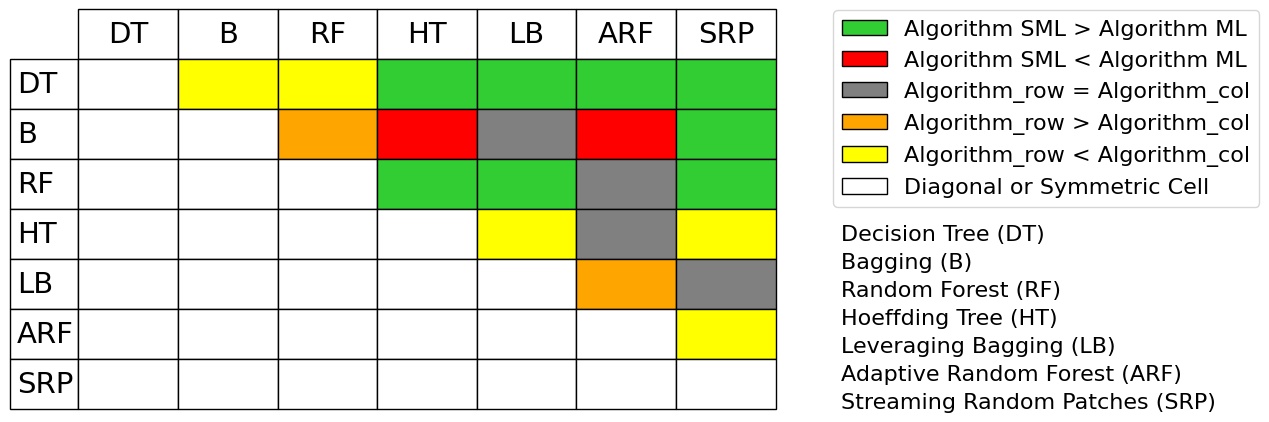

In [42]:
# Create the list of algorithms as 'x' and 'y' labels
algorithms_row = [
    "DT",
    "B",
    "RF",
    "HT",
    "LB",
    "ARF",
    "SRP"
]

algorithms_col = [
    "DT",
    "B",
    "RF",
    "HT",
    "LB",
    "ARF",
    "SRP"
]

# Create an empty dataframe for the table
df_table = pd.DataFrame(index=algorithms_row, columns=algorithms_col)

# Load the color data from the CSV file
df_colors = pd.read_csv('data/color_accuracy_tot_1.csv')

# Iterate over the rows of the color dataframe and fill the table
for _, row in df_colors.iterrows():
    algorithm_row = row['Algorithm_row']
    algorithm_col = row['Algorithm_col']
    color = row['Color']
    df_table.loc[algorithm_row, algorithm_col] = color

# Fill remaining cells with white color
df_table.fillna('white', inplace=True)

# Display the table with only colors
plt.figure(figsize=(3, 3))
plt.axis('off')
table = plt.table(cellText=[[''] * len(df_table.columns)] * len(df_table.index),  # Empty cellText
                  colLabels=df_table.columns,
                  rowLabels=df_table.index,
                  cellColours=df_table.values,
                  loc='center')
table.scale(3, 3)  # Increase cell size

# Increase the font size of the column and index labels
table.set_fontsize(21)

# Define color patches for the legend
legend_patches = [
    mpatches.Patch(color='limegreen', label='Algorithm SML > Algorithm ML'),
    mpatches.Patch(color='red', label='Algorithm SML < Algorithm ML'),
    mpatches.Patch(color='grey', label='Algorithm_row = Algorithm_col'),
    mpatches.Patch(color='orange', label='Algorithm_row > Algorithm_col'),
    mpatches.Patch(color='yellow', label='Algorithm_row < Algorithm_col'),
    mpatches.Patch(color='white', label='Diagonal or Symmetric Cell'),
]

# Set black borders for all patches
for patch in legend_patches:
    patch.set_edgecolor('black')

# Create the legend and display it on the top right corner
plt.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(2.2, 1.41), fontsize=16)

# Add additional text using plt.text
additional_text = "Decision Tree (DT)" \
                  "\nBagging (B)" \
                  "\nRandom Forest (RF)" \
                  "\nHoeffding Tree (HT)" \
                  "\nLeveraging Bagging (LB)" \
                  "\nAdaptive Random Forest (ARF)" \
                  "\nStreaming Random Patches (SRP)"

plt.text(2.28, -0.36, additional_text, transform=plt.gca().transAxes, fontsize=16, linespacing=1.5)

# Save the table as an image
plt.savefig('data/color_accuracy_tot_1.png', bbox_inches='tight', pad_inches=1.0)

plt.show()

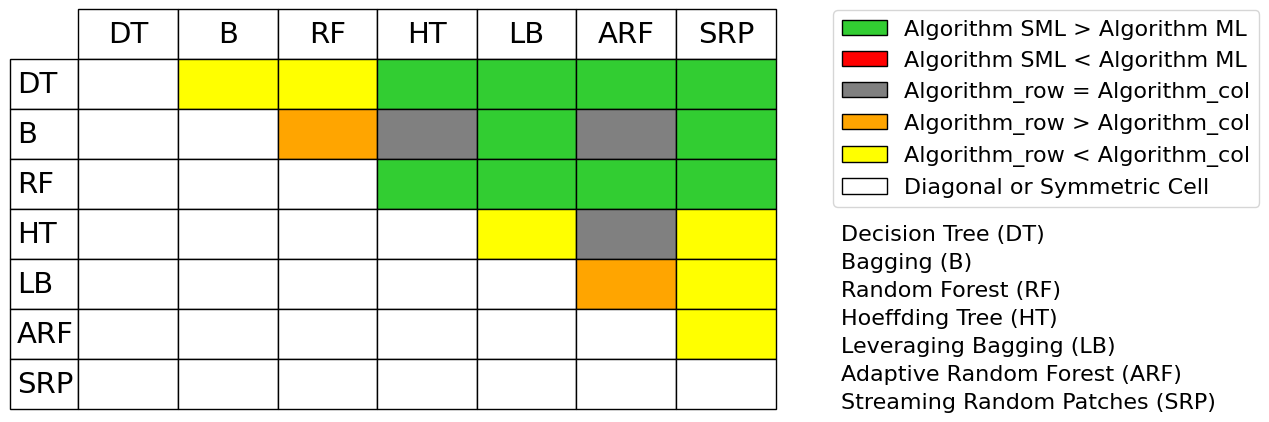

In [41]:
# Create the list of algorithms as 'x' and 'y' labels
algorithms_row = [
    "DT",
    "B",
    "RF",
    "HT",
    "LB",
    "ARF",
    "SRP"
]

algorithms_col = [
    "DT",
    "B",
    "RF",
    "HT",
    "LB",
    "ARF",
    "SRP"
]

# Create an empty dataframe for the table
df_table = pd.DataFrame(index=algorithms_row, columns=algorithms_col)

# Load the color data from the CSV file
df_colors = pd.read_csv('data/color_f1_tot_1.csv')

# Iterate over the rows of the color dataframe and fill the table
for _, row in df_colors.iterrows():
    algorithm_row = row['Algorithm_row']
    algorithm_col = row['Algorithm_col']
    color = row['Color']
    df_table.loc[algorithm_row, algorithm_col] = color

# Fill remaining cells with white color
df_table.fillna('white', inplace=True)

# Display the table with only colors
plt.figure(figsize=(3, 3))
plt.axis('off')
table = plt.table(cellText=[[''] * len(df_table.columns)] * len(df_table.index),  # Empty cellText
                  colLabels=df_table.columns,
                  rowLabels=df_table.index,
                  cellColours=df_table.values,
                  loc='center')
table.scale(3, 3)  # Increase cell size

# Increase the font size of the column and index labels
table.set_fontsize(21)

# Define color patches for the legend
legend_patches = [
    mpatches.Patch(color='limegreen', label='Algorithm SML > Algorithm ML'),
    mpatches.Patch(color='red', label='Algorithm SML < Algorithm ML'),
    mpatches.Patch(color='grey', label='Algorithm_row = Algorithm_col'),
    mpatches.Patch(color='orange', label='Algorithm_row > Algorithm_col'),
    mpatches.Patch(color='yellow', label='Algorithm_row < Algorithm_col'),
    mpatches.Patch(color='white', label='Diagonal or Symmetric Cell'),
]

# Set black borders for all patches
for patch in legend_patches:
    patch.set_edgecolor('black')

# Create the legend and display it on the top right corner
plt.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(2.2, 1.41), fontsize=16)

# Add additional text using plt.text
additional_text = "Decision Tree (DT)" \
                  "\nBagging (B)" \
                  "\nRandom Forest (RF)" \
                  "\nHoeffding Tree (HT)" \
                  "\nLeveraging Bagging (LB)" \
                  "\nAdaptive Random Forest (ARF)" \
                  "\nStreaming Random Patches (SRP)"

plt.text(2.28, -0.36, additional_text, transform=plt.gca().transAxes, fontsize=16, linespacing=1.5)

# Save the table as an image
plt.savefig('data/color_f1_tot_1.png', bbox_inches='tight', pad_inches=1.0)

plt.show()

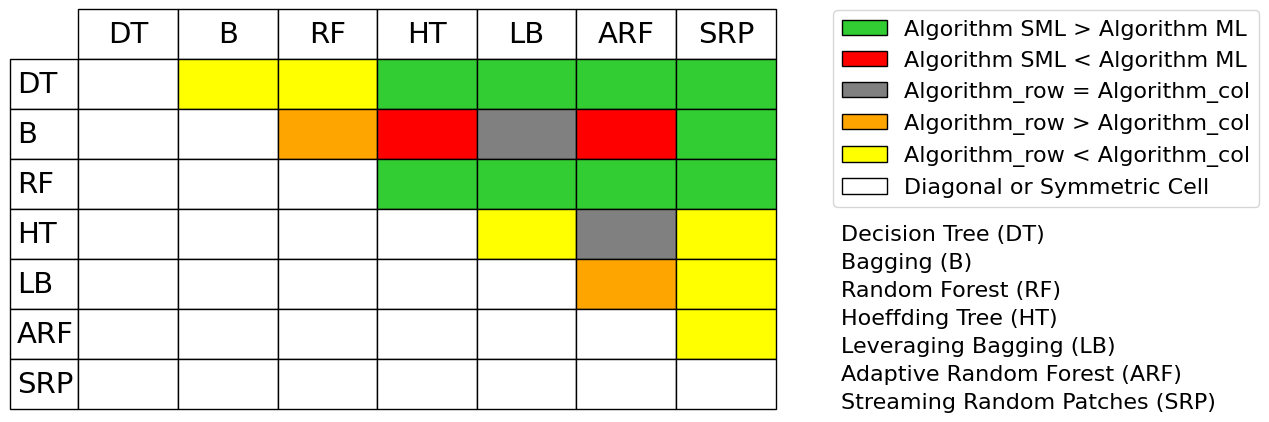

In [43]:
# Create the list of algorithms as 'x' and 'y' labels
algorithms_row = [
    "DT",
    "B",
    "RF",
    "HT",
    "LB",
    "ARF",
    "SRP"
]

algorithms_col = [
    "DT",
    "B",
    "RF",
    "HT",
    "LB",
    "ARF",
    "SRP"
]

# Create an empty dataframe for the table
df_table = pd.DataFrame(index=algorithms_row, columns=algorithms_col)

# Load the color data from the CSV file
df_colors = pd.read_csv('data/color_cohen_tot_1.csv')

# Iterate over the rows of the color dataframe and fill the table
for _, row in df_colors.iterrows():
    algorithm_row = row['Algorithm_row']
    algorithm_col = row['Algorithm_col']
    color = row['Color']
    df_table.loc[algorithm_row, algorithm_col] = color

# Fill remaining cells with white color
df_table.fillna('white', inplace=True)

# Display the table with only colors
plt.figure(figsize=(3, 3))
plt.axis('off')
table = plt.table(cellText=[[''] * len(df_table.columns)] * len(df_table.index),  # Empty cellText
                  colLabels=df_table.columns,
                  rowLabels=df_table.index,
                  cellColours=df_table.values,
                  loc='center')
table.scale(3, 3)  # Increase cell size

# Increase the font size of the column and index labels
table.set_fontsize(21)

# Define color patches for the legend
legend_patches = [
    mpatches.Patch(color='limegreen', label='Algorithm SML > Algorithm ML'),
    mpatches.Patch(color='red', label='Algorithm SML < Algorithm ML'),
    mpatches.Patch(color='grey', label='Algorithm_row = Algorithm_col'),
    mpatches.Patch(color='orange', label='Algorithm_row > Algorithm_col'),
    mpatches.Patch(color='yellow', label='Algorithm_row < Algorithm_col'),
    mpatches.Patch(color='white', label='Diagonal or Symmetric Cell'),
]

# Set black borders for all patches
for patch in legend_patches:
    patch.set_edgecolor('black')

# Create the legend and display it on the top right corner
plt.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(2.2, 1.41), fontsize=16)

# Add additional text using plt.text
additional_text = "Decision Tree (DT)" \
                  "\nBagging (B)" \
                  "\nRandom Forest (RF)" \
                  "\nHoeffding Tree (HT)" \
                  "\nLeveraging Bagging (LB)" \
                  "\nAdaptive Random Forest (ARF)" \
                  "\nStreaming Random Patches (SRP)"

plt.text(2.28, -0.36, additional_text, transform=plt.gca().transAxes, fontsize=16, linespacing=1.5)

# Save the table as an image
plt.savefig('data/color_cohen_tot_1.png', bbox_inches='tight', pad_inches=1.0)

plt.show()

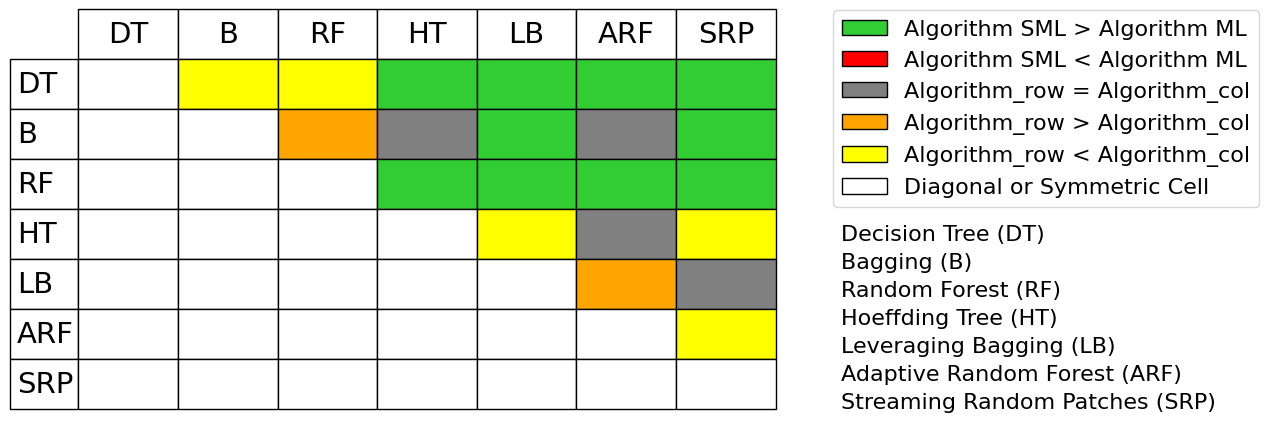

In [44]:
# Create the list of algorithms as 'x' and 'y' labels
algorithms_row = [
    "DT",
    "B",
    "RF",
    "HT",
    "LB",
    "ARF",
    "SRP"
]

algorithms_col = [
    "DT",
    "B",
    "RF",
    "HT",
    "LB",
    "ARF",
    "SRP"
]

# Create an empty dataframe for the table
df_table = pd.DataFrame(index=algorithms_row, columns=algorithms_col)

# Load the color data from the CSV file
df_colors = pd.read_csv('data/color_gmean_tot_1.csv')

# Iterate over the rows of the color dataframe and fill the table
for _, row in df_colors.iterrows():
    algorithm_row = row['Algorithm_row']
    algorithm_col = row['Algorithm_col']
    color = row['Color']
    df_table.loc[algorithm_row, algorithm_col] = color

# Fill remaining cells with white color
df_table.fillna('white', inplace=True)

# Display the table with only colors
plt.figure(figsize=(3, 3))
plt.axis('off')
table = plt.table(cellText=[[''] * len(df_table.columns)] * len(df_table.index),  # Empty cellText
                  colLabels=df_table.columns,
                  rowLabels=df_table.index,
                  cellColours=df_table.values,
                  loc='center')
table.scale(3, 3)  # Increase cell size

# Increase the font size of the column and index labels
table.set_fontsize(21)

# Define color patches for the legend
legend_patches = [
    mpatches.Patch(color='limegreen', label='Algorithm SML > Algorithm ML'),
    mpatches.Patch(color='red', label='Algorithm SML < Algorithm ML'),
    mpatches.Patch(color='grey', label='Algorithm_row = Algorithm_col'),
    mpatches.Patch(color='orange', label='Algorithm_row > Algorithm_col'),
    mpatches.Patch(color='yellow', label='Algorithm_row < Algorithm_col'),
    mpatches.Patch(color='white', label='Diagonal or Symmetric Cell'),
]

# Set black borders for all patches
for patch in legend_patches:
    patch.set_edgecolor('black')

# Create the legend and display it on the top right corner
plt.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(2.2, 1.41), fontsize=16)

# Add additional text using plt.text
additional_text = "Decision Tree (DT)" \
                  "\nBagging (B)" \
                  "\nRandom Forest (RF)" \
                  "\nHoeffding Tree (HT)" \
                  "\nLeveraging Bagging (LB)" \
                  "\nAdaptive Random Forest (ARF)" \
                  "\nStreaming Random Patches (SRP)"

plt.text(2.28, -0.36, additional_text, transform=plt.gca().transAxes, fontsize=16, linespacing=1.5)

# Save the table as an image
plt.savefig('data/color_gmean_tot_1.png', bbox_inches='tight', pad_inches=1.0)

plt.show()